In [1]:
import logging
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pyobsbox import Checker

In [3]:
logging.getLogger("pyobsbox").setLevel(logging.WARNING)
logging.getLogger("pyobsbox.plotter").setLevel(logging.DEBUG)

# List models

In [4]:
models_folder = Path("../../models")

In [5]:
[model.name for model in list(models_folder.glob('model_*'))]

['model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_abs_diff_seed_42',
 'model_dense_512_128_32_8_B1H_Inst_center_scale_100_seed_42',
 'model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_seed_42',
 'model_time_dist_32_16_B1H_Inst_500',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_stride_4_B1H_Inst',
 'model_conv_32_16_stride_4_B1H_Inst_jorg',
 'model_conv_max_pool_64_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_1000_seed_42',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_min_max_rolling_avg_std_window_2049_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_10000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_1000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_znorm_seed_42',
 'model_conv_32

In [6]:
model_path = models_folder / "model_conv_64_32_16_8_4_stride_4_2_noDO_decode_B1H_Inst_min_max_rolling_avg_std_window_65_seed_42_epochs_100"

In [7]:
checker = Checker(model_path)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 512, 64)           704       
_________________________________________________________________
dropout (Dropout)            (None, 512, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 128, 32)           10272     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 32, 16)            2576      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 16)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 8, 8)              6

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

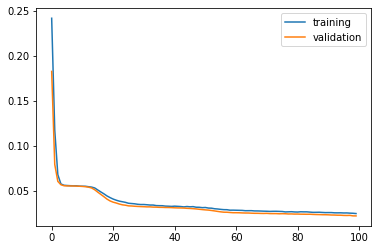

In [8]:
checker.plot_loss()

In [9]:
train_data, train_meta = checker.load_train_dataset()
train_prediction = checker.predict(train_data)

bunch_sorted_index: [0 2 1]
group_bunches: [ 278. 2613. 1040.]
group_bunches sorted: [ 278. 1040. 2613.]
restore_index: [0 2 1]
group_bunches restored: [ 278. 2613. 1040.]

50/50 [==============================] - 76s 2s/step


In [10]:
train_meta.head()

type  fill  beam plane  q           date_time  \
2595  Inst  6700     1     h  7 2018-05-19 03:06:48   
4630  Inst  6690     1     h  7 2018-05-16 08:42:14   
4610  Inst  6356     1     h  7 2017-11-02 01:16:14   
4877  Inst  6915     1     h  7 2018-07-12 23:12:14   
450   Inst  7177     1     h  7 2018-09-15 14:23:14   

                                                   file  n_bunches  \
2595  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6700/...       1068   
4630  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6690/...       1227   
4610  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6356/...       1868   
4877  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6915/...        636   
450   /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7177/...        732   

      bunch_index  bunch_number  ts_length  chunk  
2595        156.0          81.0      65536     10  
4630       1976.0         690.0      65536     18  
4610       1824.0         975.0      65536     18  
4877        657.0         473.0      65536     19  
450         195.0          12.0      65536      1

In [11]:
train_meta.shape

(396800, 12)

In [12]:
train_data.shape

(396800, 2048, 2)

In [13]:
train_prediction.shape

(396800, 2048, 2)

In [14]:
validation_data, validation_meta = checker.load_validation_dataset()
validation_prediction = checker.predict(validation_data)

bunch_sorted_index: [2 1 0]
group_bunches: [2120.  312.  175.]
group_bunches sorted: [ 175.  312. 2120.]
restore_index: [2 1 0]
group_bunches restored: [2120.  312.  175.]

5/5 [==============================] - 6s 1s/step


In [15]:
validation_meta.head()

type  fill  beam plane  q           date_time  \
4808  Inst  7483     1     h  7 2018-11-29 08:11:14   
1244  Inst  6989     1     h  7 2018-07-27 08:06:14   
5767  Inst  6706     1     h  7 2018-05-20 09:54:14   
7206  Inst  6457     1     h  7 2017-12-03 19:43:13   
7624  Inst  7483     1     h  7 2018-11-29 08:11:14   

                                                   file  n_bunches  \
4808  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7483/...        648   
1244  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6989/...        444   
5767  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6706/...        987   
7206  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6457/...       1020   
7624  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7483/...        648   

      bunch_index  bunch_number  ts_length  chunk  
4808       3150.0         589.0      65536     18  
1244        308.0         111.0      65536      4  
5767       1081.0         276.0      65536     22  
7206        849.0         598.0      65536     28  
7624       3150.0         589.0      65536     29

In [16]:
validation_meta.shape

(39680, 12)

In [17]:
validation_data.shape

(39680, 2048, 2)

In [18]:
validation_prediction.shape

(39680, 2048, 2)

In [19]:
def plot_train_index(index: int):
    """Helper function to plot a sample from the train dataset.
    """
    true_signal = train_data[index]
    predicted_signal = train_prediction[index]
    metadata_row = train_meta.iloc[index]
    print(f"index: {index}")
    print(f"Error: {train_error[index]}")
    print(metadata_row)
    checker.plot_sample(metadata_row, true_signal, predicted_signal)
    plt.show()
    encoded = checker.encode(true_signal)
    plt.imshow(encoded)
    plt.show()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

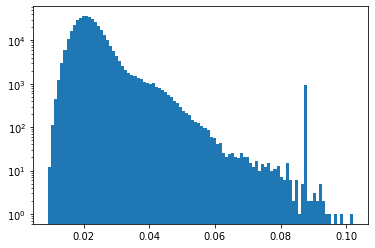

In [20]:
train_error = checker.MSE(train_data, train_prediction)
checker.plot_error(train_error, bins=100)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

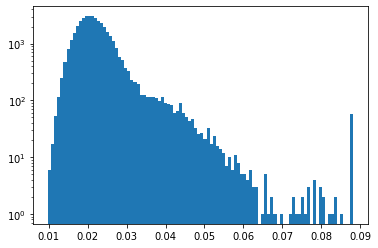

In [21]:
validation_error = checker.MSE(validation_data, validation_prediction)
checker.plot_error(validation_error, bins=100)

In [22]:
# Histogram peak
hist, bins = np.histogram(train_error, bins=100)
hist_peak = bins[np.argmax(hist)]

index: 0
Error: 0.02410833007582127
type                                                         Inst
fill                                                         6700
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-19 03:06:48
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6700/...
n_bunches                                                    1068
bunch_index                                                   156
bunch_number                                                   81
ts_length                                                   65536
chunk                                                          10
Name: 2595, dtype: object


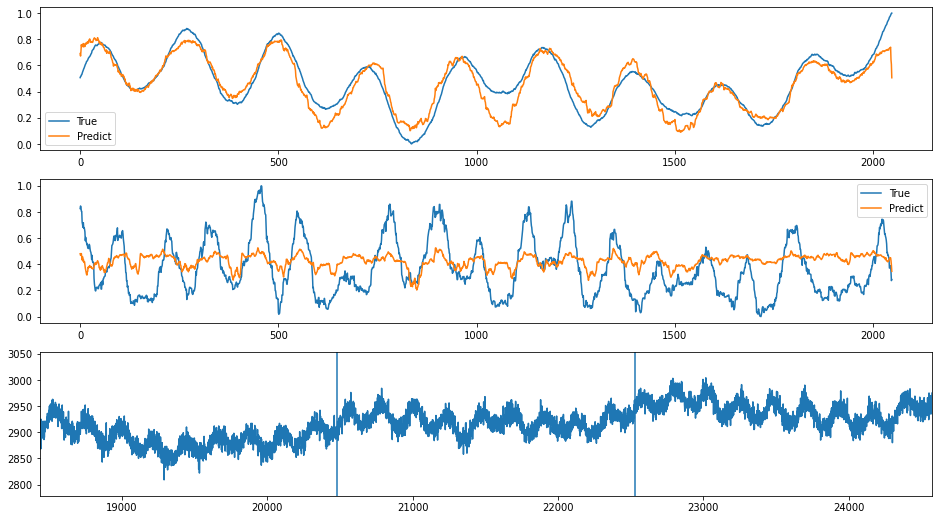

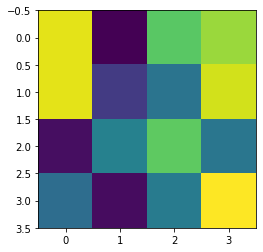

In [23]:
# plotting a random sample
plot_train_index(0)

In [24]:
sorted_error_indices = np.argsort(train_error)

# From left to right

index: 125118
Error: 0.009227813368835023
type                                                         Inst
fill                                                         6984
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-26 23:45:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6984/...
n_bunches                                                     286
bunch_index                                                  2198
bunch_number                                                  212
ts_length                                                   65536
chunk                                                          24
Name: 6210, dtype: object


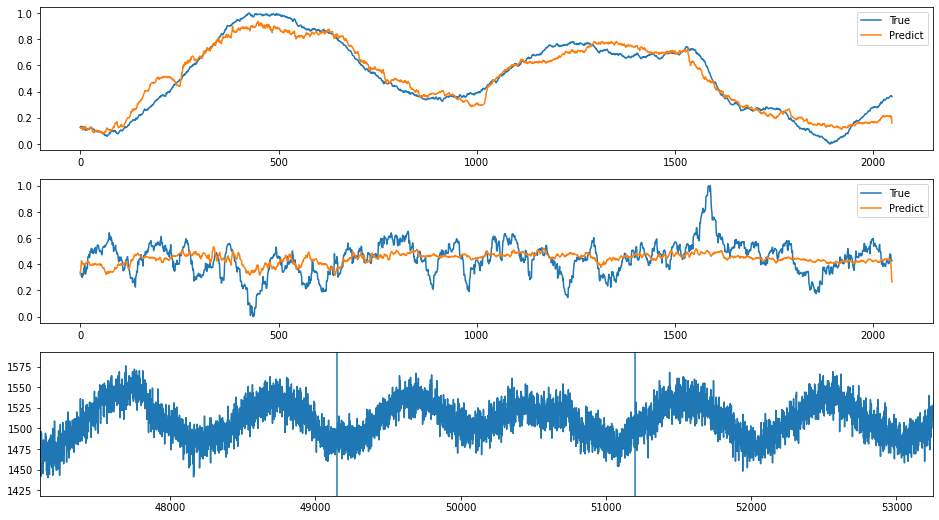

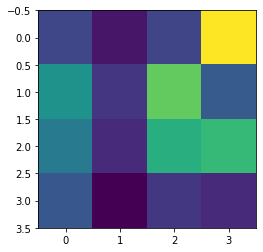

index: 245126
Error: 0.00935229258236304
type                                                         Inst
fill                                                         6346
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-29 11:51:05
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6346/...
n_bunches                                                    1868
bunch_index                                                  1923
bunch_number                                                 1023
ts_length                                                   65536
chunk                                                          20
Name: 5179, dtype: object


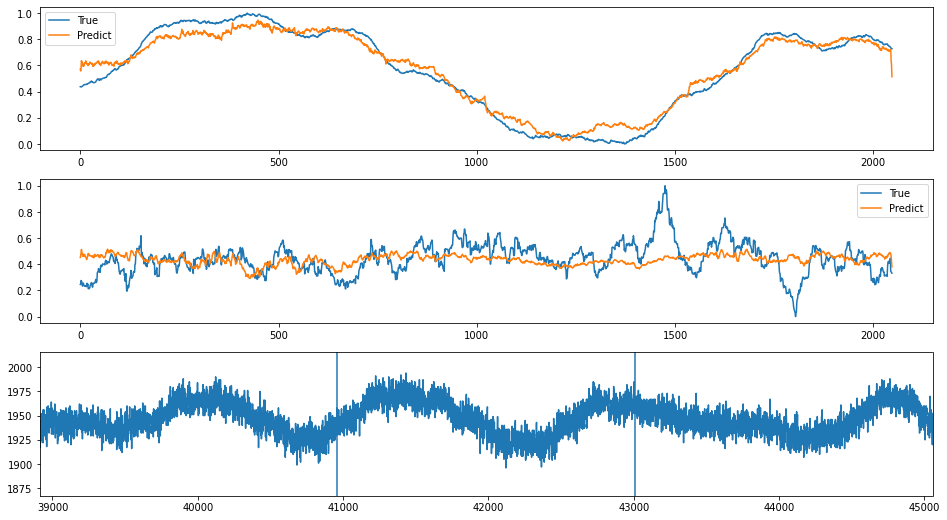

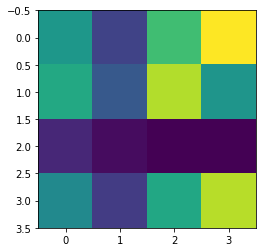

index: 79478
Error: 0.009645406518843476
type                                                         Inst
fill                                                         6611
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-24 22:37:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6611/...
n_bunches                                                     315
bunch_index                                                  1363
bunch_number                                                  166
ts_length                                                   65536
chunk                                                          12
Name: 3156, dtype: object


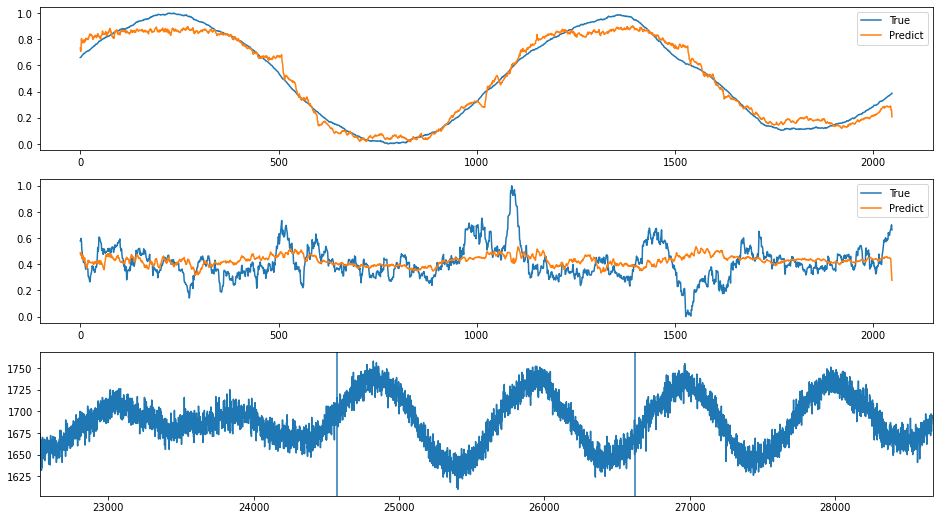

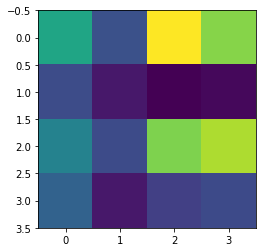

index: 55488
Error: 0.009864208144599203
type                                                         Inst
fill                                                         6694
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-17 11:32:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6694/...
n_bunches                                                    2175
bunch_index                                                  2762
bunch_number                                                 1756
ts_length                                                   65536
chunk                                                          16
Name: 4159, dtype: object


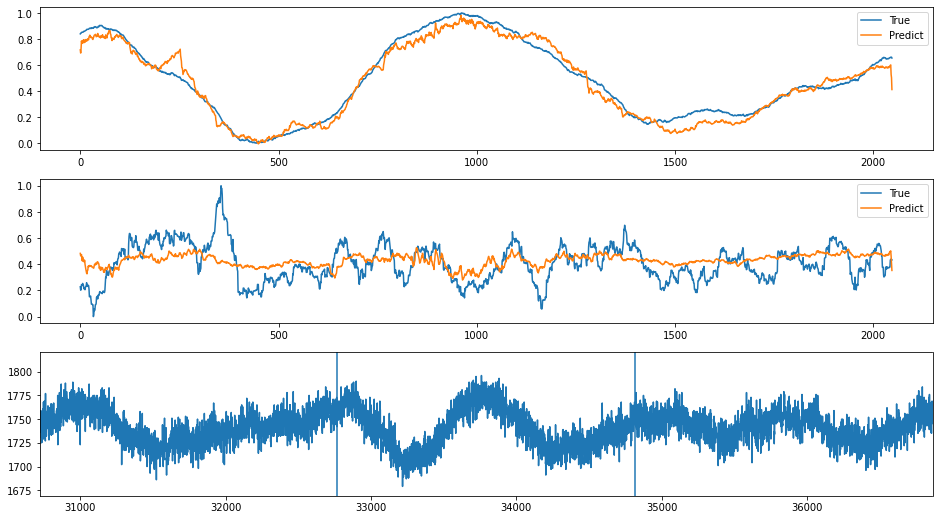

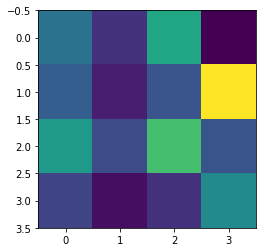

index: 216593
Error: 0.009913530648443112
type                                                         Inst
fill                                                         6654
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-08 01:30:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6654/...
n_bunches                                                    2556
bunch_index                                                  2720
bunch_number                                                 1993
ts_length                                                   65536
chunk                                                          19
Name: 5000, dtype: object


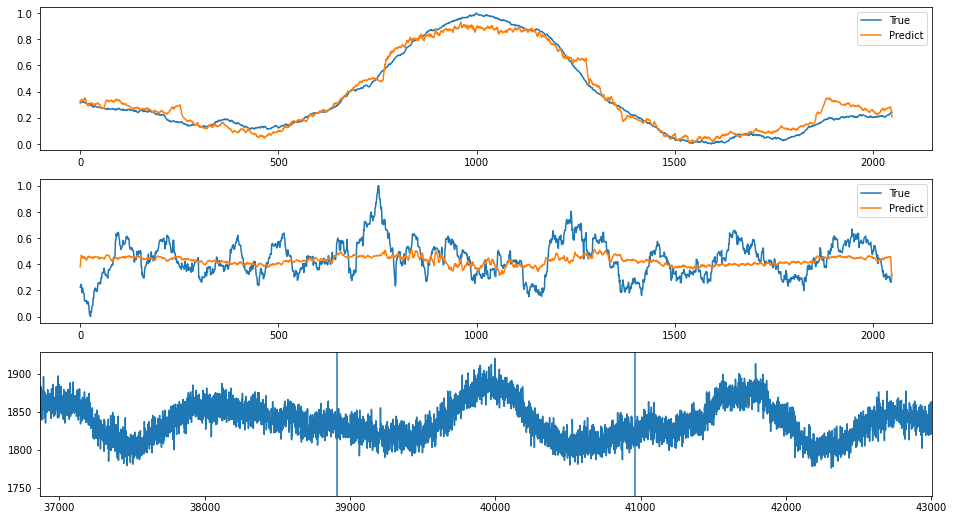

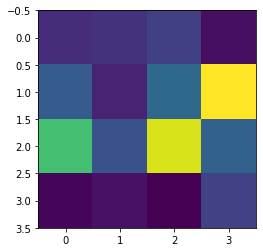

index: 156008
Error: 0.00992020307198941
type                                                         Inst
fill                                                         6972
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-25 00:38:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6972/...
n_bunches                                                     158
bunch_index                                                   284
bunch_number                                                   63
ts_length                                                   65536
chunk                                                           9
Name: 2514, dtype: object


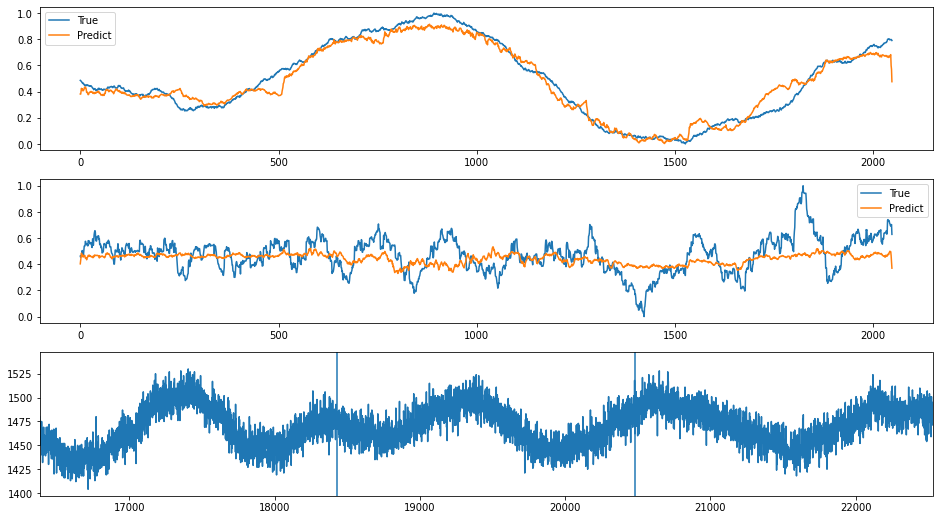

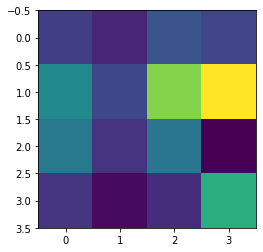

index: 355625
Error: 0.009941773144273976
type                                                         Inst
fill                                                         7320
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-20 01:19:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7320/...
n_bunches                                                    2556
bunch_index                                                  1583
bunch_number                                                 1170
ts_length                                                   65536
chunk                                                          20
Name: 5362, dtype: object


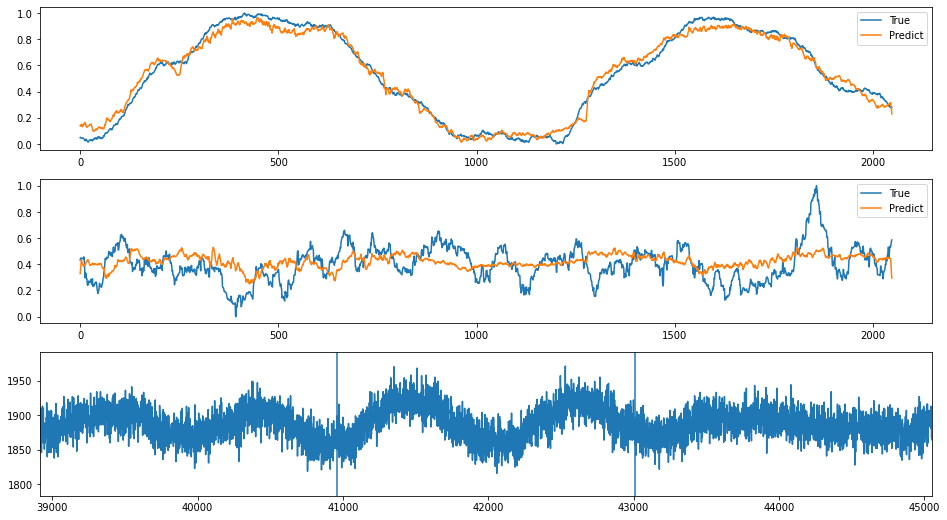

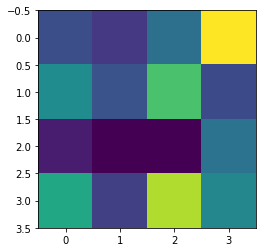

index: 169205
Error: 0.009968477046561066
type                                                         Inst
fill                                                         6278
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-07 01:42:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6278/...
n_bunches                                                    1868
bunch_index                                                  2692
bunch_number                                                 1440
ts_length                                                   65536
chunk                                                          13
Name: 3562, dtype: object


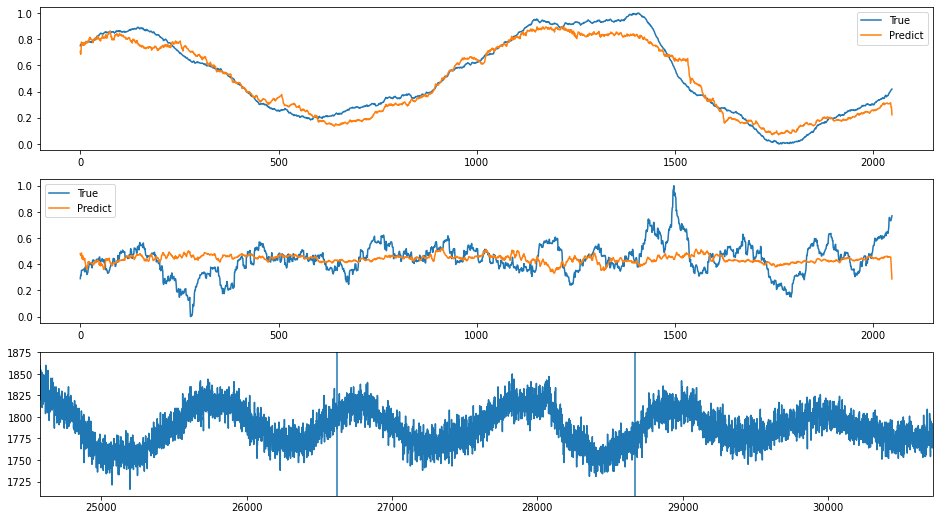

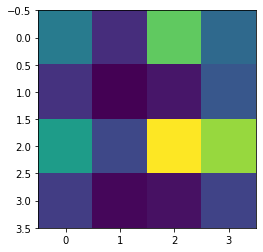

index: 94213
Error: 0.010004186558899857
type                                                         Inst
fill                                                         6346
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-29 12:10:09
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6346/...
n_bunches                                                    1868
bunch_index                                                   310
bunch_number                                                  165
ts_length                                                   65536
chunk                                                          14
Name: 3771, dtype: object


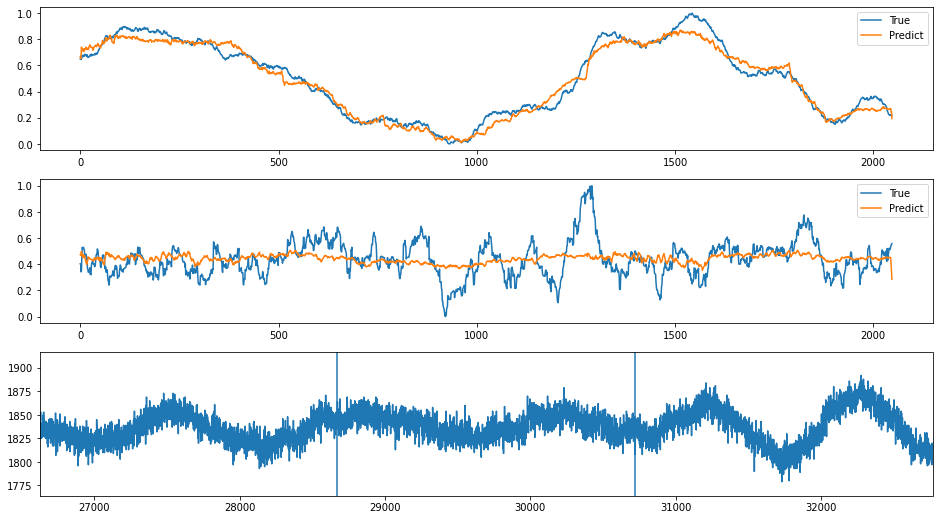

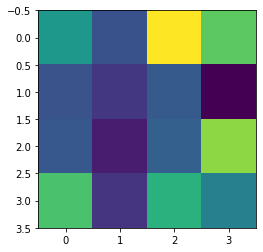

index: 287544
Error: 0.010026601170766697
type                                                         Inst
fill                                                         6709
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-20 23:32:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6709/...
n_bunches                                                    2556
bunch_index                                                  2155
bunch_number                                                 1591
ts_length                                                   65536
chunk                                                           9
Name: 2349, dtype: object


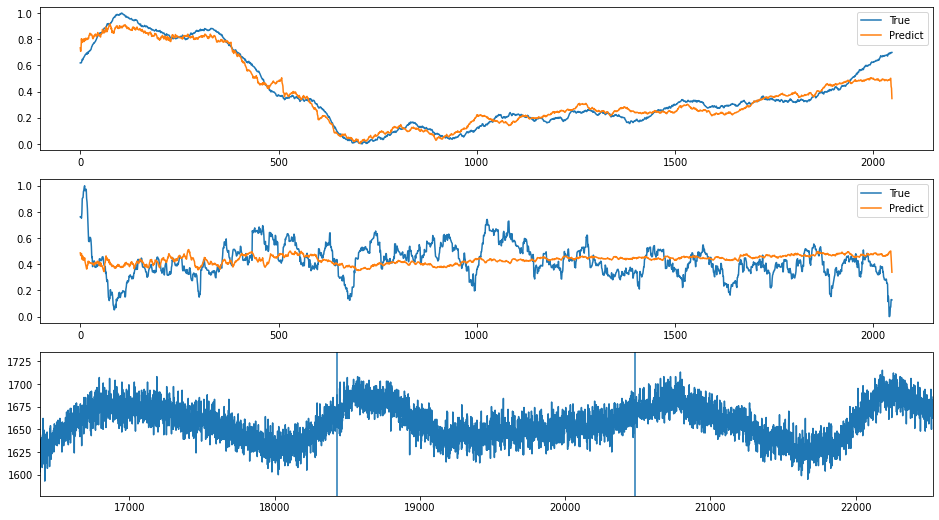

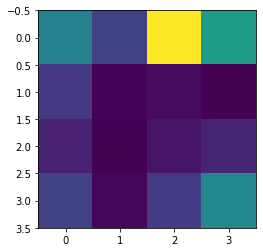

In [25]:
for i in range(10):
    index = sorted_error_indices[i]
    plot_train_index(index)

# From right to left

index: 328914
Error: 0.10197472442694058
type                                                         Inst
fill                                                         6858
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-28 08:16:20
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6858/...
n_bunches                                                    1227
bunch_index                                                    23
bunch_number                                                   11
ts_length                                                   65536
chunk                                                          11
Name: 3071, dtype: object


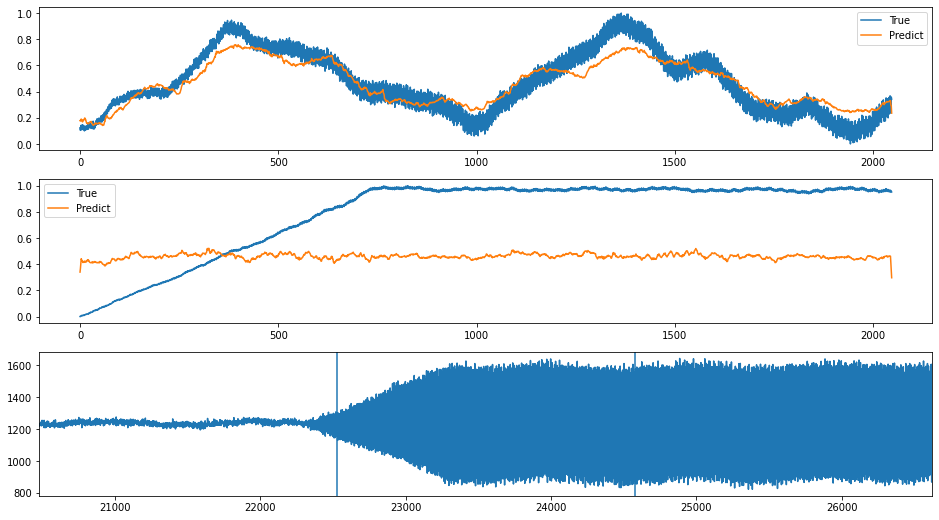

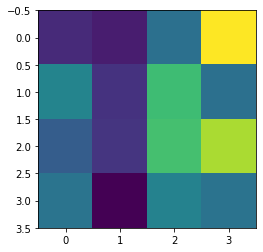

index: 383354
Error: 0.09916178927100444
type                                                         Inst
fill                                                         6436
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-30 06:29:40
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6436/...
n_bunches                                                     408
bunch_index                                                  2284
bunch_number                                                  399
ts_length                                                   65536
chunk                                                          17
Name: 4489, dtype: object


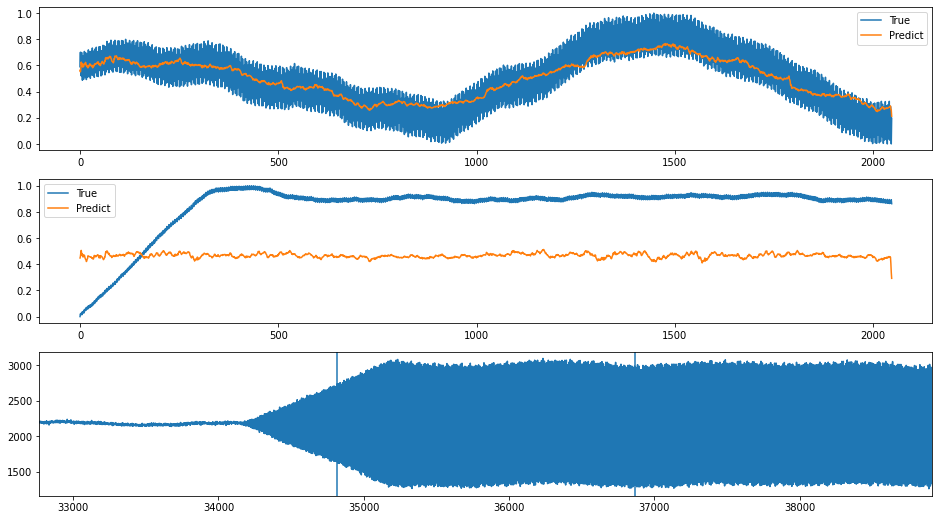

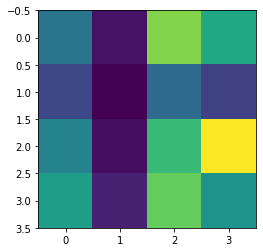

index: 395502
Error: 0.09659851001163311
type                                                         Inst
fill                                                         6604
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-23 20:50:18
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6604/...
n_bunches                                                    2820
bunch_index                                                  3158
bunch_number                                                 2574
ts_length                                                   65536
chunk                                                          11
Name: 3024, dtype: object


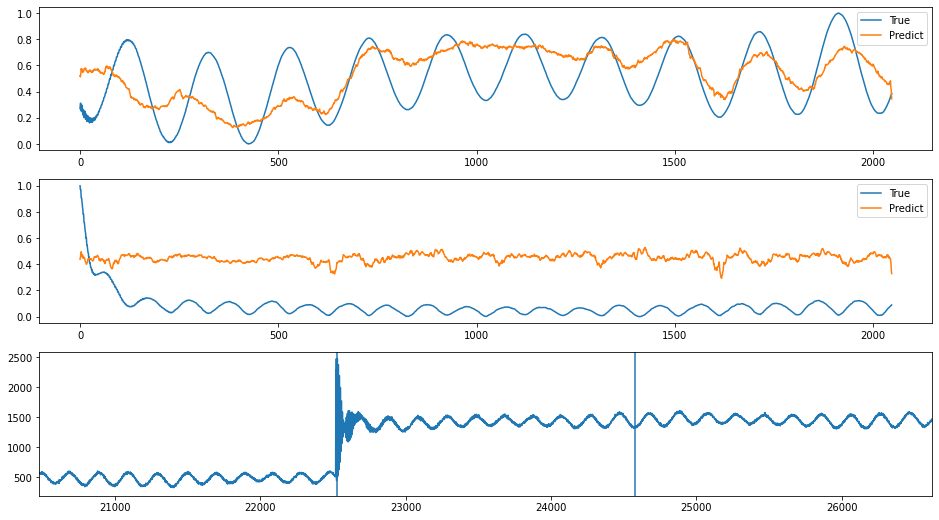

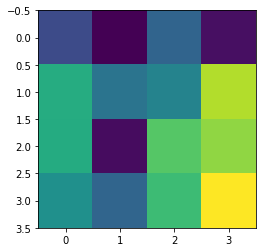

index: 386769
Error: 0.09539957178330374
type                                                         Inst
fill                                                         6436
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-30 06:29:40
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6436/...
n_bunches                                                     408
bunch_index                                                  2284
bunch_number                                                  399
ts_length                                                   65536
chunk                                                          14
Name: 3721, dtype: object


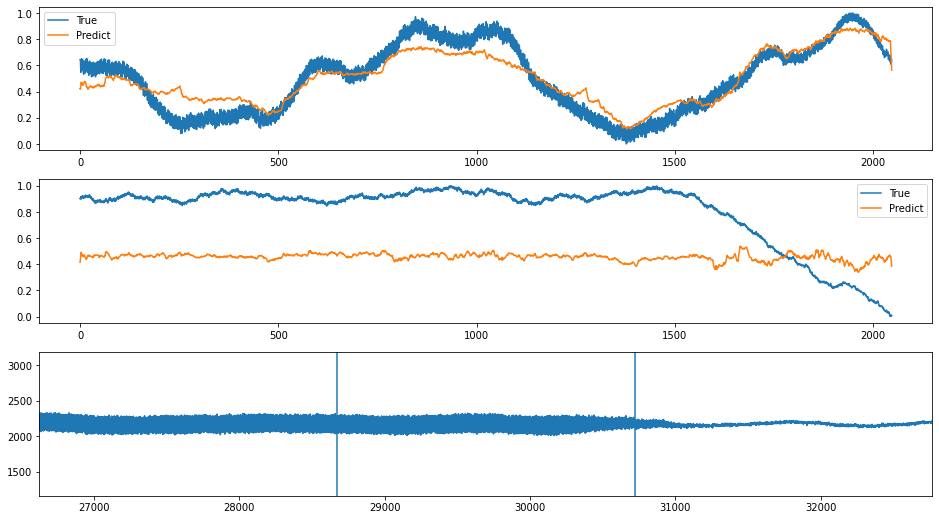

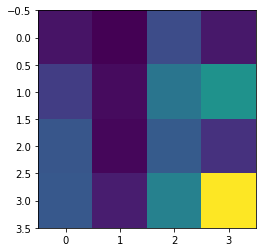

index: 385613
Error: 0.09376991602461109
type                                                         Inst
fill                                                         6394
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-16 17:37:11
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6394/...
n_bunches                                                     748
bunch_index                                                  1315
bunch_number                                                  676
ts_length                                                   65536
chunk                                                           4
Name: 1212, dtype: object


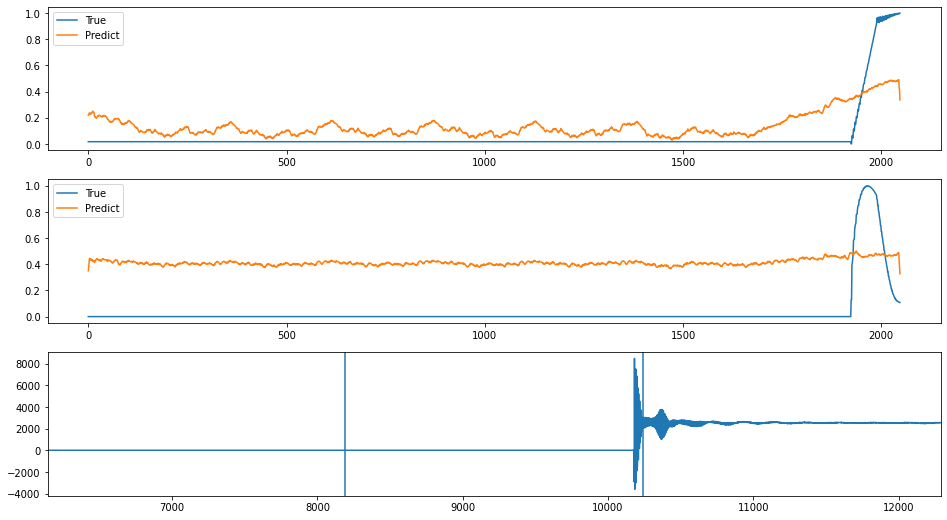

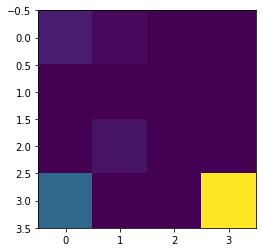

index: 321884
Error: 0.09334485415955342
type                                                         Inst
fill                                                         7350
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 15:09:40
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7350/...
n_bunches                                                     108
bunch_index                                                   185
bunch_number                                                   70
ts_length                                                   65536
chunk                                                          11
Name: 2977, dtype: object


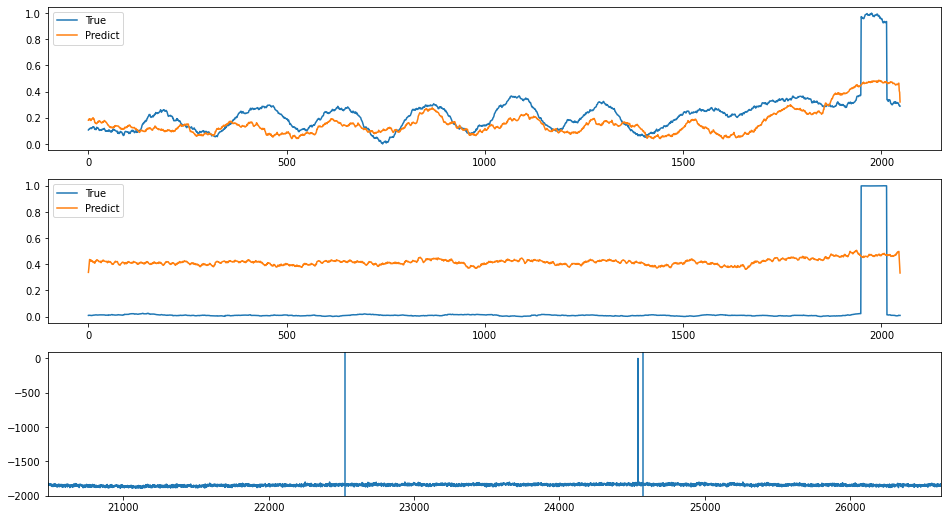

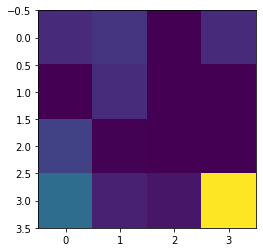

index: 20668
Error: 0.09275118814980472
type                                                         Inst
fill                                                         6384
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-12 19:12:42
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6384/...
n_bunches                                                     524
bunch_index                                                  1331
bunch_number                                                  482
ts_length                                                   65536
chunk                                                           5
Name: 1369, dtype: object


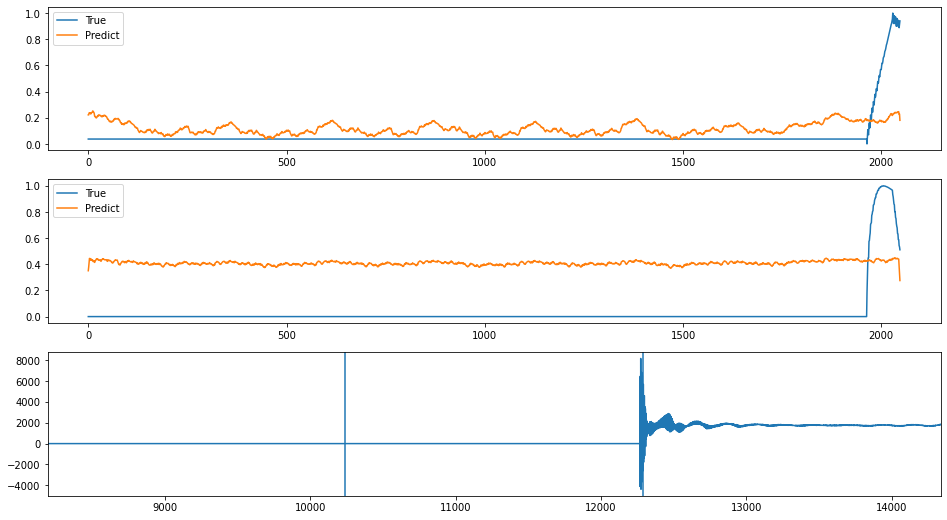

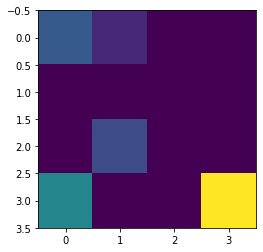

index: 236515
Error: 0.0921802858601767
type                                                         Inst
fill                                                         6253
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-28 13:00:35
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6253/...
n_bunches                                                     404
bunch_index                                                   562
bunch_number                                                  297
ts_length                                                   65536
chunk                                                           2
Name: 606, dtype: object


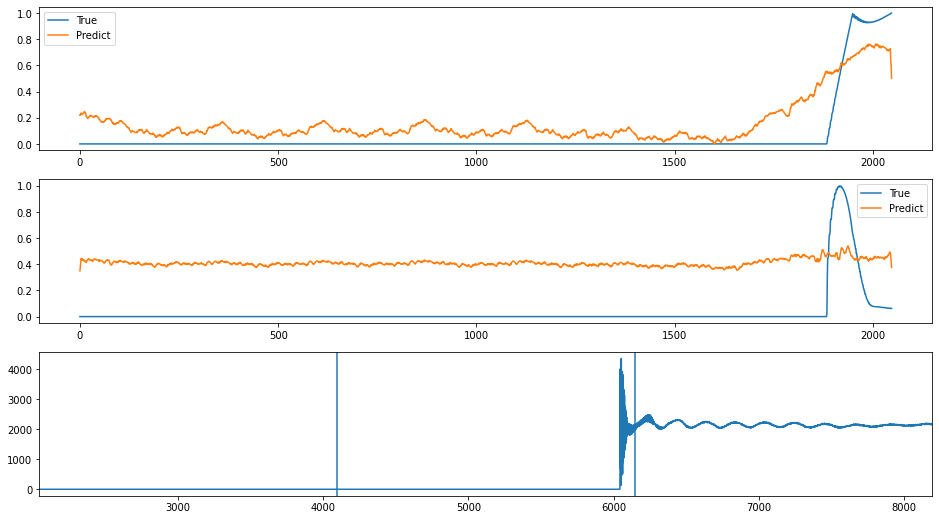

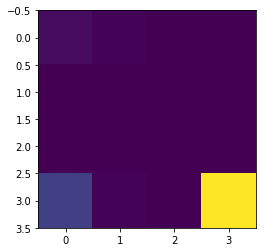

index: 328958
Error: 0.09214535017148336
type                                                         Inst
fill                                                         6436
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-30 01:30:00
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6436/...
n_bunches                                                     152
bunch_index                                                  1034
bunch_number                                                  117
ts_length                                                   65536
chunk                                                           5
Name: 1510, dtype: object


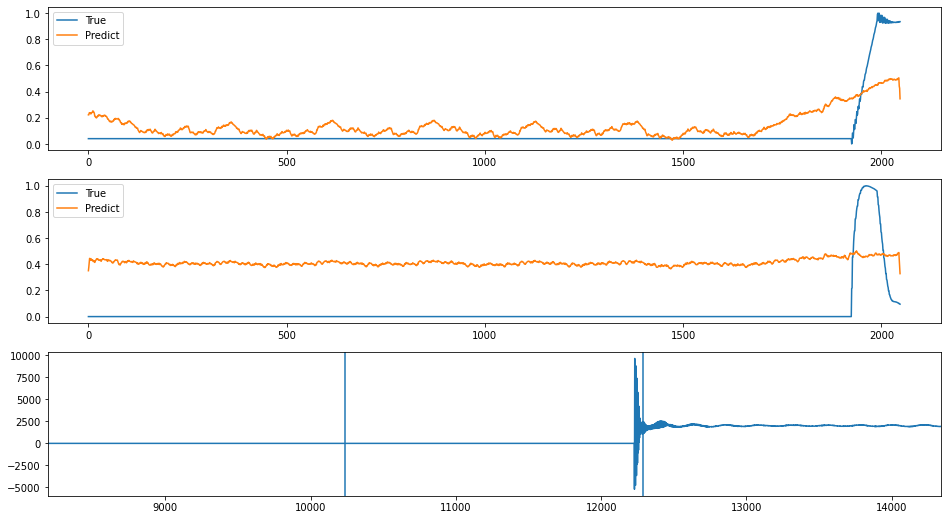

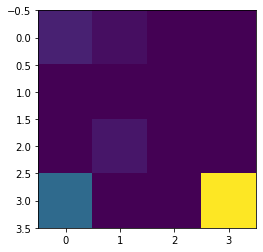

index: 268992
Error: 0.09211311488272224
type                                                         Inst
fill                                                         6246
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-27 04:40:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6246/...
n_bunches                                                     180
bunch_index                                                   233
bunch_number                                                  116
ts_length                                                   65536
chunk                                                           3
Name: 882, dtype: object


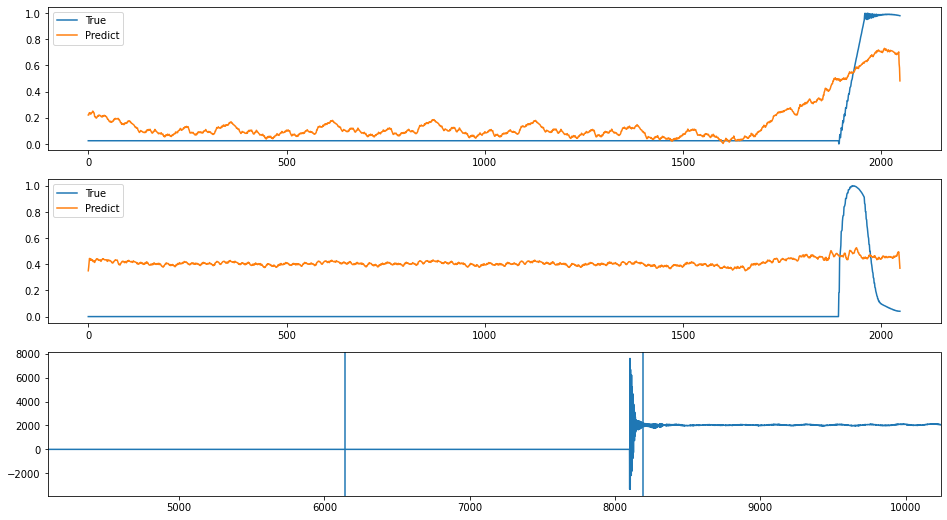

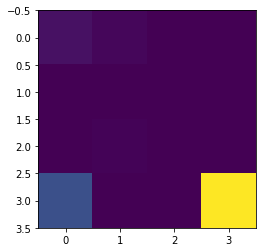

index: 264891
Error: 0.09184979341927484
type                                                         Inst
fill                                                         6355
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-01 18:21:41
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6355/...
n_bunches                                                     780
bunch_index                                                  1299
bunch_number                                                  698
ts_length                                                   65536
chunk                                                           4
Name: 1269, dtype: object


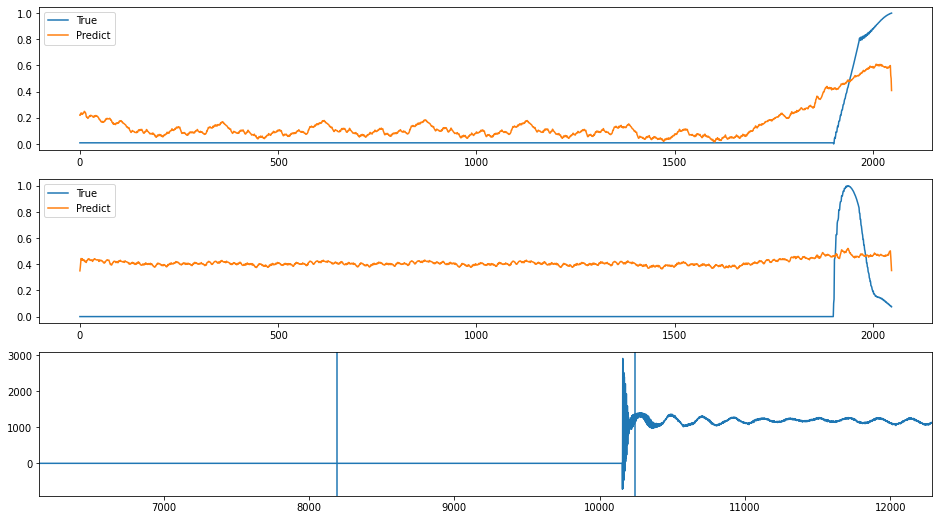

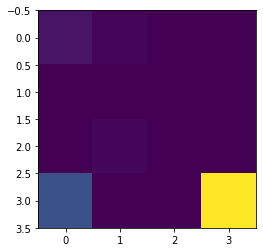

index: 311782
Error: 0.0917989235519519
type                                                         Inst
fill                                                         6346
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-29 10:51:10
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6346/...
n_bunches                                                     524
bunch_index                                                   919
bunch_number                                                  491
ts_length                                                   65536
chunk                                                           5
Name: 1494, dtype: object


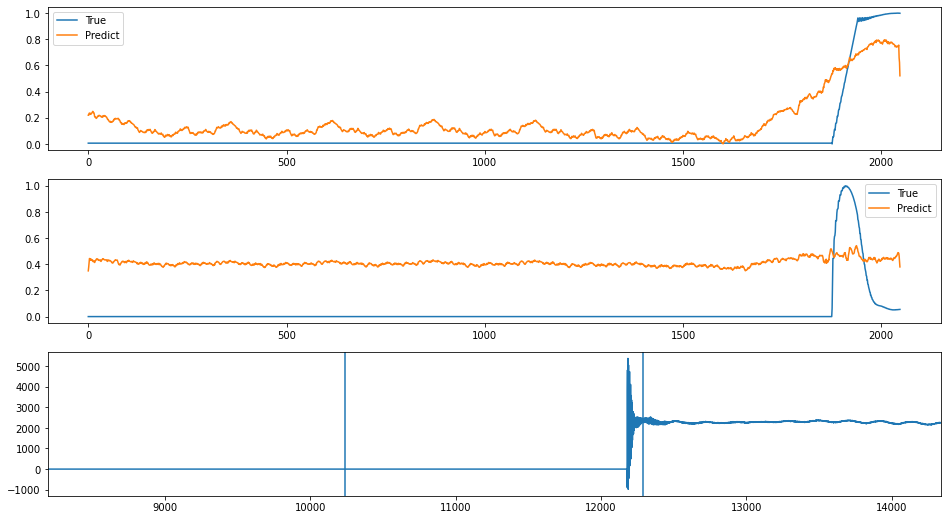

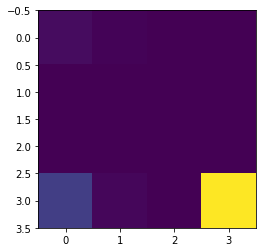

index: 42659
Error: 0.09166400751318525
type                                                         Inst
fill                                                         6253
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-28 13:01:57
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6253/...
n_bunches                                                     460
bunch_index                                                   822
bunch_number                                                  448
ts_length                                                   65536
chunk                                                           2
Name: 719, dtype: object


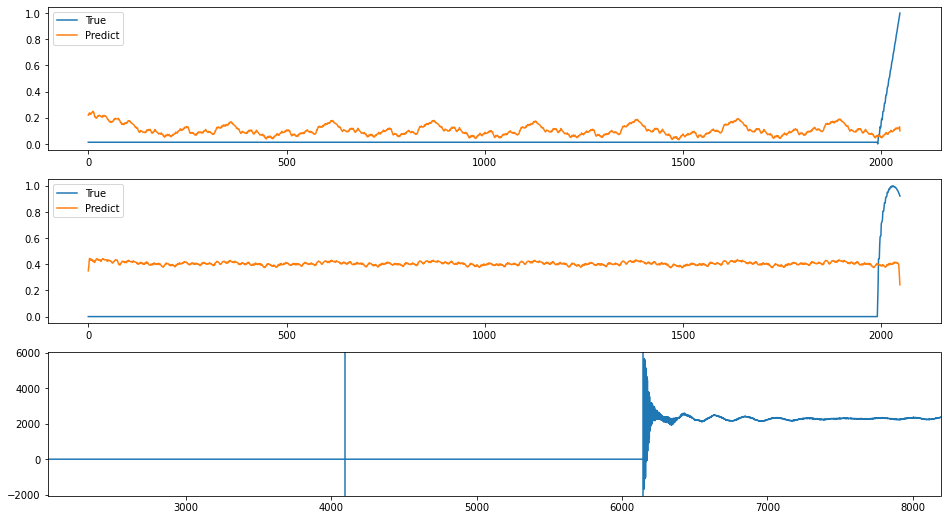

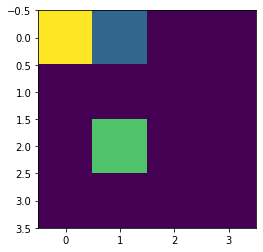

index: 22447
Error: 0.09134149817299417
type                                                         Inst
fill                                                         6384
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-12 19:12:42
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6384/...
n_bunches                                                     524
bunch_index                                                  1331
bunch_number                                                  482
ts_length                                                   65536
chunk                                                           6
Name: 1625, dtype: object


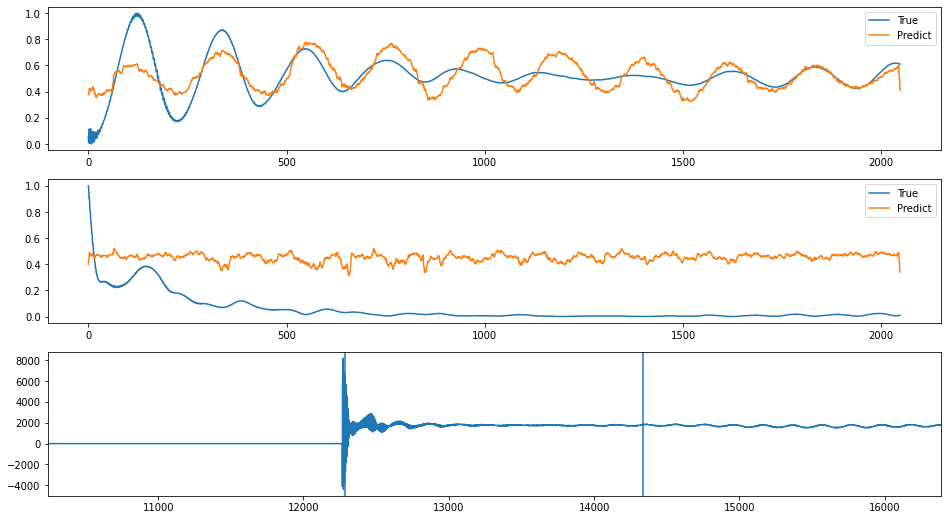

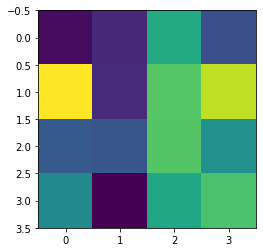

index: 364413
Error: 0.09066323318037985
type                                                         Inst
fill                                                         6773
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-10 07:24:38
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6773/...
n_bunches                                                    1068
bunch_index                                                  1166
bunch_number                                                  850
ts_length                                                   65536
chunk                                                          11
Name: 3041, dtype: object


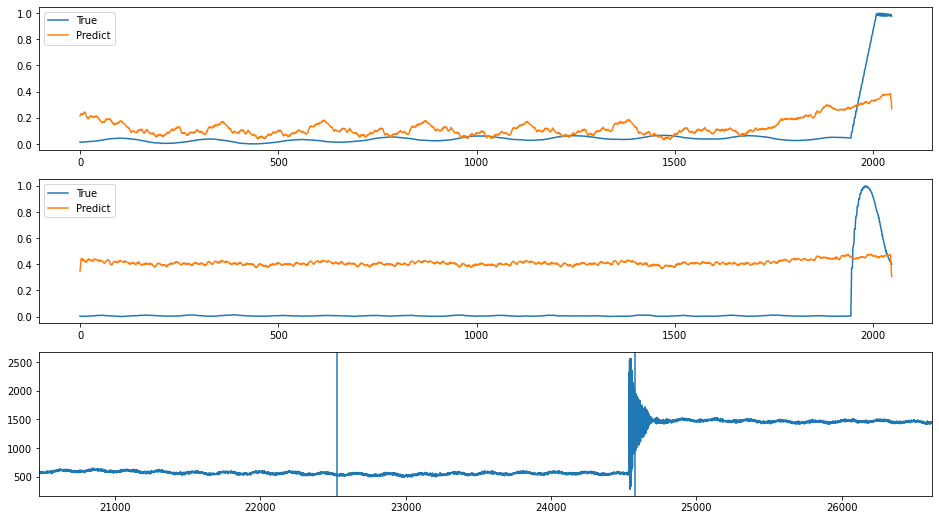

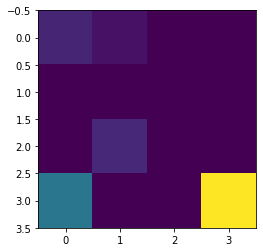

index: 39513
Error: 0.09019862880275532
type                                                         Inst
fill                                                         6706
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-20 08:56:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6706/...
n_bunches                                                     505
bunch_index                                                  1375
bunch_number                                                  400
ts_length                                                   65536
chunk                                                          13
Name: 3331, dtype: object


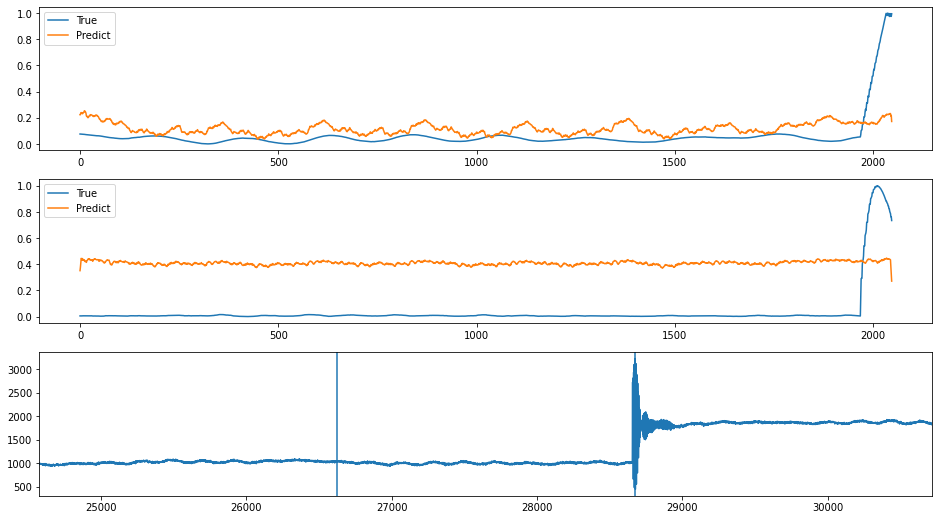

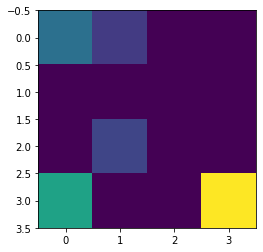

index: 361833
Error: 0.09013054560324406
type                                                         Inst
fill                                                         7045
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-11 23:21:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7045/...
n_bunches                                                     924
bunch_index                                                  1129
bunch_number                                                  820
ts_length                                                   65536
chunk                                                          27
Name: 6936, dtype: object


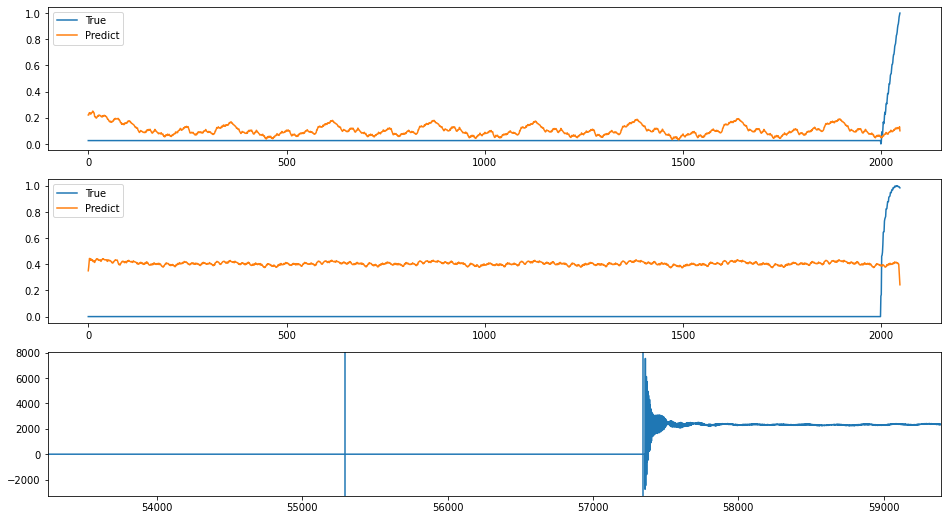

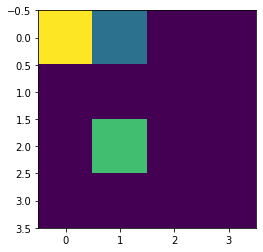

index: 138129
Error: 0.08930781635649598
type                                                         Inst
fill                                                         6220
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-18 00:12:43
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6220/...
n_bunches                                                     228
bunch_index                                                  2774
bunch_number                                                  205
ts_length                                                   65536
chunk                                                           4
Name: 1214, dtype: object


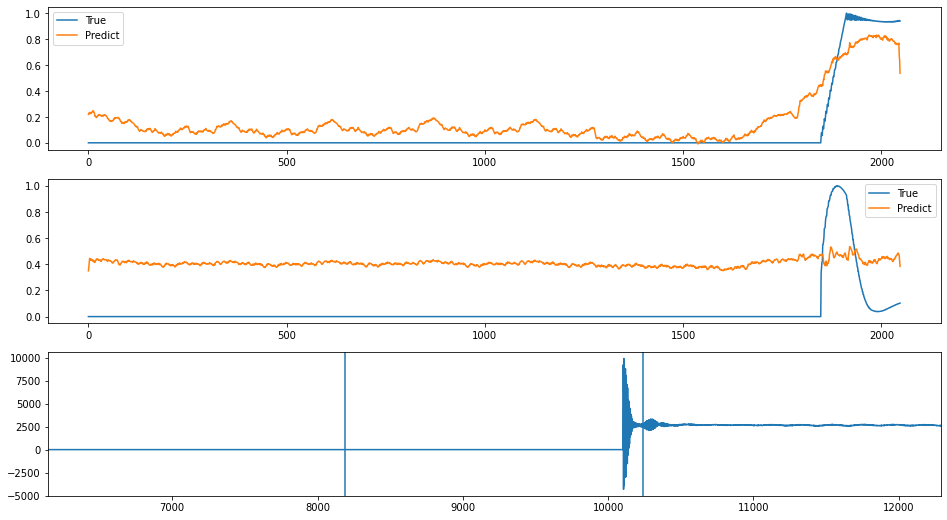

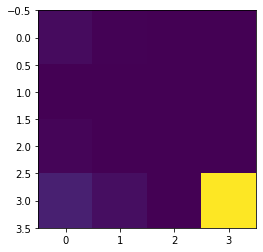

index: 43126
Error: 0.08930757046604082
type                                                         Inst
fill                                                         6253
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-28 13:01:57
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6253/...
n_bunches                                                     460
bunch_index                                                   822
bunch_number                                                  448
ts_length                                                   65536
chunk                                                           3
Name: 975, dtype: object


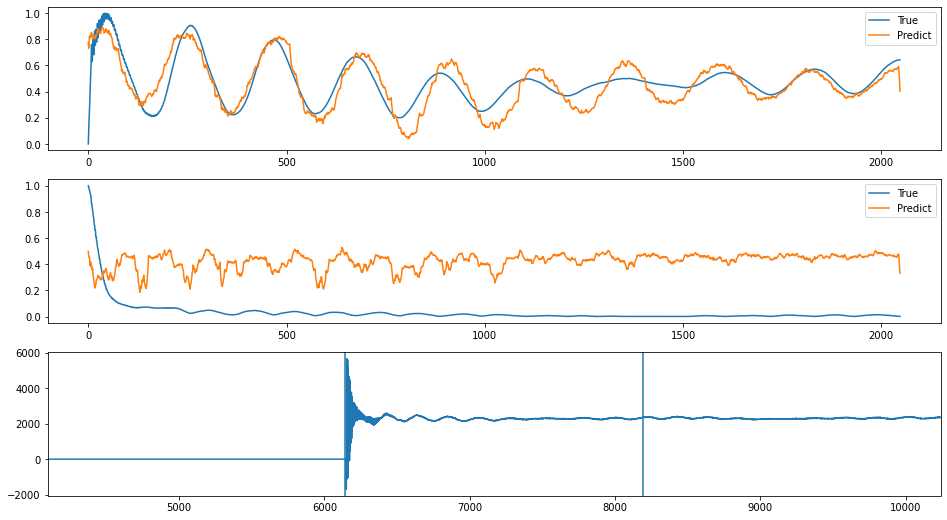

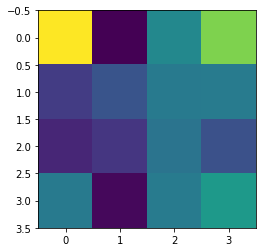

index: 120619
Error: 0.08864992759946334
type                                                         Inst
fill                                                         6807
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-16 03:33:22
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6807/...
n_bunches                                                     156
bunch_index                                                   236
bunch_number                                                   53
ts_length                                                   65536
chunk                                                           9
Name: 2499, dtype: object


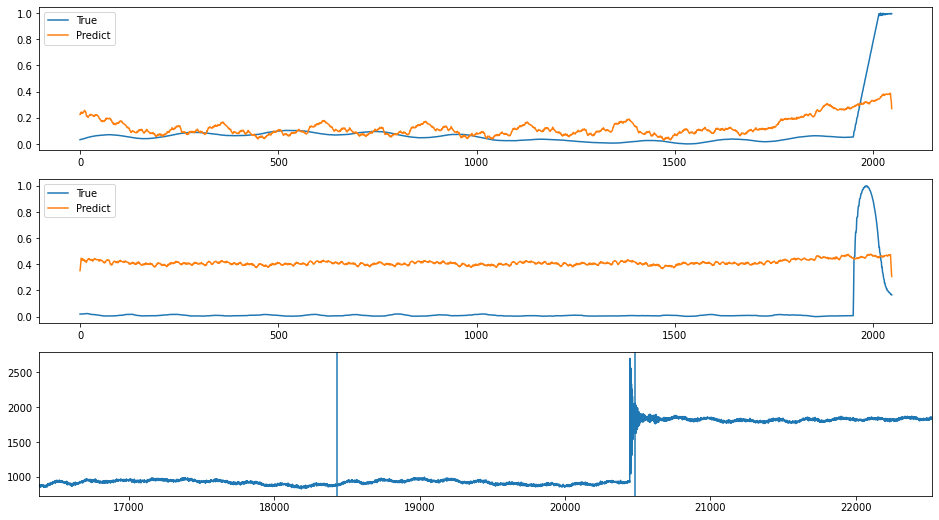

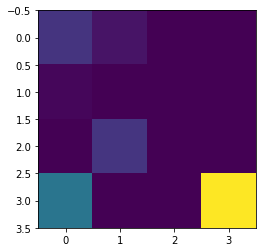

index: 358919
Error: 0.08861921105255469
type                                                         Inst
fill                                                         7236
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-29 19:30:19
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7236/...
n_bunches                                                     108
bunch_index                                                    83
bunch_number                                                   34
ts_length                                                   65536
chunk                                                          12
Name: 3316, dtype: object


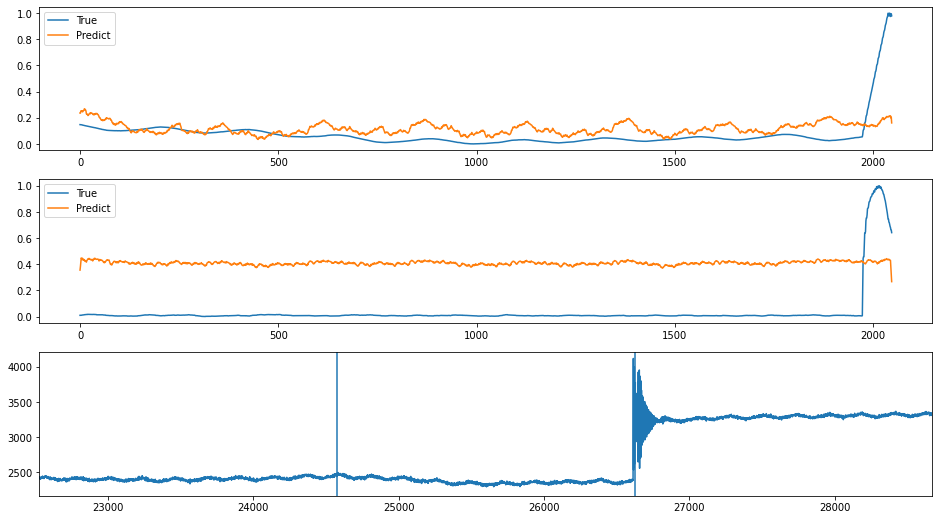

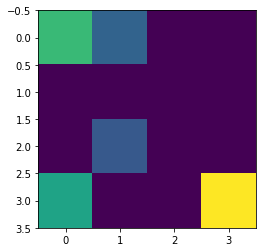

index: 367119
Error: 0.08800892462980561
type                                                         Inst
fill                                                         7331
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-22 15:00:37
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7331/...
n_bunches                                                     540
bunch_index                                                   670
bunch_number                                                  486
ts_length                                                   65536
chunk                                                           8
Name: 2166, dtype: object


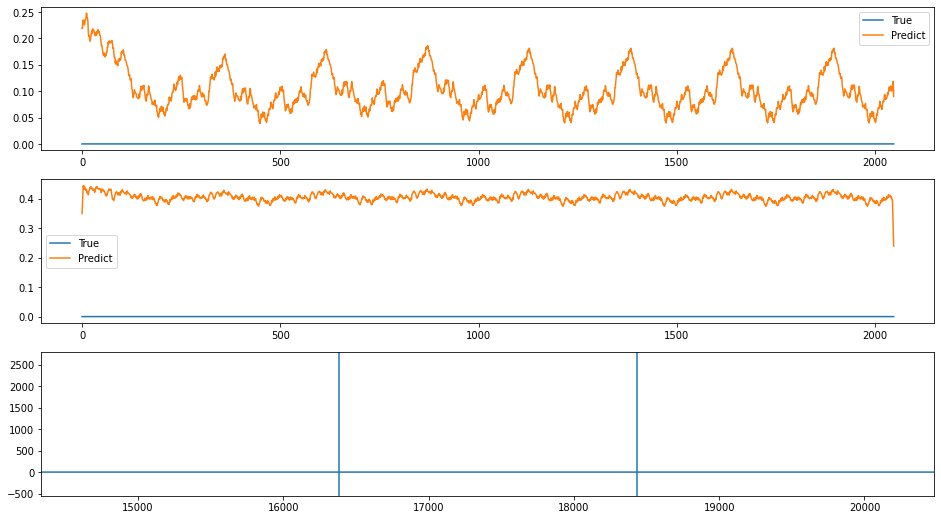

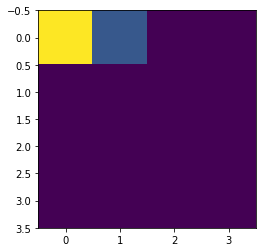

index: 70889
Error: 0.08800892462980561
type                                                         Inst
fill                                                         6675
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-12 19:49:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6675/...
n_bunches                                                     540
bunch_index                                                   630
bunch_number                                                  434
ts_length                                                   65536
chunk                                                          18
Name: 4728, dtype: object


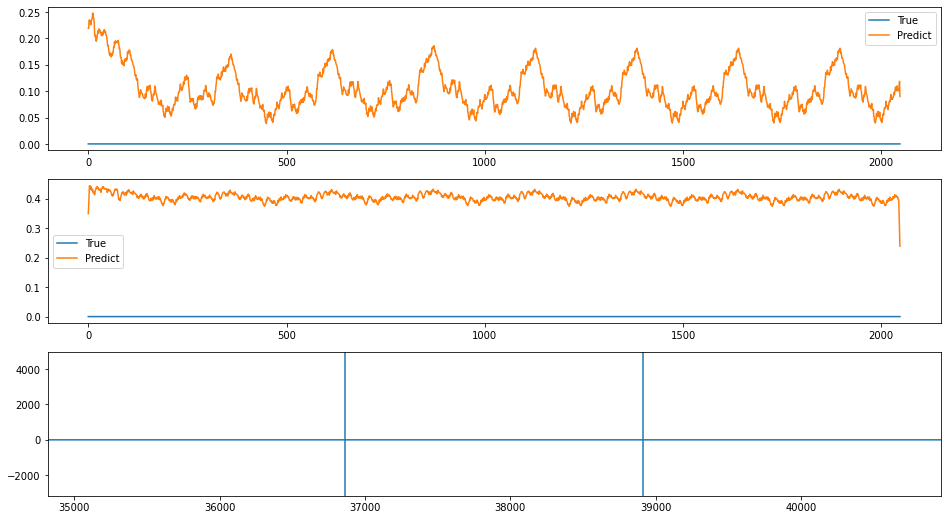

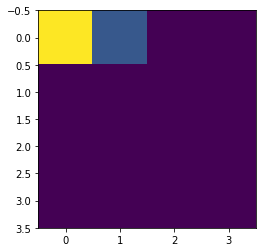

index: 184730
Error: 0.08800892462980561
type                                                         Inst
fill                                                         6214
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-16 19:32:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6214/...
n_bunches                                                     200
bunch_index                                                   147
bunch_number                                                  105
ts_length                                                   65536
chunk                                                          13
Name: 3481, dtype: object


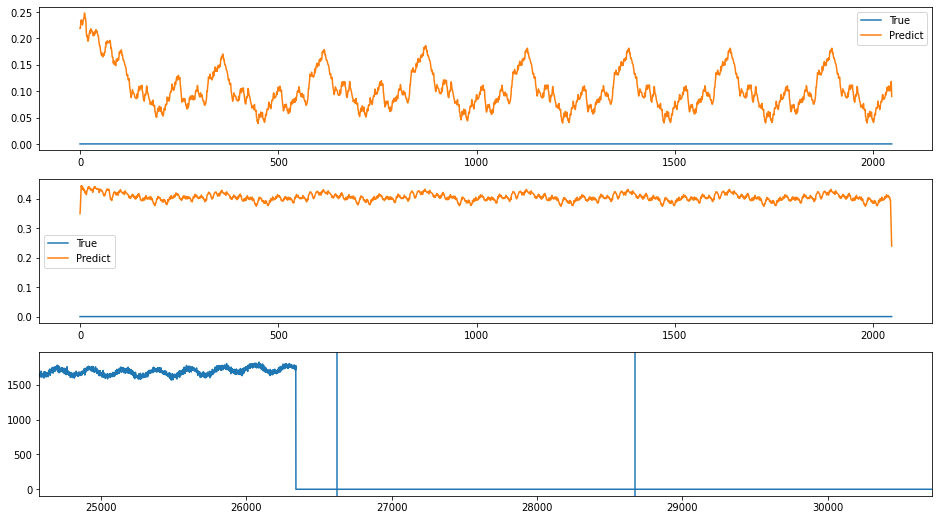

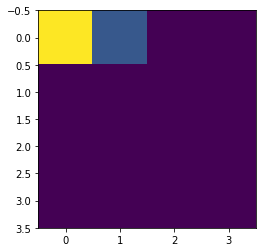

index: 340259
Error: 0.08800892462980561
type                                                         Inst
fill                                                         7058
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-17 05:32:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7058/...
n_bunches                                                     420
bunch_index                                                  1820
bunch_number                                                  412
ts_length                                                   65536
chunk                                                          17
Name: 4352, dtype: object


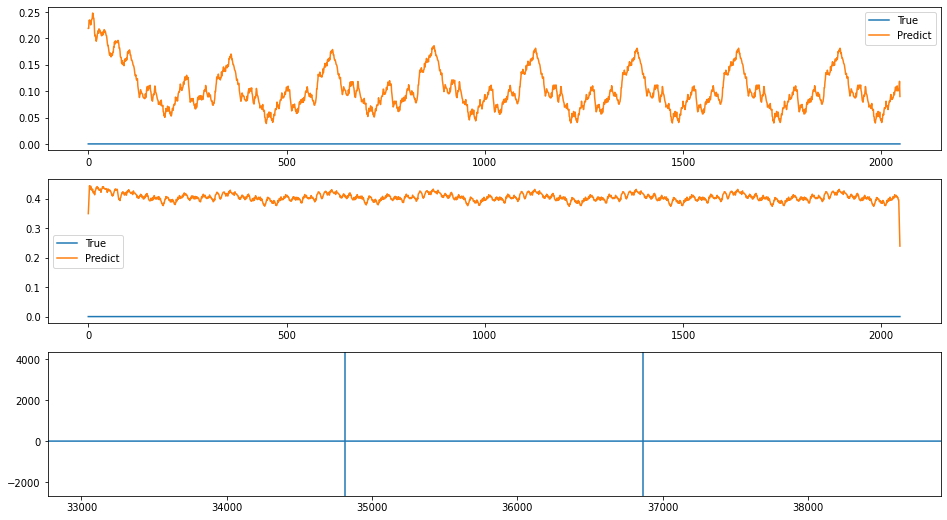

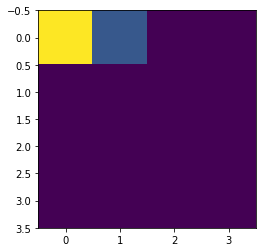

index: 340236
Error: 0.08800892462980561
type                                                         Inst
fill                                                         6193
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-12 23:14:41
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6193/...
n_bunches                                                     292
bunch_index                                                   359
bunch_number                                                  180
ts_length                                                   65536
chunk                                                           3
Name: 801, dtype: object


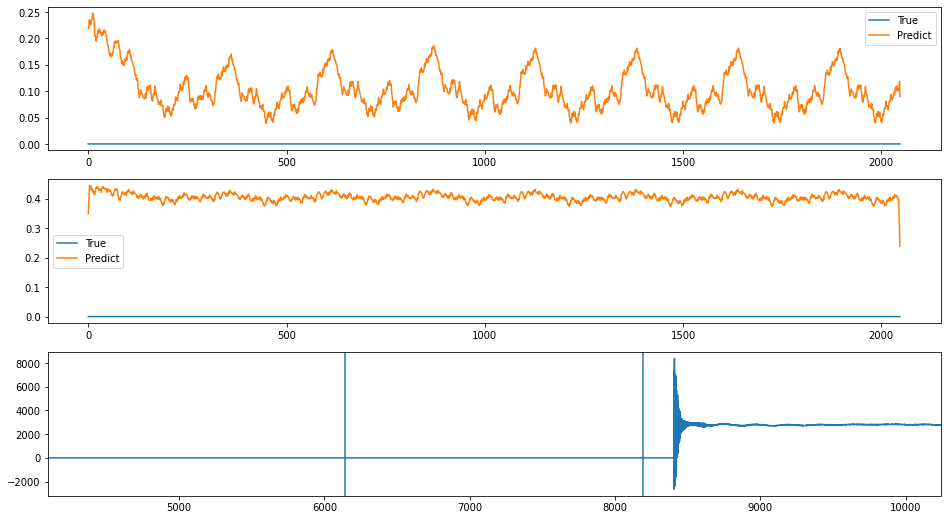

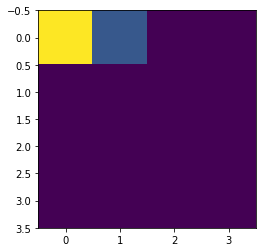

index: 156148
Error: 0.08800892462980561
type                                                         Inst
fill                                                         6192
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-12 17:16:55
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6192/...
n_bunches                                                     572
bunch_index                                                   910
bunch_number                                                  489
ts_length                                                   65536
chunk                                                           6
Name: 1764, dtype: object


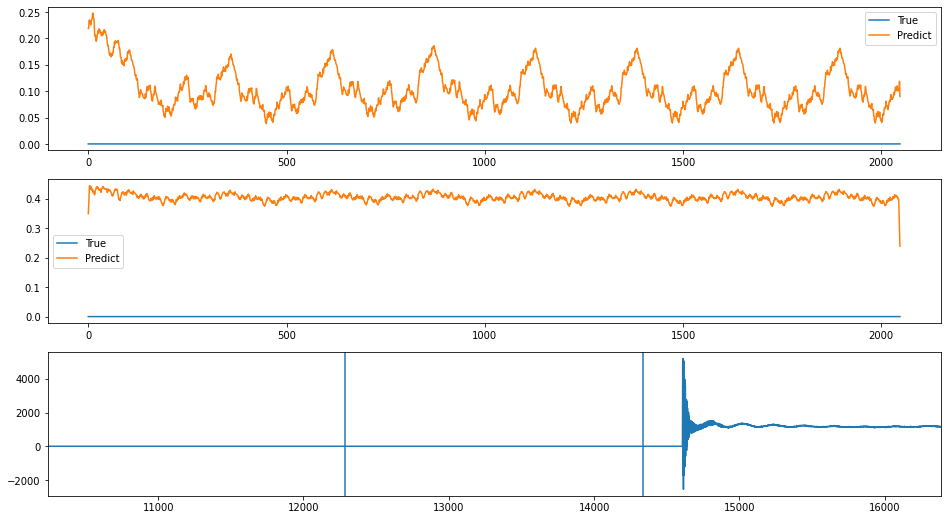

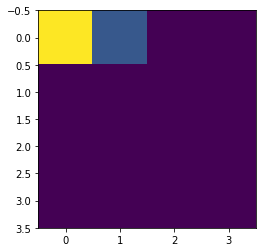

index: 44759
Error: 0.08800892462980561
type                                                         Inst
fill                                                         6253
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-28 13:01:57
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6253/...
n_bunches                                                     460
bunch_index                                                   822
bunch_number                                                  448
ts_length                                                   65536
chunk                                                           1
Name: 463, dtype: object


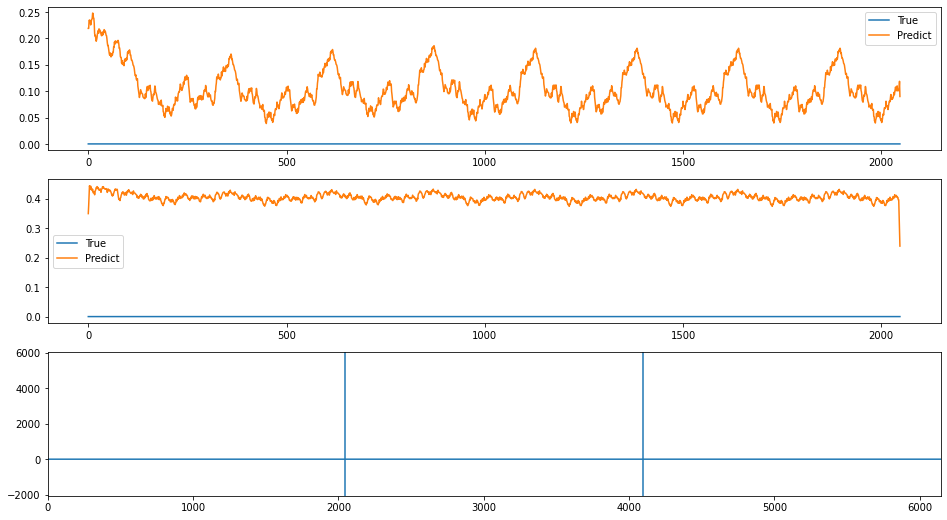

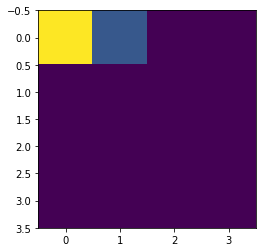

index: 35806
Error: 0.08800892462980561
type                                                         Inst
fill                                                         6411
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-22 21:31:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6411/...
n_bunches                                                     428
bunch_index                                                   657
bunch_number                                                  354
ts_length                                                   65536
chunk                                                           2
Name: 756, dtype: object


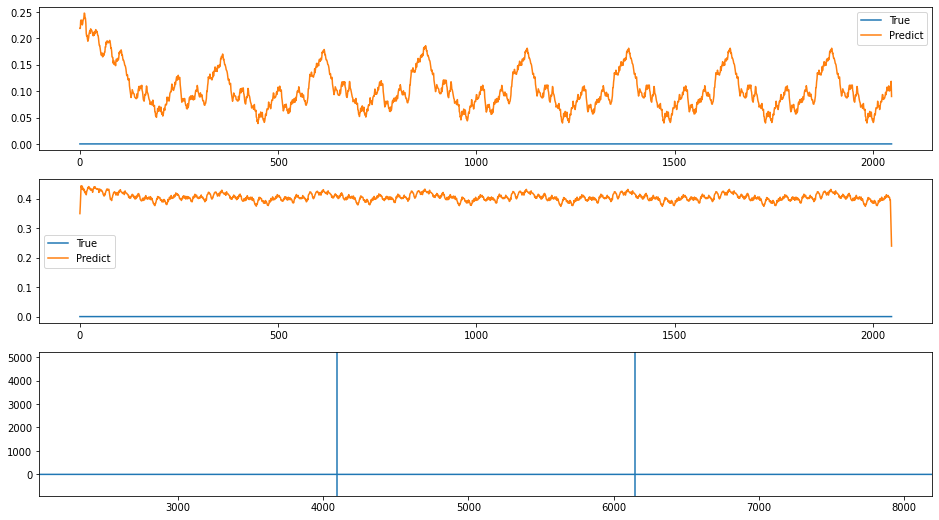

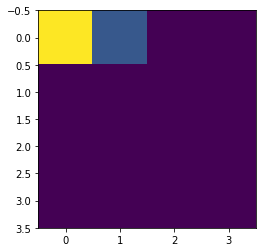

index: 340161
Error: 0.08800892462980561
type                                                         Inst
fill                                                         6435
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-29 19:32:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6435/...
n_bunches                                                      61
bunch_index                                                   218
bunch_number                                                   31
ts_length                                                   65536
chunk                                                           1
Name: 455, dtype: object


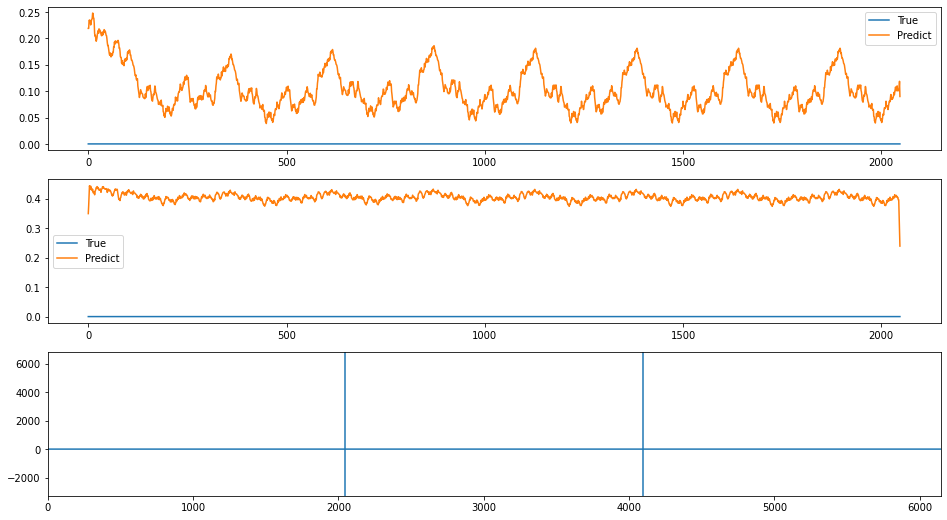

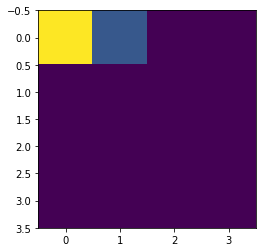

index: 184771
Error: 0.08800892462980561
type                                                         Inst
fill                                                         7441
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-13 05:20:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7441/...
n_bunches                                                     104
bunch_index                                                   483
bunch_number                                                   88
ts_length                                                   65536
chunk                                                           7
Name: 2000, dtype: object


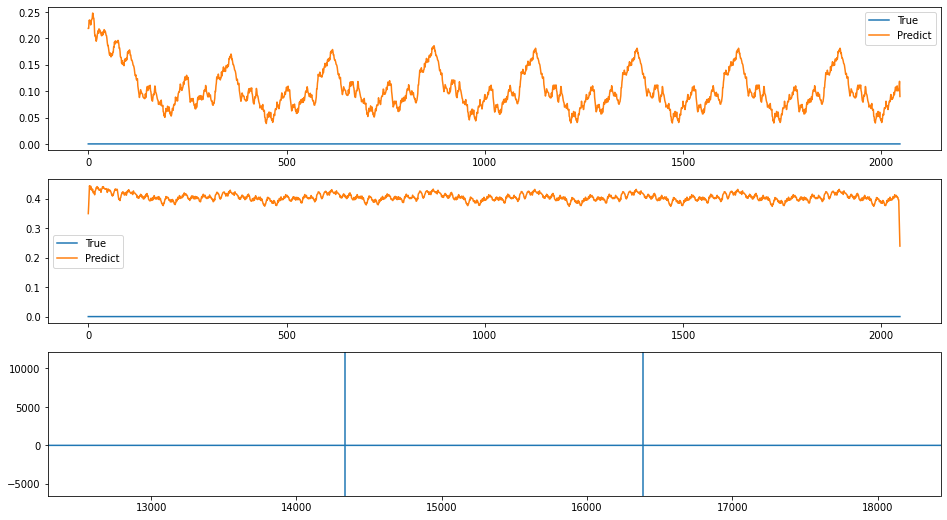

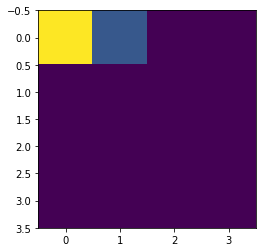

index: 267626
Error: 0.08800892462980561
type                                                         Inst
fill                                                         6395
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-16 20:07:48
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6395/...
n_bunches                                                     492
bunch_index                                                   828
bunch_number                                                  401
ts_length                                                   65536
chunk                                                           5
Name: 1407, dtype: object


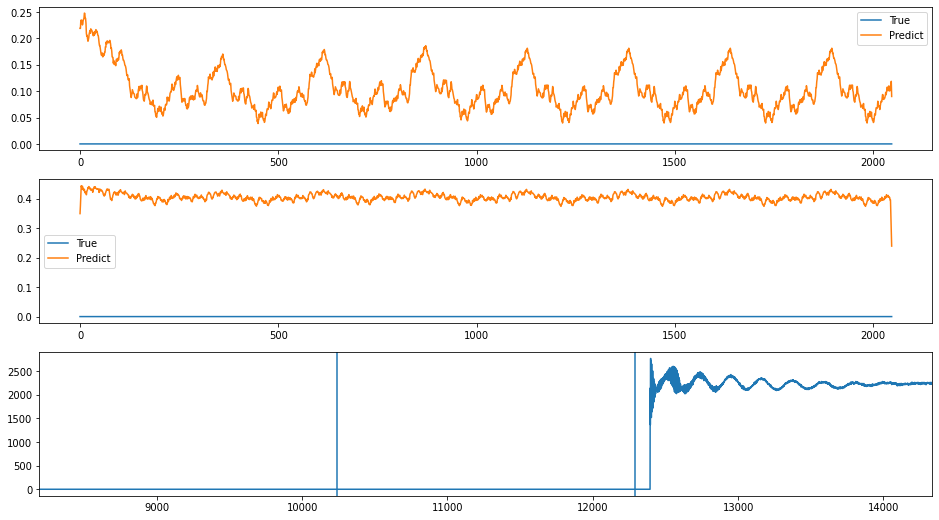

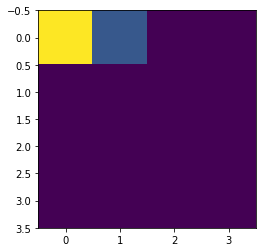

index: 379809
Error: 0.08800892462980561
type                                                         Inst
fill                                                         6898
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-08 00:45:36
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6898/...
n_bunches                                                     156
bunch_index                                                   149
bunch_number                                                   87
ts_length                                                   65536
chunk                                                          10
Name: 2784, dtype: object


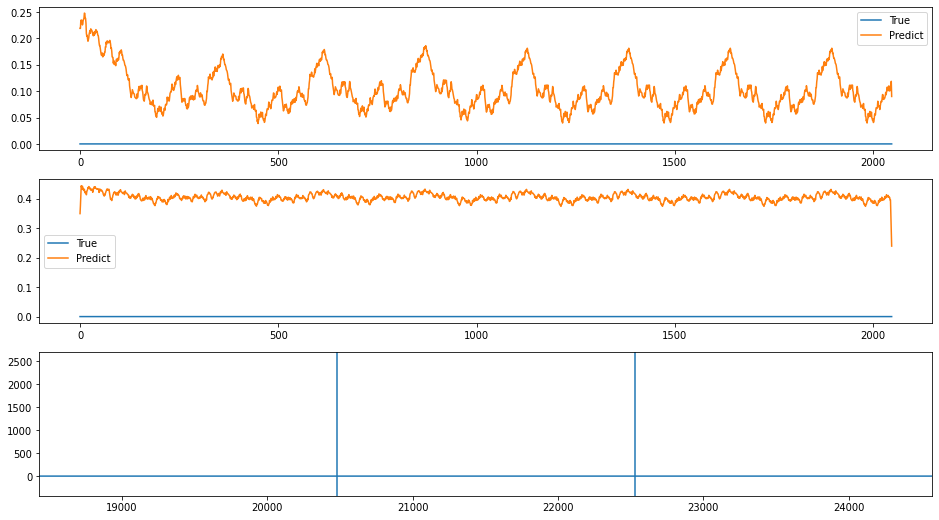

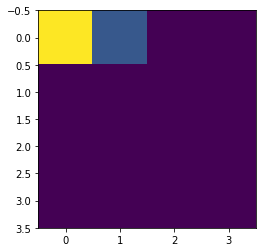

index: 133494
Error: 0.08800892462980561
type                                                         Inst
fill                                                         6927
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-15 23:24:33
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6927/...
n_bunches                                                     924
bunch_index                                                  1183
bunch_number                                                  867
ts_length                                                   65536
chunk                                                          17
Name: 4408, dtype: object


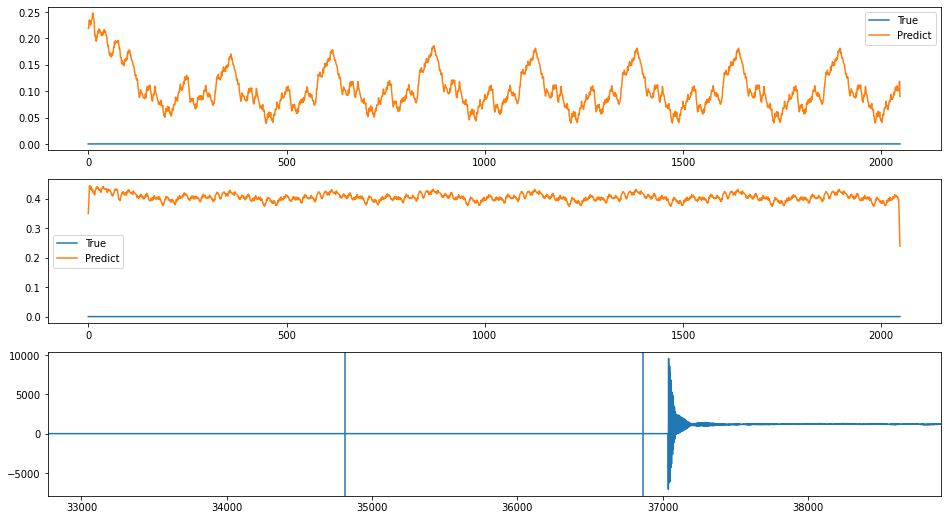

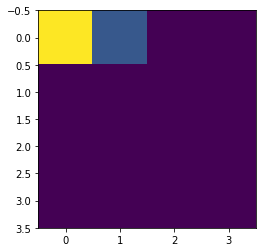

index: 27228
Error: 0.08800892462980561
type                                                         Inst
fill                                                         6362
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-04 17:34:58
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6362/...
n_bunches                                                     652
bunch_index                                                  1078
bunch_number                                                  573
ts_length                                                   65536
chunk                                                           0
Name: 43, dtype: object


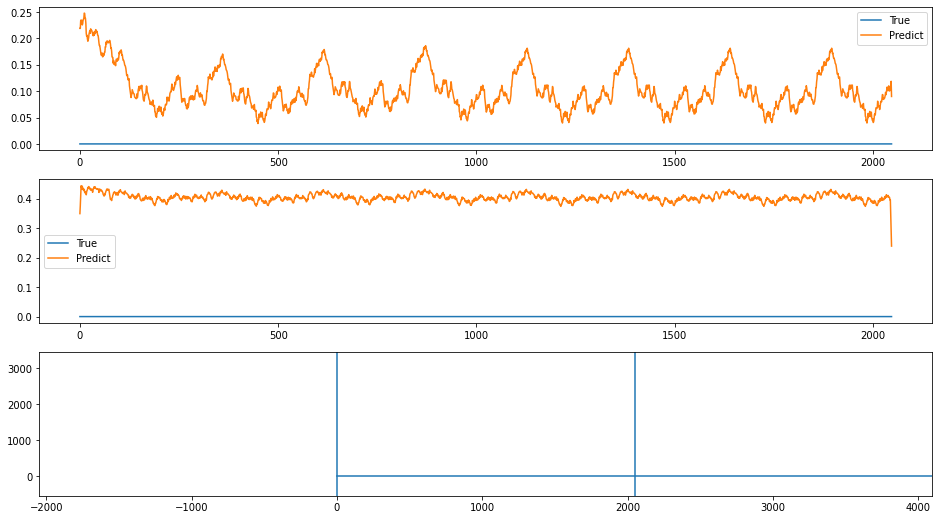

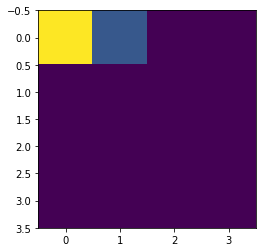

index: 146361
Error: 0.08800892462980561
type                                                         Inst
fill                                                         6413
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-23 19:38:34
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6413/...
n_bunches                                                    1004
bunch_index                                                  1821
bunch_number                                                  972
ts_length                                                   65536
chunk                                                           3
Name: 770, dtype: object


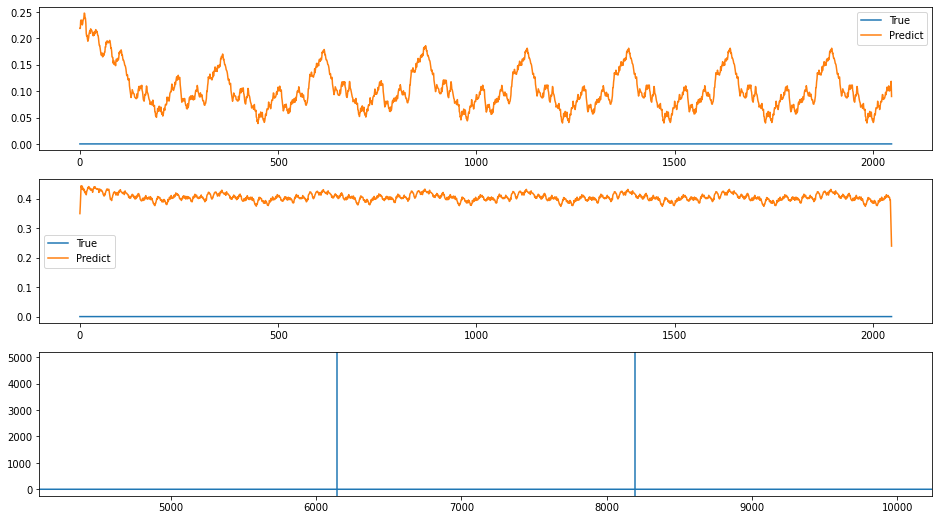

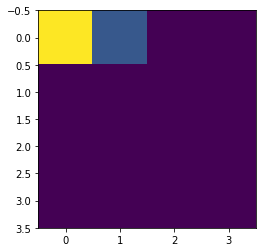

index: 223346
Error: 0.08800892462980561
type                                                         Inst
fill                                                         6351
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-31 15:16:08
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6351/...
n_bunches                                                     780
bunch_index                                                  1332
bunch_number                                                  716
ts_length                                                   65536
chunk                                                           0
Name: 103, dtype: object


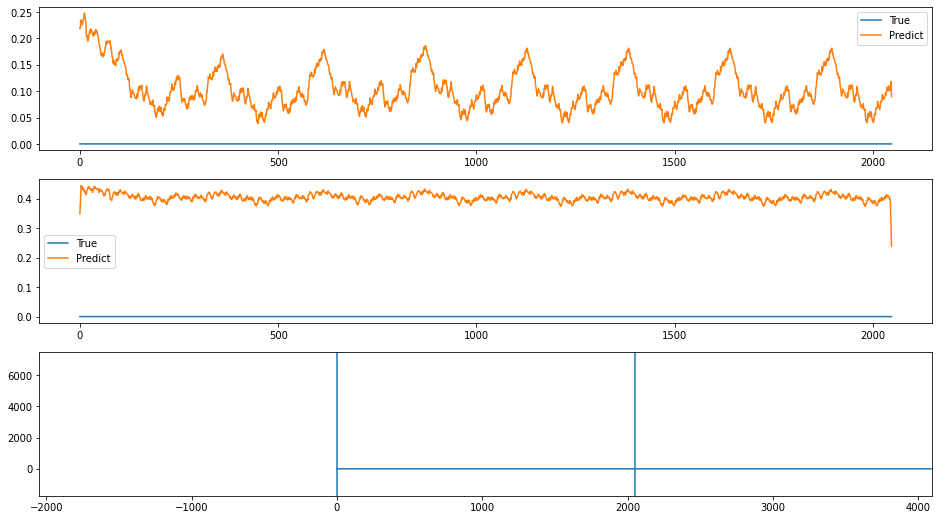

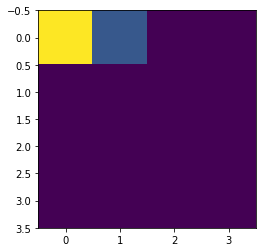

index: 184740
Error: 0.08800892462980561
type                                                         Inst
fill                                                         6214
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-16 19:32:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6214/...
n_bunches                                                     200
bunch_index                                                   147
bunch_number                                                  105
ts_length                                                   65536
chunk                                                          14
Name: 3737, dtype: object


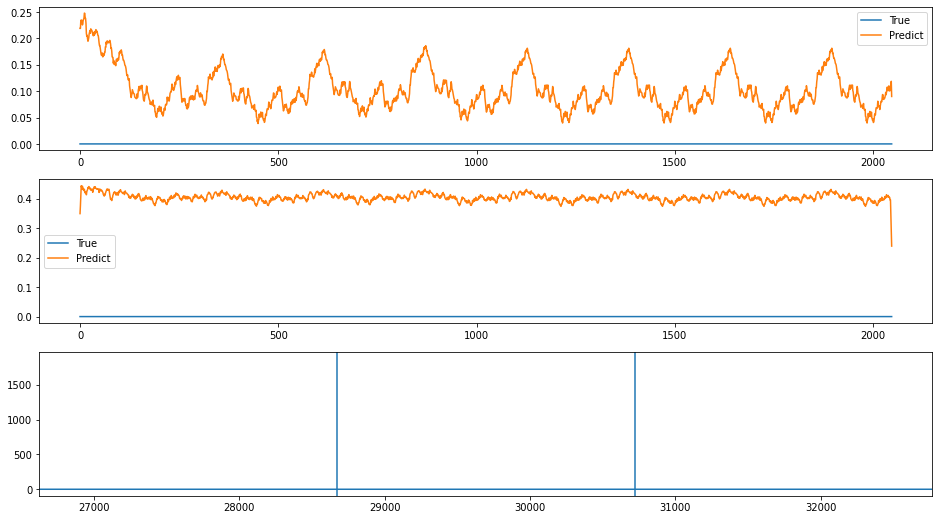

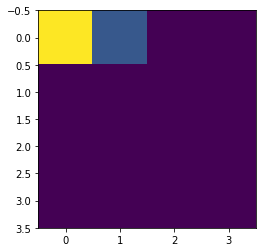

index: 44647
Error: 0.08800892462980561
type                                                         Inst
fill                                                         6275
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-05 19:51:28
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6275/...
n_bunches                                                    1484
bunch_index                                                  2618
bunch_number                                                 1393
ts_length                                                   65536
chunk                                                           1
Name: 296, dtype: object


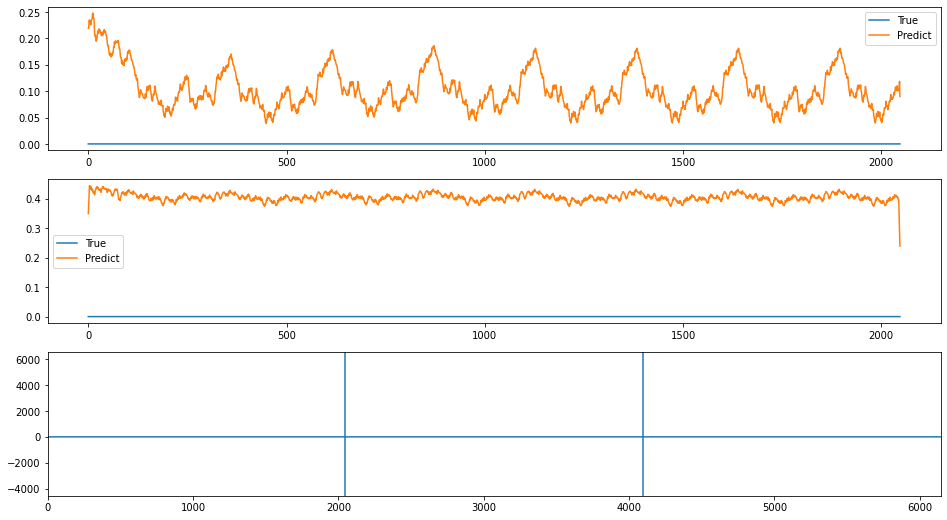

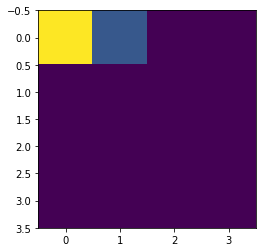

index: 379540
Error: 0.08800892462980561
type                                                         Inst
fill                                                         6898
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-08 00:45:36
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6898/...
n_bunches                                                     156
bunch_index                                                   149
bunch_number                                                   87
ts_length                                                   65536
chunk                                                          19
Name: 5088, dtype: object


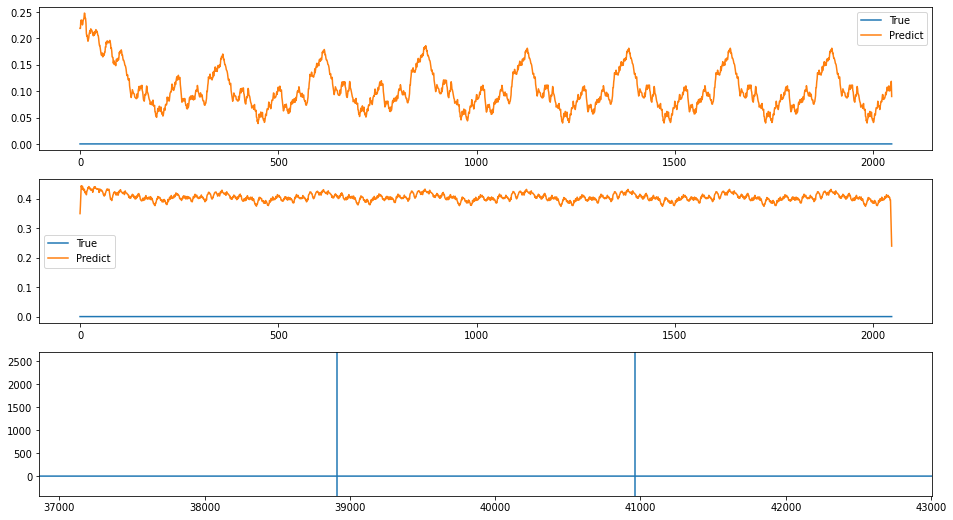

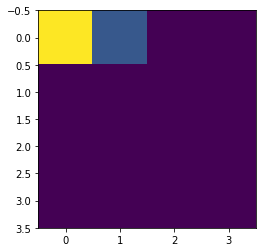

index: 126004
Error: 0.08800892462980561
type                                                         Inst
fill                                                         6384
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-12 19:06:30
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6384/...
n_bunches                                                      76
bunch_index                                                   179
bunch_number                                                   25
ts_length                                                   65536
chunk                                                           1
Name: 392, dtype: object


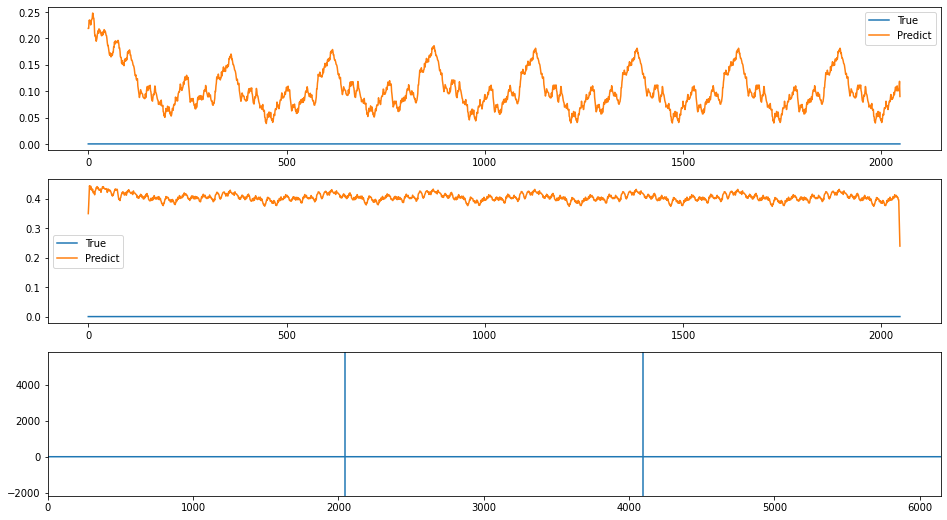

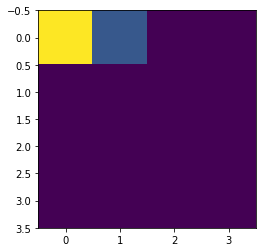

index: 125768
Error: 0.08800892462980561
type                                                         Inst
fill                                                         6904
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-08 20:44:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6904/...
n_bunches                                                    1212
bunch_index                                                  1579
bunch_number                                                 1163
ts_length                                                   65536
chunk                                                           0
Name: 246, dtype: object


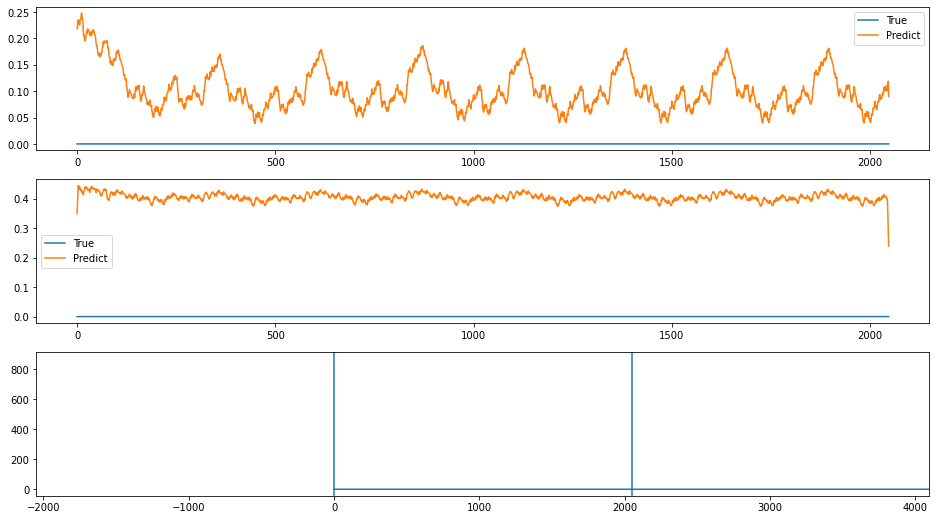

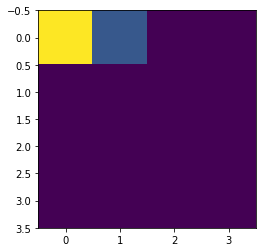

index: 146588
Error: 0.08800892462980561
type                                                         Inst
fill                                                         6351
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-31 15:14:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6351/...
n_bunches                                                     652
bunch_index                                                  1117
bunch_number                                                  597
ts_length                                                   65536
chunk                                                           3
Name: 810, dtype: object


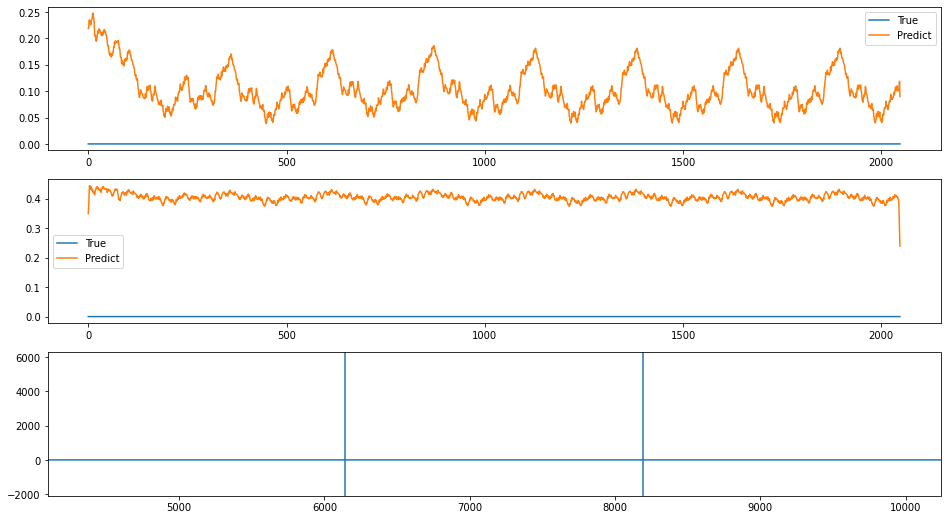

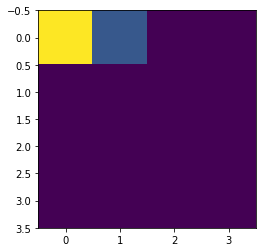

index: 368304
Error: 0.08800892462980561
type                                                         Inst
fill                                                         7480
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-27 22:45:05
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7480/...
n_bunches                                                     229
bunch_index                                                   994
bunch_number                                                  207
ts_length                                                   65536
chunk                                                           8
Name: 2055, dtype: object


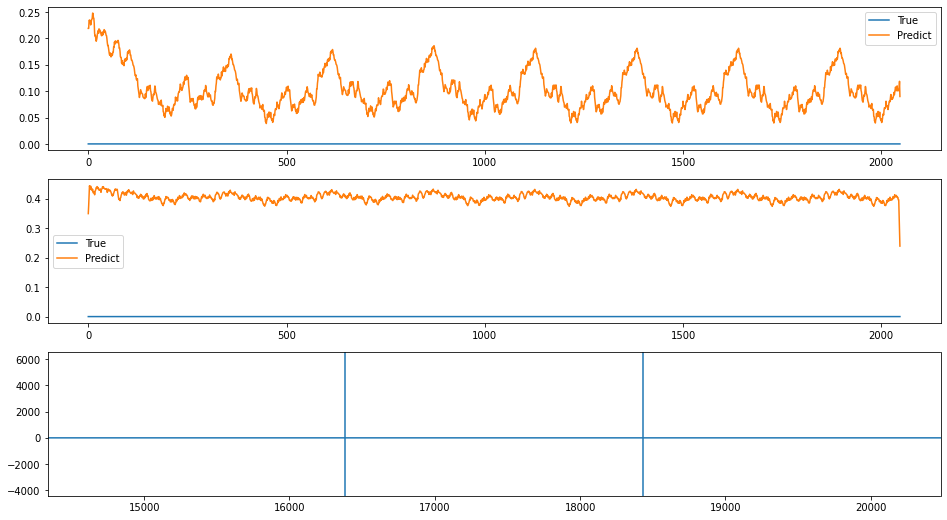

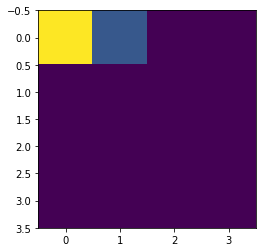

index: 209756
Error: 0.08800892462980561
type                                                         Inst
fill                                                         6381
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-12 07:52:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6381/...
n_bunches                                                     396
bunch_index                                                  2352
bunch_number                                                  344
ts_length                                                   65536
chunk                                                           2
Name: 619, dtype: object


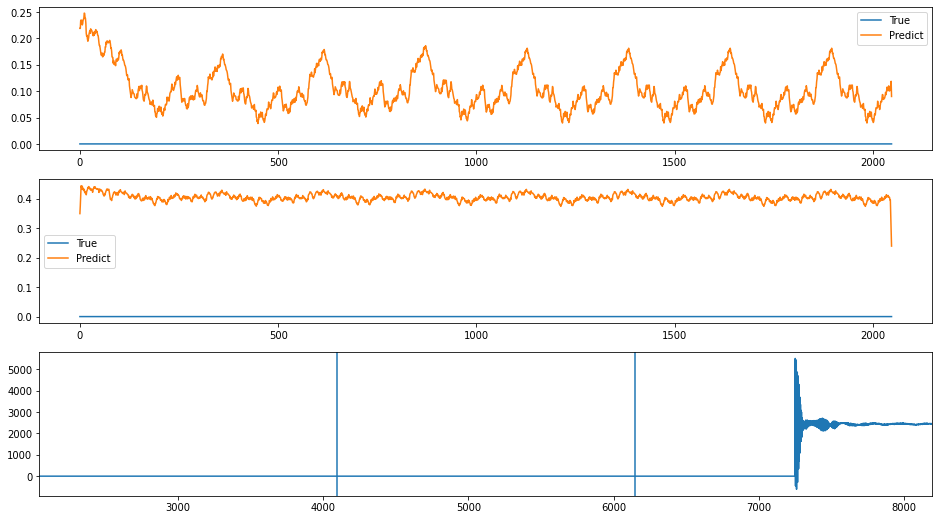

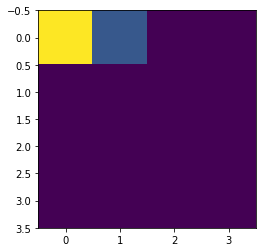

index: 379359
Error: 0.08800892462980561
type                                                         Inst
fill                                                         6898
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-08 00:45:36
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6898/...
n_bunches                                                     156
bunch_index                                                   149
bunch_number                                                   87
ts_length                                                   65536
chunk                                                           2
Name: 736, dtype: object


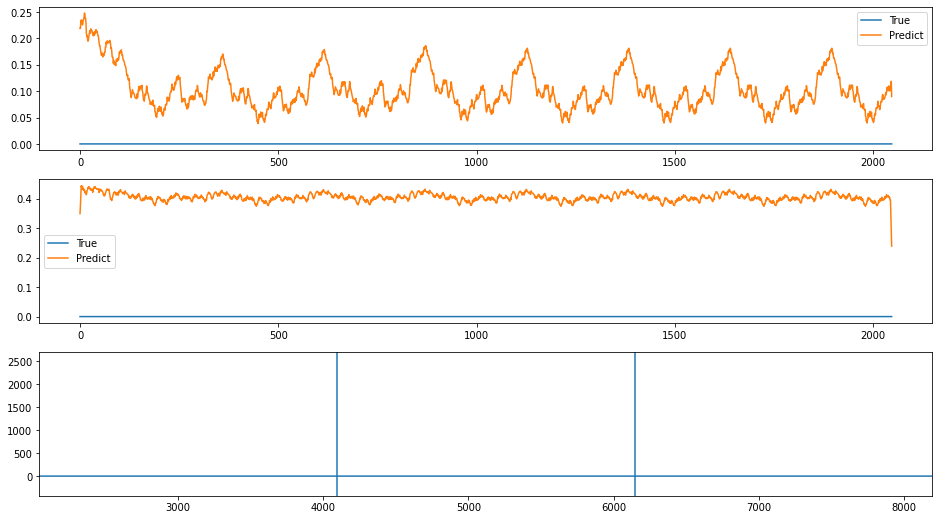

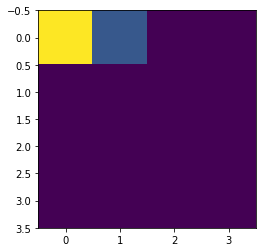

index: 340500
Error: 0.08800892462980561
type                                                         Inst
fill                                                         7058
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-17 05:32:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7058/...
n_bunches                                                     420
bunch_index                                                  1820
bunch_number                                                  412
ts_length                                                   65536
chunk                                                           7
Name: 1792, dtype: object


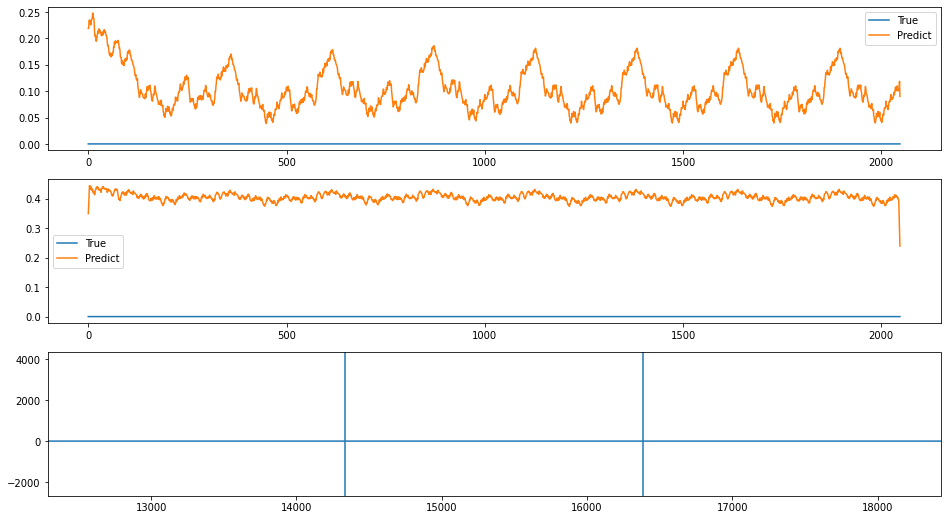

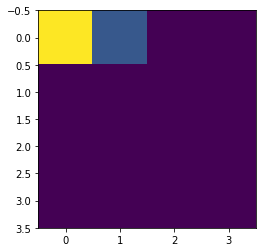

index: 107619
Error: 0.08800892462980561
type                                                         Inst
fill                                                         6671
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-11 16:02:43
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6671/...
n_bunches                                                     156
bunch_index                                                   339
bunch_number                                                  123
ts_length                                                   65536
chunk                                                          23
Name: 6058, dtype: object


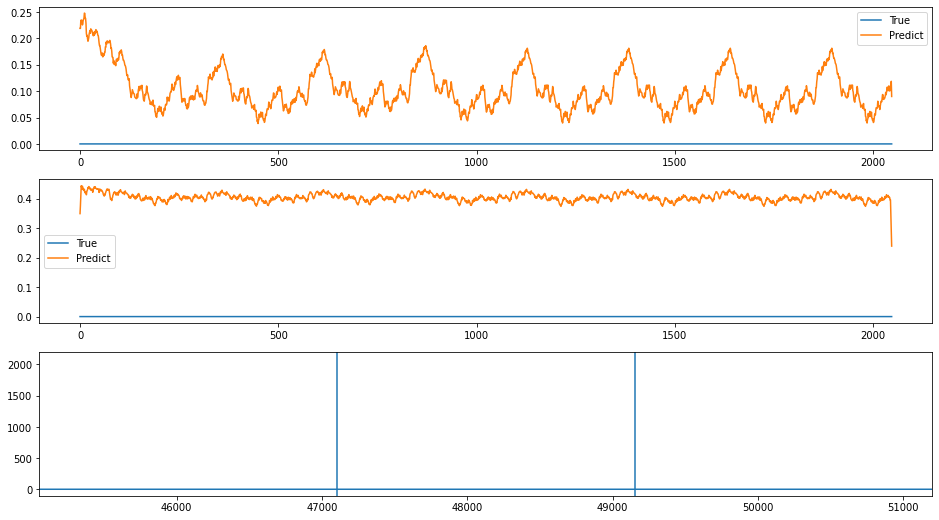

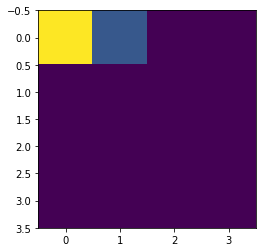

index: 83954
Error: 0.08800892462980561
type                                                         Inst
fill                                                         7253
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-03 14:59:53
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7253/...
n_bunches                                                    1068
bunch_index                                                  1312
bunch_number                                                  958
ts_length                                                   65536
chunk                                                           5
Name: 1383, dtype: object


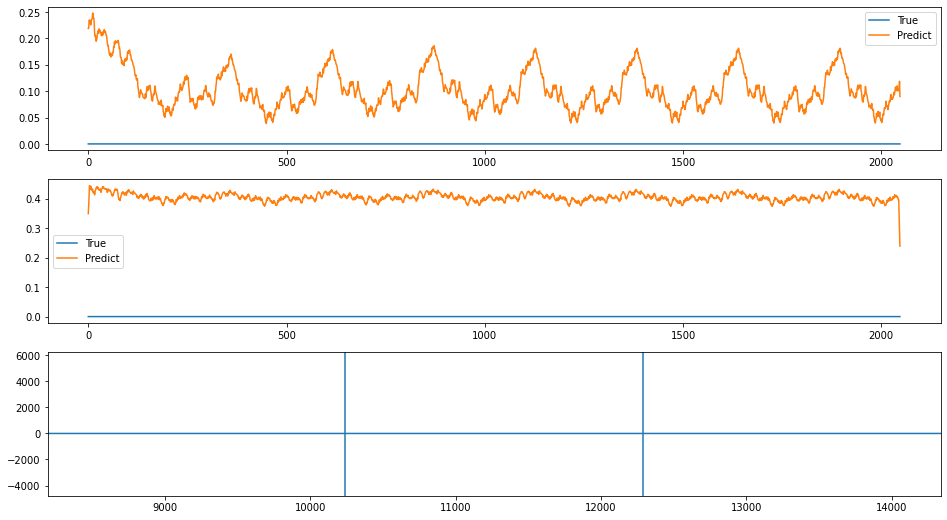

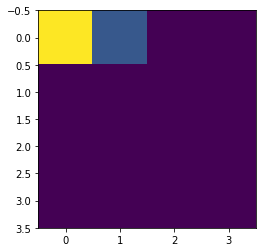

index: 146558
Error: 0.08800892462980561
type                                                         Inst
fill                                                         6351
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-31 15:14:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6351/...
n_bunches                                                     652
bunch_index                                                  1117
bunch_number                                                  597
ts_length                                                   65536
chunk                                                           2
Name: 554, dtype: object


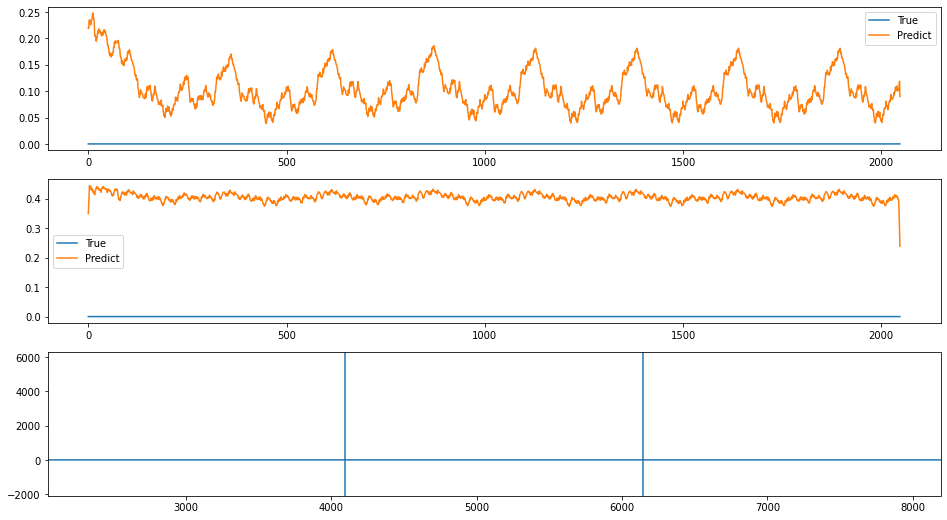

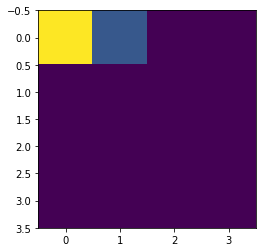

In [26]:
for i in range(1, 51):
    index = sorted_error_indices[-i]
    plot_train_index(index)

# Around the peak

In [27]:
error_around_peak = abs(train_error - hist_peak)
sorted_error_indices_around_peak = np.argsort(error_around_peak)

index: 36828
Error: 0.02035743358342868
type                                                         Inst
fill                                                         6607
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-24 03:21:50
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6607/...
n_bunches                                                     252
bunch_index                                                     7
bunch_number                                                    7
ts_length                                                   65536
chunk                                                           0
Name: 125, dtype: object


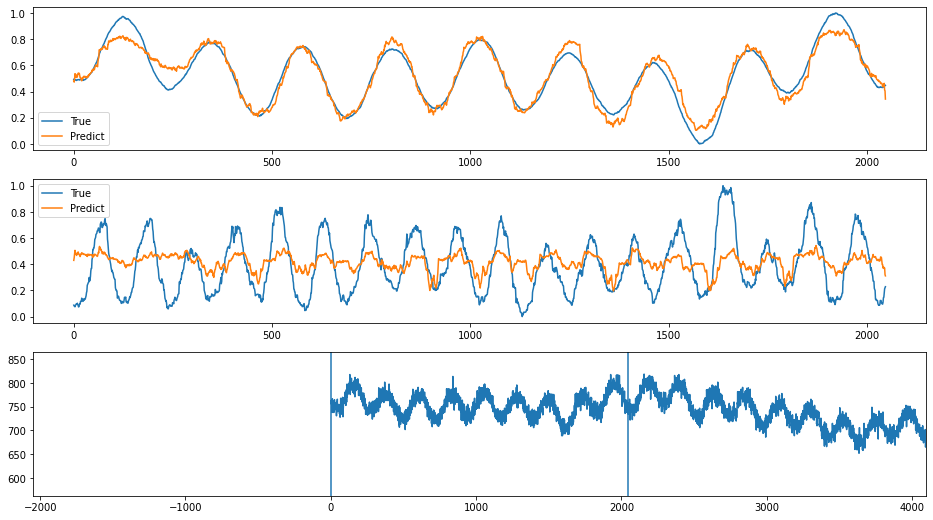

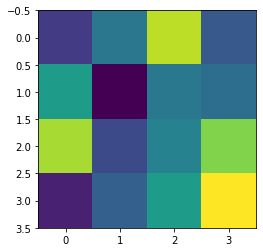

index: 119075
Error: 0.020357460450048038
type                                                         Inst
fill                                                         6612
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-25 14:32:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6612/...
n_bunches                                                     603
bunch_index                                                  3055
bunch_number                                                  545
ts_length                                                   65536
chunk                                                           6
Name: 1689, dtype: object


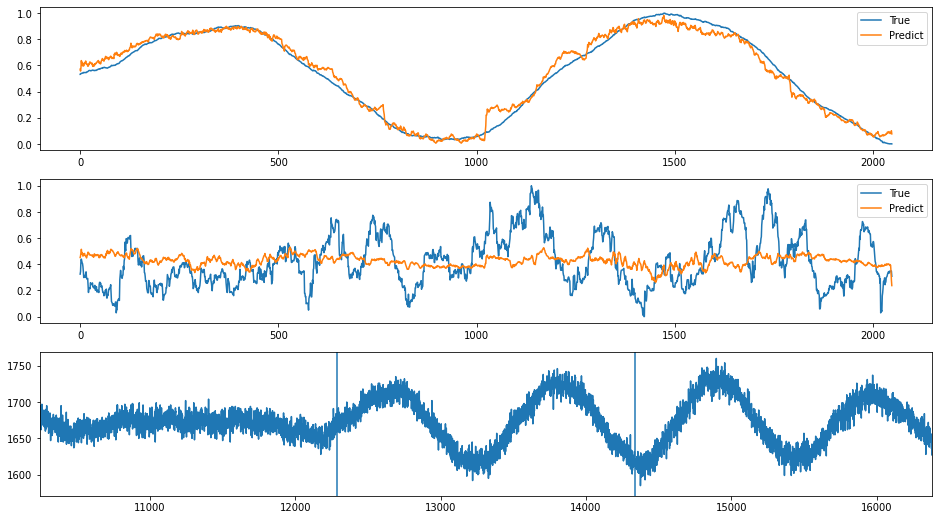

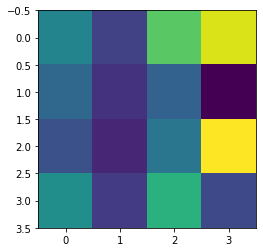

index: 319109
Error: 0.020357369311677122
type                                                         Inst
fill                                                         7362
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 16:36:51
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7362/...
n_bunches                                                     157
bunch_index                                                   344
bunch_number                                                  109
ts_length                                                   65536
chunk                                                          20
Name: 5152, dtype: object


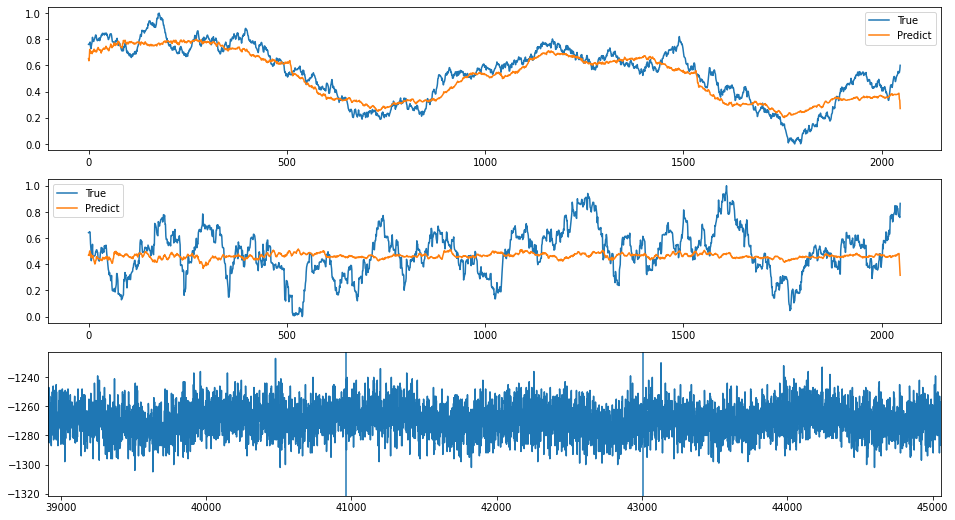

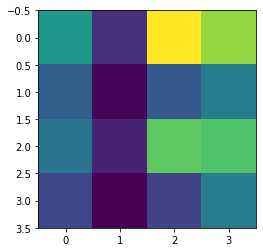

index: 167840
Error: 0.020357353412830712
type                                                         Inst
fill                                                         6744
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-31 03:36:26
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6744/...
n_bunches                                                     636
bunch_index                                                   180
bunch_number                                                  105
ts_length                                                   65536
chunk                                                           3
Name: 914, dtype: object


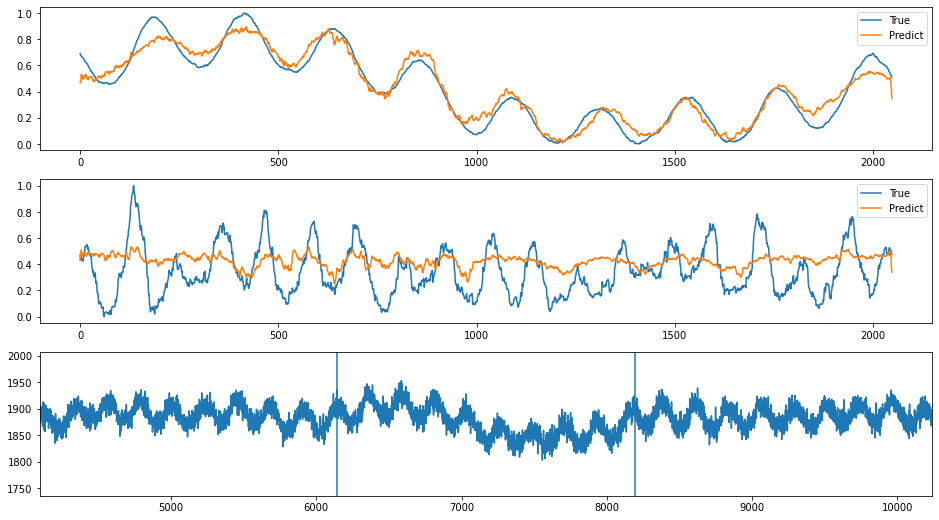

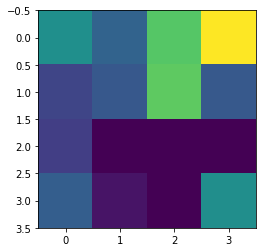

index: 166304
Error: 0.02035733000502816
type                                                         Inst
fill                                                         6696
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-18 10:05:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6696/...
n_bunches                                                    2556
bunch_index                                                  1601
bunch_number                                                 1169
ts_length                                                   65536
chunk                                                          21
Name: 5427, dtype: object


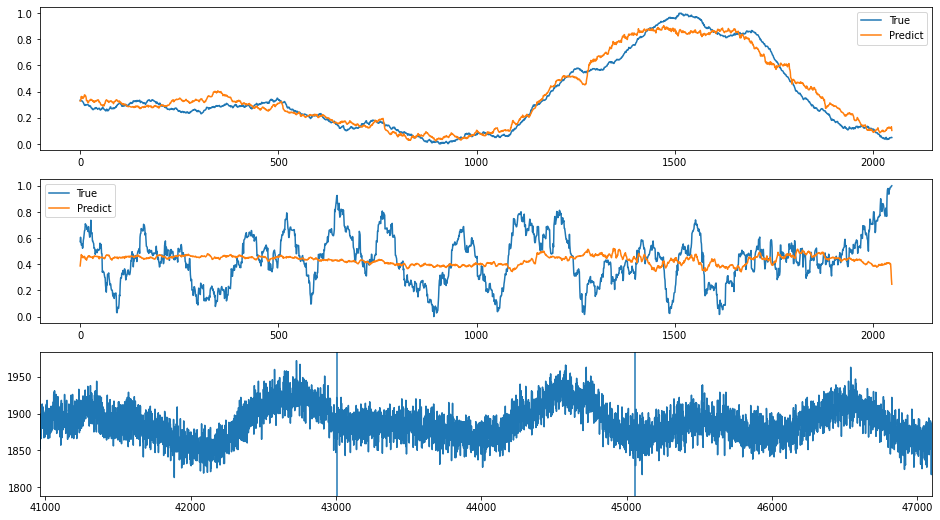

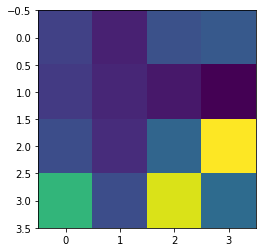

index: 353151
Error: 0.02035732508282057
type                                                         Inst
fill                                                         6936
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-17 15:14:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6936/...
n_bunches                                                    1308
bunch_index                                                  1362
bunch_number                                                 1001
ts_length                                                   65536
chunk                                                           3
Name: 846, dtype: object


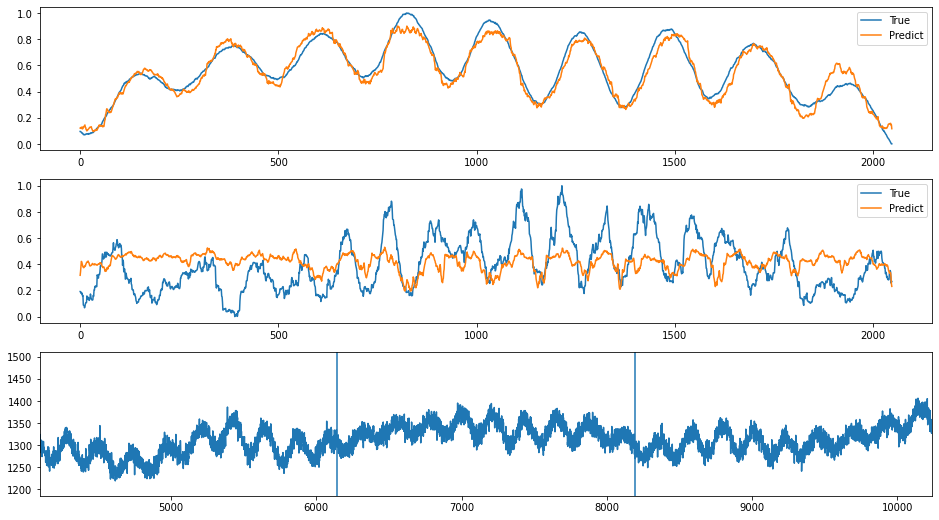

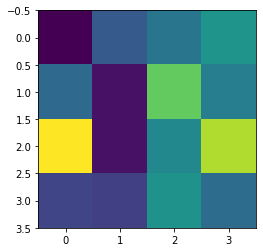

index: 65824
Error: 0.020357317715000205
type                                                         Inst
fill                                                         6694
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-17 14:34:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6694/...
n_bunches                                                    2175
bunch_index                                                  1112
bunch_number                                                  726
ts_length                                                   65536
chunk                                                           2
Name: 512, dtype: object


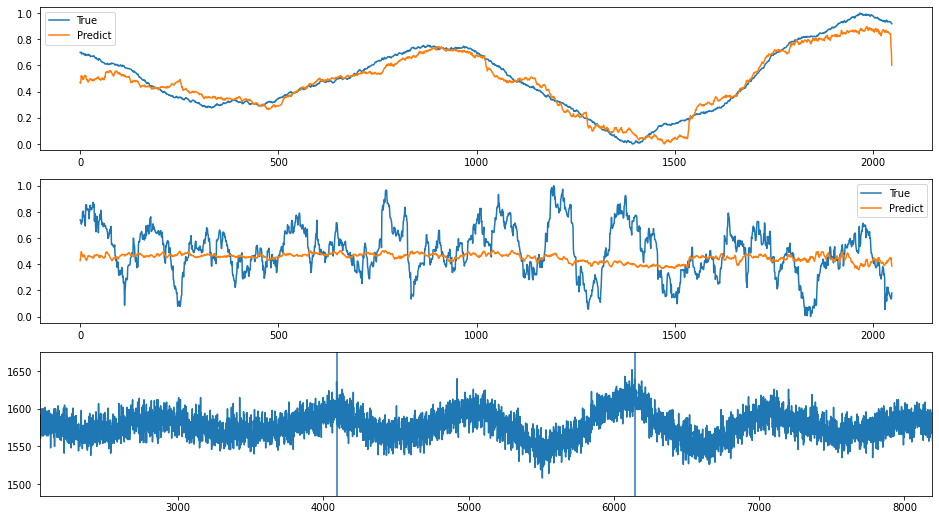

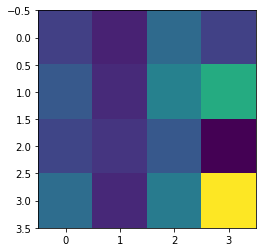

index: 316892
Error: 0.020357309489370784
type                                                         Inst
fill                                                         6276
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-06 18:22:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6276/...
n_bunches                                                    1868
bunch_index                                                  1757
bunch_number                                                  934
ts_length                                                   65536
chunk                                                           8
Name: 2275, dtype: object


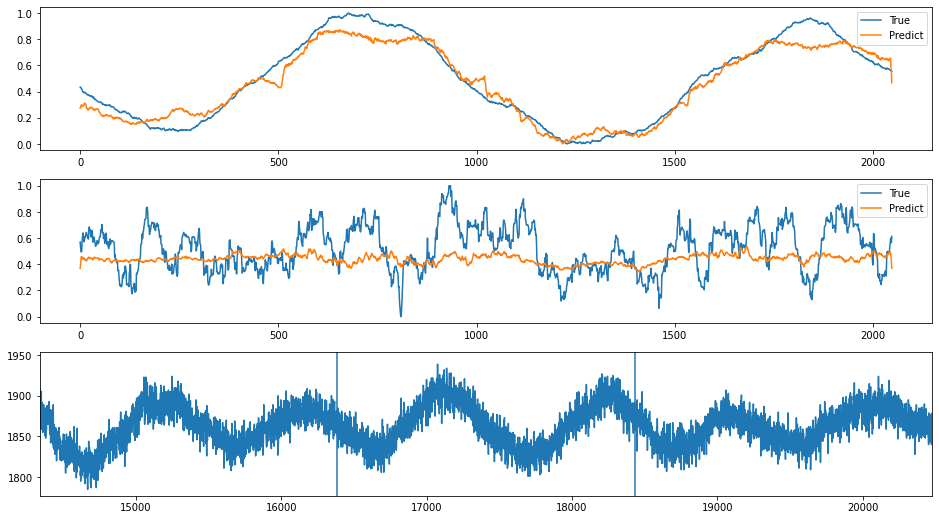

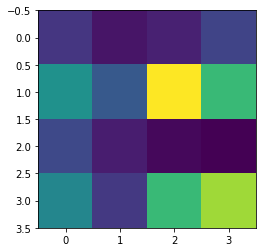

index: 216993
Error: 0.020357605819610596
type                                                         Inst
fill                                                         7466
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-22 18:15:18
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7466/...
n_bunches                                                     670
bunch_index                                                  1125
bunch_number                                                  233
ts_length                                                   65536
chunk                                                           0
Name: 135, dtype: object


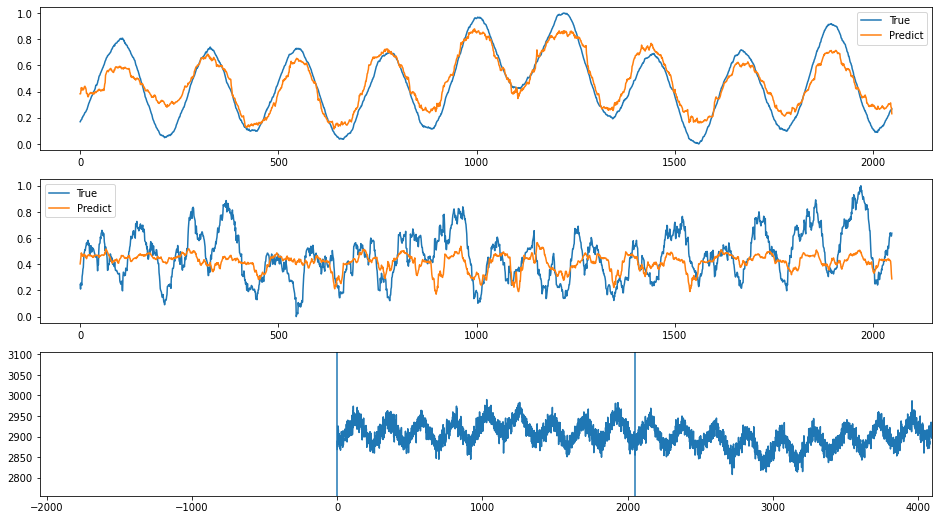

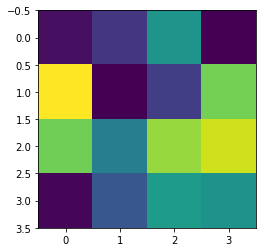

index: 149704
Error: 0.020357608522853697
type                                                         Inst
fill                                                         6362
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-04 18:53:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6362/...
n_bunches                                                    1868
bunch_index                                                  2479
bunch_number                                                 1341
ts_length                                                   65536
chunk                                                          15
Name: 4034, dtype: object


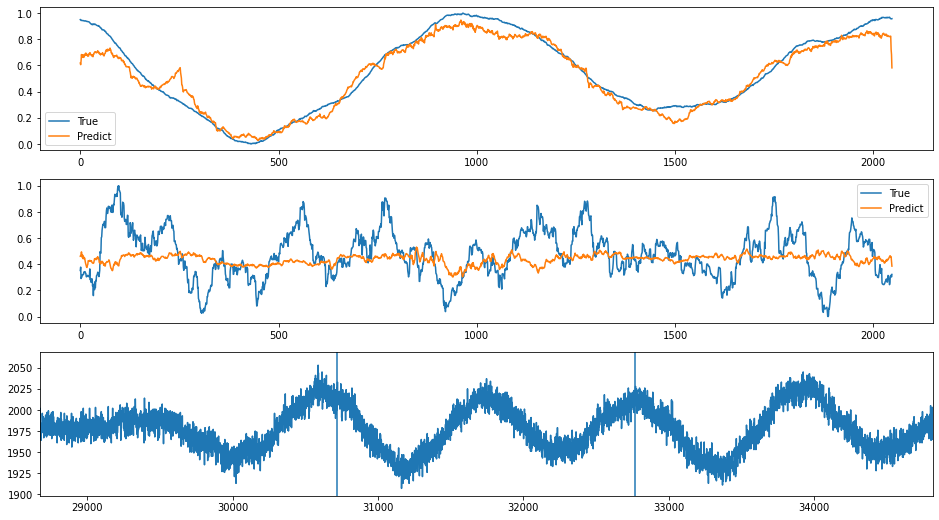

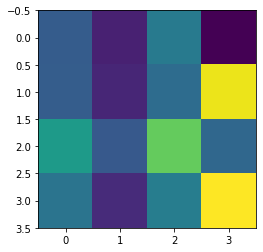

In [28]:
for i in range(10):
    index = sorted_error_indices_around_peak[i]
    plot_train_index(index)

# Around a point

In [29]:
# point = 

In [30]:
# error_around_peak = abs(train_error - point)
# sorted_error_indices_around_point = np.argsort(error_around_peak)

In [31]:
# for i in range(10):
#     index = sorted_error_indices_around_point[i]
#     plot_train_index(index)

# Clustering

In [84]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [122]:
indices = sorted_error_indices[-np.arange(1, 1024+1)]
encoding_true = train_data[indices]
encoding_pred = train_prediction[indices]
encoding_meta = train_meta.iloc[indices]
try:
    encoded = checker.encode(encoding_true)
except:
    encoded = np.array(checker.encoder(encoding_true)).squeeze()
encoded_2d = encoded.reshape(encoded.shape[0], -1)

In [123]:
encoded_2d.shape

(1024, 16)

In [124]:
scaler = StandardScaler()
encoded_2d_norm = scaler.fit_transform(encoded_2d.T).T

In [125]:
encoded_2d_norm.shape

(1024, 16)

In [126]:
encoded_2d_norm.mean(axis=1)

array([-1.4901161e-08,  0.0000000e+00, -1.4901161e-08, ...,
       -1.4901161e-08,  0.0000000e+00,  0.0000000e+00], dtype=float32)

In [127]:
encoded_2d.min()

0.0

In [128]:
encoded_2d.max()

3.159881

In [129]:
def plot_clusters(cluster_indices):
    print(f"N samples: {len(cluster_indices)}")
    fig, axes = plt.subplots(2,1, figsize=(12, 3))
    axes[0].plot(encoding_true[cluster_indices][:,:, 0].T, linewidth=0, marker=',', alpha=0.5)
    axes[1].plot(encoding_true[cluster_indices][:,:, 1].T, linewidth=0, marker=',', alpha=0.5)
    return fig, axes

def plot_avg_encoding(cluster_indices):
    plt.imshow(encoded[cluster_indices].mean(axis=0))

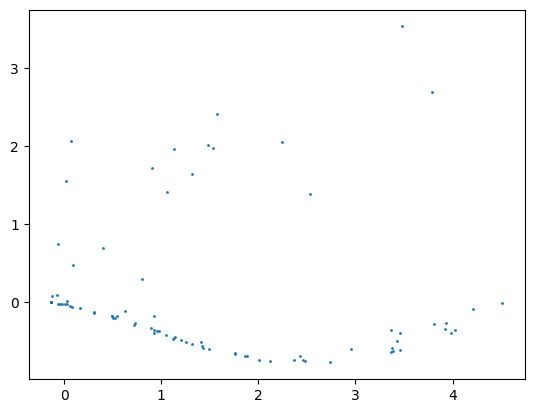

In [130]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
encoded_2d_pca = pca.fit_transform(encoded_2d)
plt.scatter(encoded_2d_pca[:, 0], encoded_2d_pca[:, 1], marker='.', s=4)

In [131]:
pca.explained_variance_ratio_.sum()

0.9932702

In [132]:
import sklearn
from sklearn.manifold import TSNE

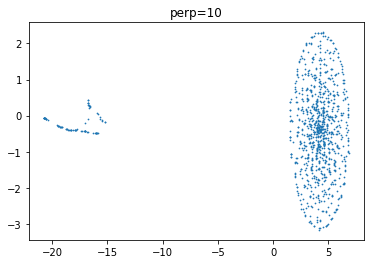

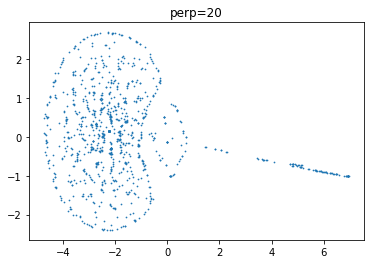

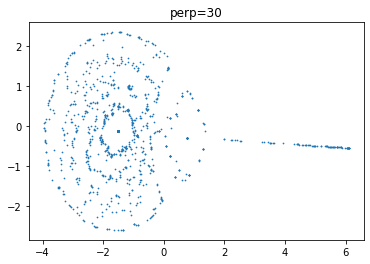

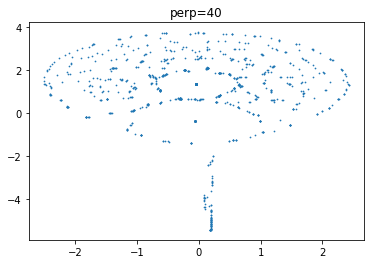

In [42]:
for perplexity in [10, 20, 30, 40]:
    tsne = TSNE(perplexity=perplexity)
    encoded_2d_tsne = tsne.fit_transform(encoded_2d_pca)
    plt.scatter(encoded_2d_tsne[:, 0], encoded_2d_tsne[:, 1], marker='.', s=2)
    plt.title(f"perp={perplexity}")
    plt.show()

In [ ]:
tsne = TSNE(perplexity=30)
encoded_2d_tsne = tsne.fit_transform(encoded_2d)

In [133]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib as mpl
mpl.style.use("default")

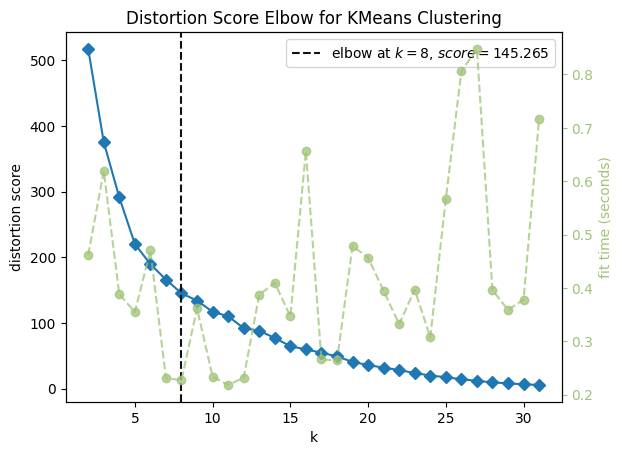

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [134]:
kmeans = KMeans()
viz = KElbowVisualizer(kmeans, k=(2, 32))
viz.fit(encoded_2d_norm)
viz.show()

-------------
n_clusters: 8
cluster 0
N samples: 945


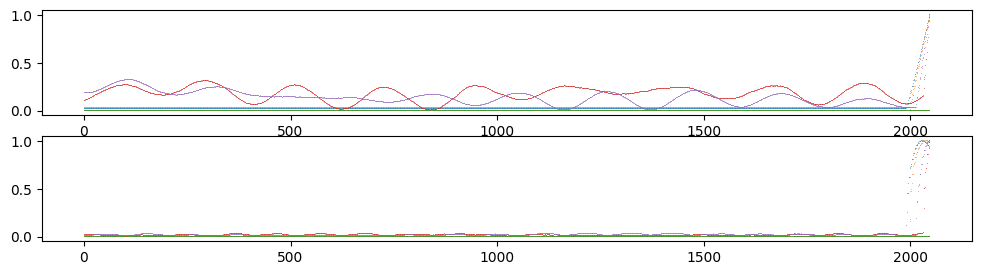

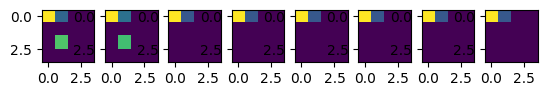

cluster 1
N samples: 9


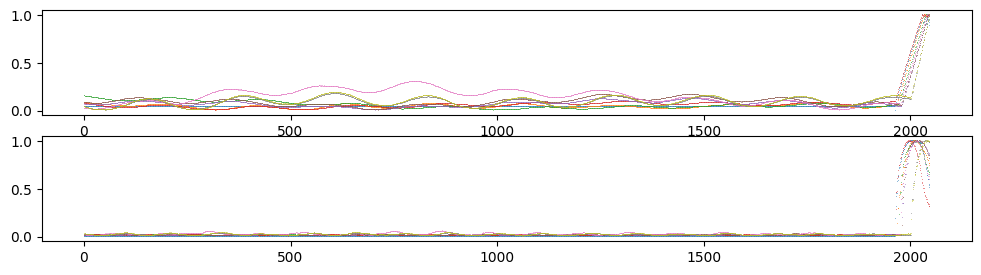

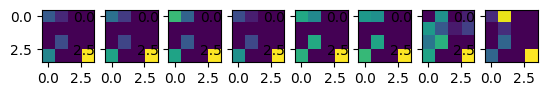

cluster 2
N samples: 15


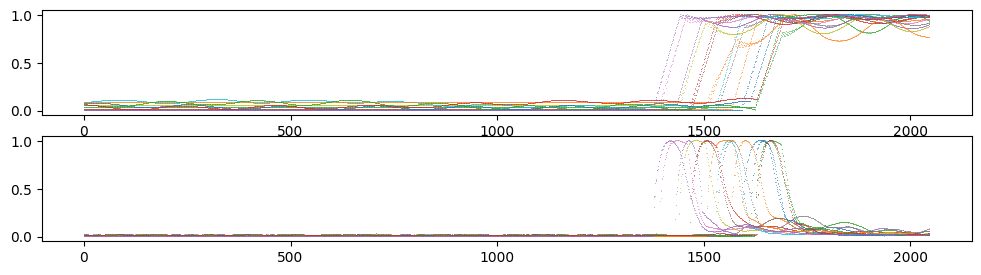

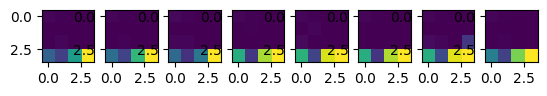

cluster 3
N samples: 4


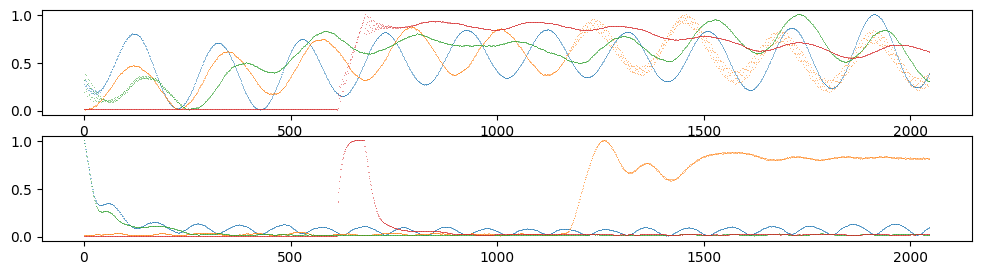

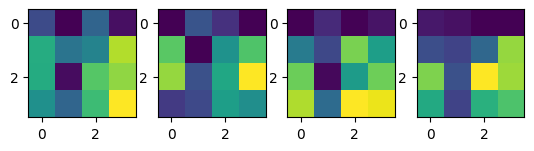

cluster 4
N samples: 3


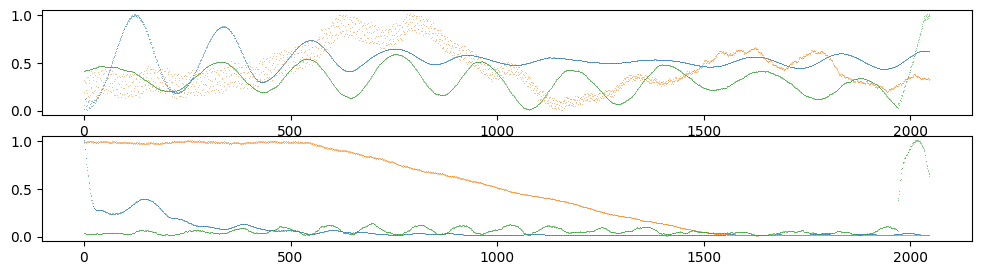

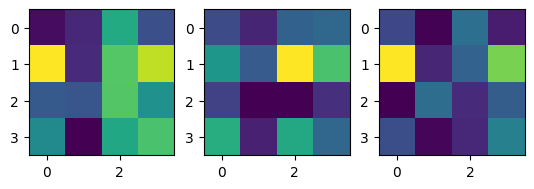

cluster 5
N samples: 5


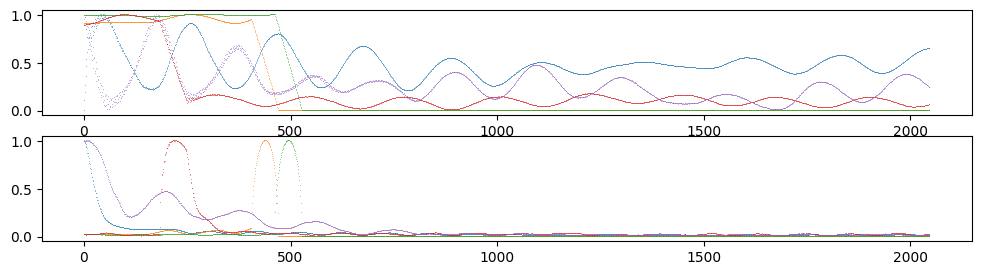

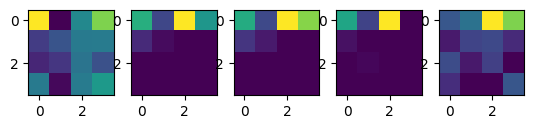

cluster 6
N samples: 3


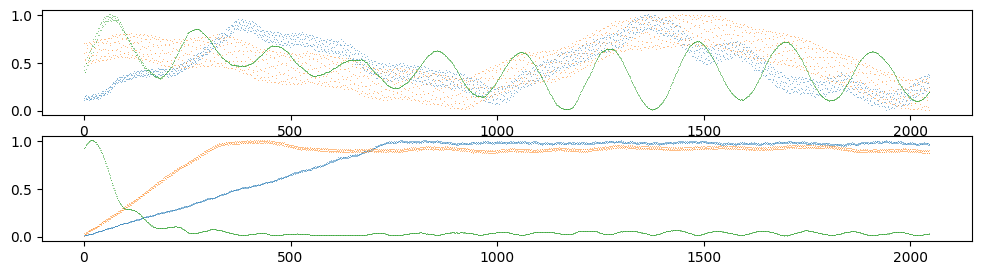

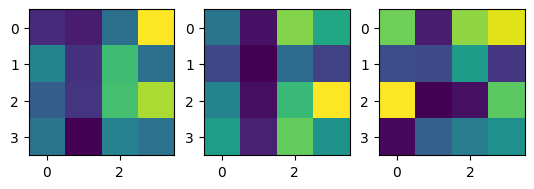

cluster 7
N samples: 40


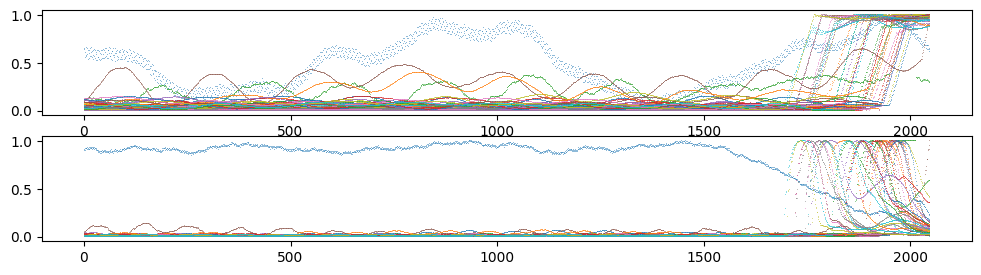

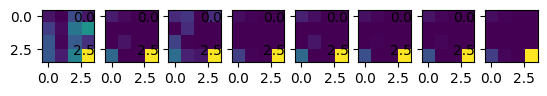

In [135]:
kmeans = KMeans(n_clusters=viz.elbow_value_)
clustering = kmeans.fit(encoded_2d_norm)
print('-------------')
print("n_clusters:", viz.elbow_value_)
for cluster in np.unique(clustering.labels_):
    cluster_indices = np.where(clustering.labels_ == cluster)[0]
    print("cluster", cluster)
    fig, axes = plot_clusters(cluster_indices)
    plt.show()
    
    n_imgs = min(8, len(cluster_indices))
    fig, axes = plt.subplots(1, n_imgs)
    if not isinstance(axes, np.ndarray):
        axes = np.array([axes])
    for i, img in enumerate(encoded[cluster_indices][:n_imgs]):
        axes[i].imshow(img)
    plt.show()

In [136]:
labels = clustering.labels_
encoding_true_no_0 = encoding_true[labels != 0]
encoding_pred_no_0 = encoding_pred[labels != 0]
encoding_meta_no_0 = encoding_meta[labels != 0]
encoded_no_0 = encoded[labels != 0]
encoded_2d_no_0 = encoded_2d[labels != 0]
encoded_2d_norm_no_0 = encoded_2d_norm[labels != 0]

In [137]:
encoded_2d_norm_no_0.shape

(79, 16)

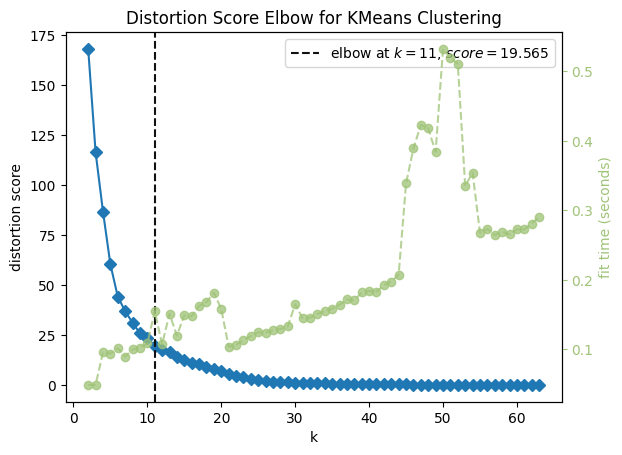

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [146]:
kmeans = KMeans()
viz = KElbowVisualizer(kmeans, k=(2, 64))
viz.fit(encoded_2d_no_0)
viz.show()

-------------
n_clusters: 11
cluster 0
N samples: 11


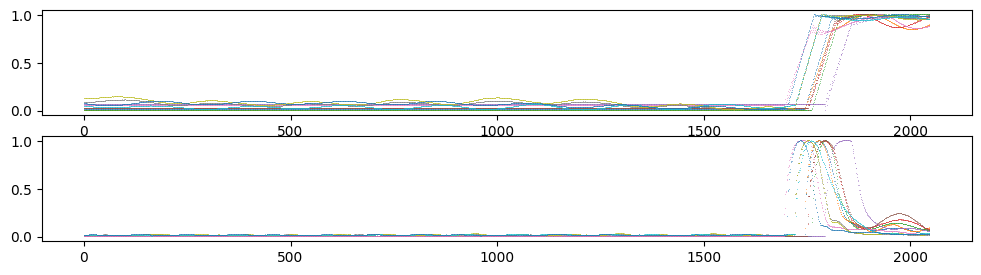

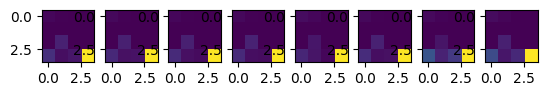

cluster 1
N samples: 22


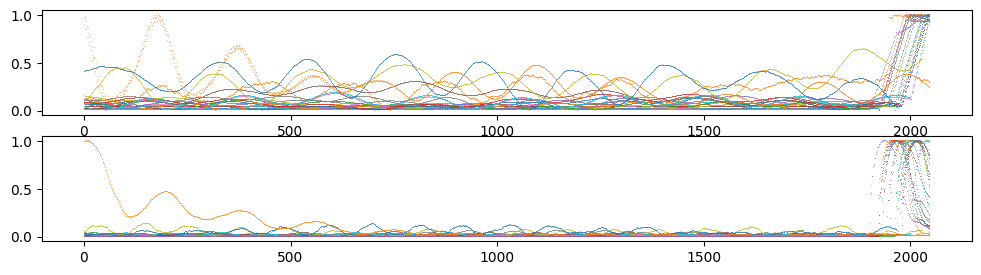

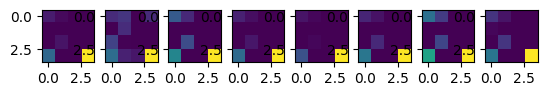

cluster 2
N samples: 4


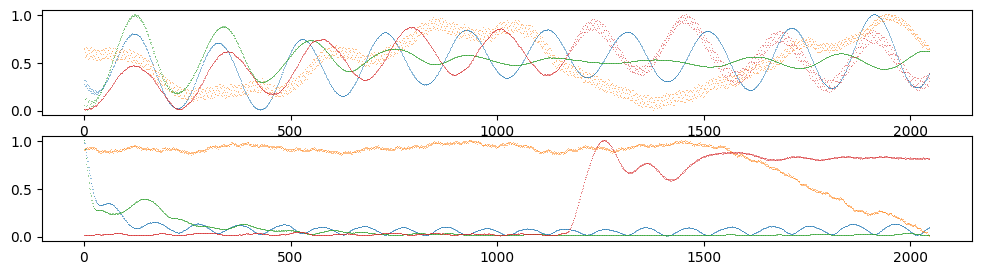

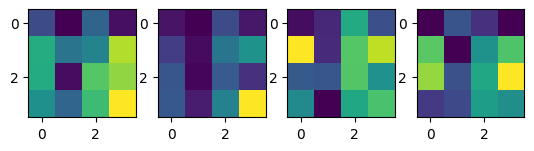

cluster 3
N samples: 8


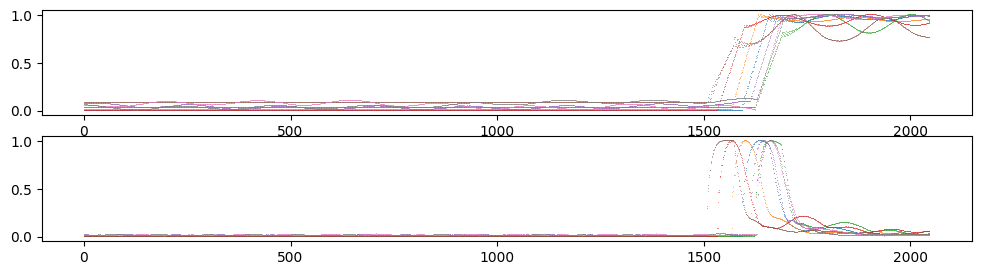

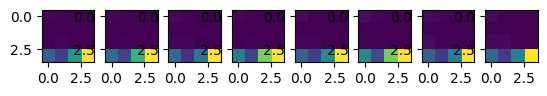

cluster 4
N samples: 1


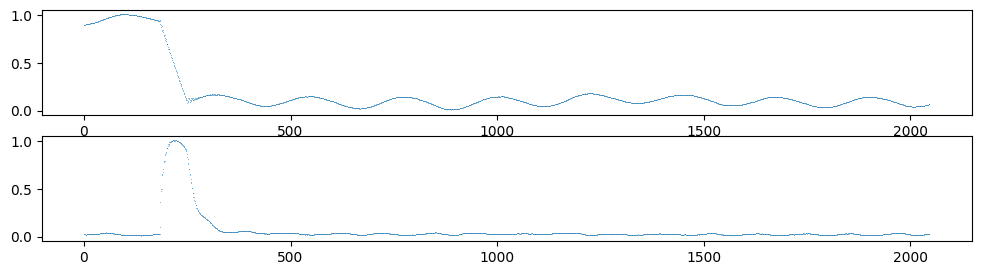

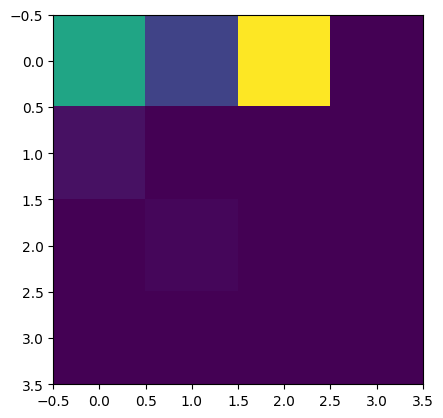

cluster 5
N samples: 17


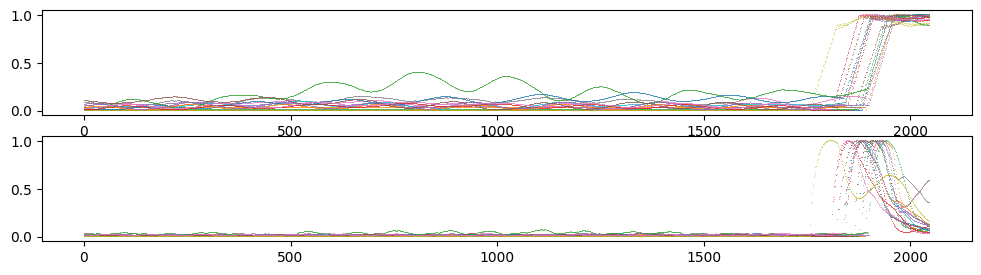

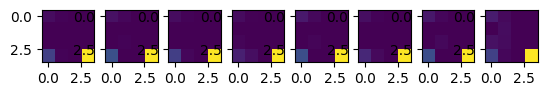

cluster 6
N samples: 5


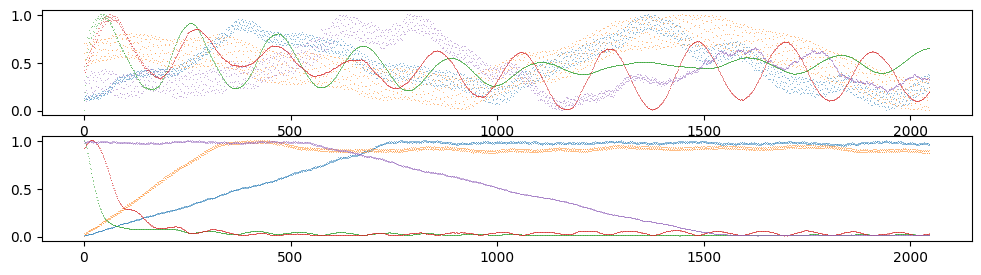

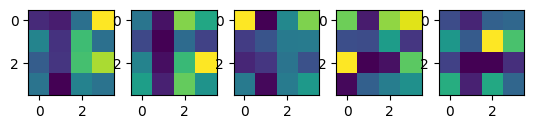

cluster 7
N samples: 2


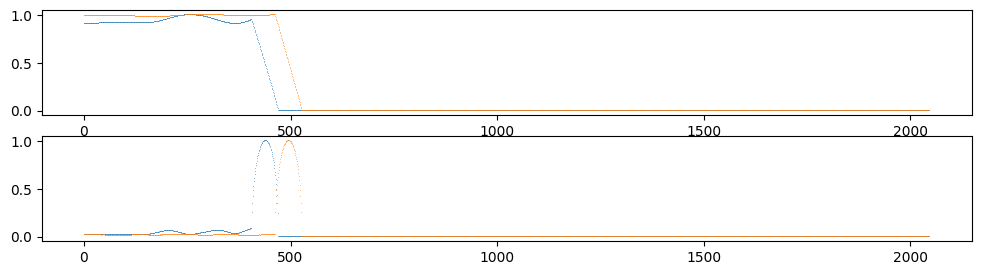

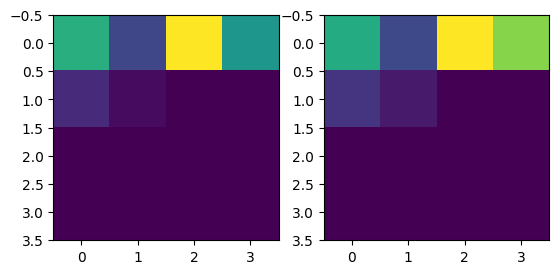

cluster 8
N samples: 1


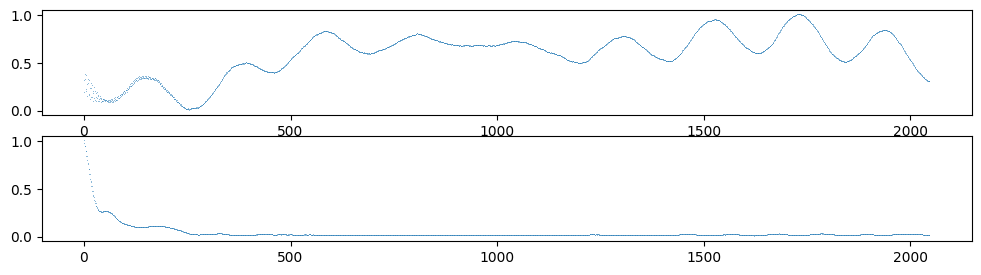

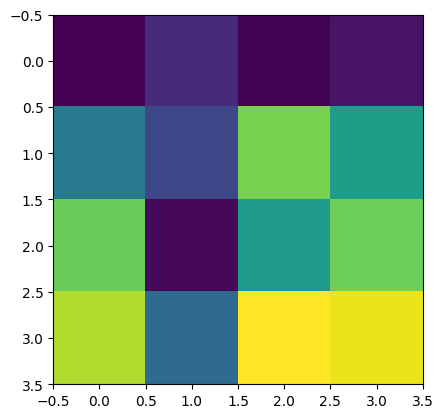

cluster 9
N samples: 1


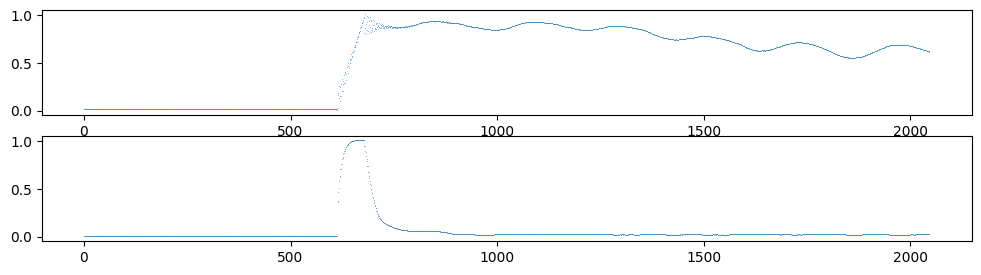

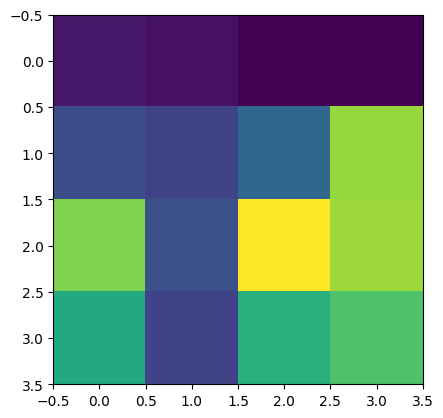

cluster 10
N samples: 7


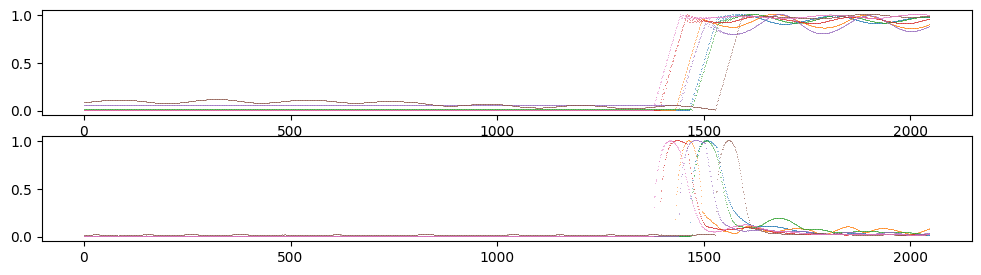

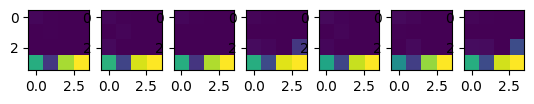

In [147]:
kmeans = KMeans(n_clusters=11)
clustering = kmeans.fit(encoded_2d_no_0)
print('-------------')
print("n_clusters:", viz.elbow_value_)
for cluster in np.unique(clustering.labels_):
    cluster_indices = np.where(clustering.labels_ == cluster)[0]
    print("cluster", cluster)
    print(f"N samples: {len(cluster_indices)}")
    fig, axes = plt.subplots(2,1, figsize=(12, 3))
    axes[0].plot(encoding_true_no_0[cluster_indices][:,:, 0].T, linewidth=0, marker=',', alpha=0.5)
    axes[1].plot(encoding_true_no_0[cluster_indices][:,:, 1].T, linewidth=0, marker=',', alpha=0.5)
    plt.show()
    
    n_imgs = min(8, len(cluster_indices))
    fig, axes = plt.subplots(1, n_imgs)
    if not isinstance(axes, np.ndarray):
        axes = np.array([axes])
    for i, img in enumerate(encoded_no_0[cluster_indices][:n_imgs]):
        axes[i].imshow(img)
    plt.show()

In [150]:
encoding_meta_no_0.head()

type  fill  beam plane  q           date_time  \
3071  Inst  6858     1     h  7 2018-06-28 08:16:20   
4489  Inst  6436     1     h  7 2017-11-30 06:29:40   
3024  Inst  6604     1     h  7 2018-04-23 20:50:18   
3721  Inst  6436     1     h  7 2017-11-30 06:29:40   
1212  Inst  6394     1     h  7 2017-11-16 17:37:11   

                                                   file  n_bunches  \
3071  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6858/...       1227   
4489  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6436/...        408   
3024  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6604/...       2820   
3721  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6436/...        408   
1212  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6394/...        748   

      bunch_index  bunch_number  ts_length  chunk  
3071         23.0          11.0      65536     11  
4489       2284.0         399.0      65536     17  
3024       3158.0        2574.0      65536     11  
3721       2284.0         399.0      65536     14  
1212       1315.0         676.0      65536      4

----------- 0


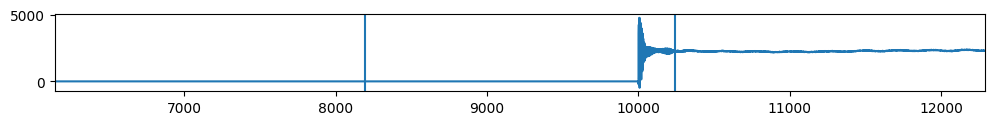

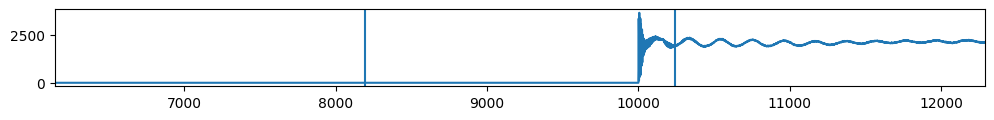

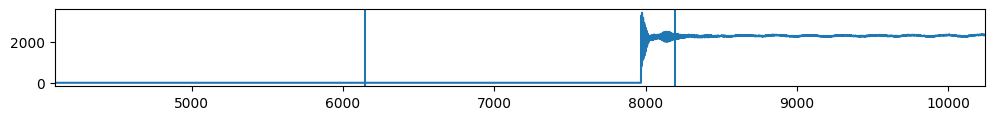

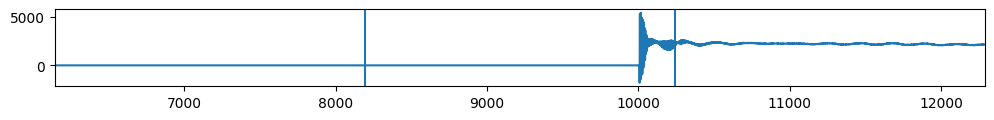

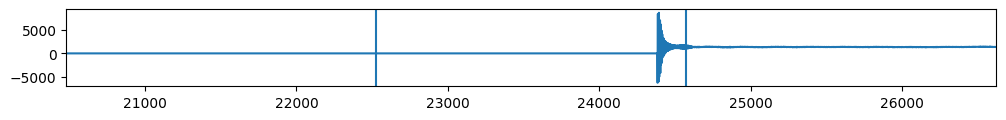

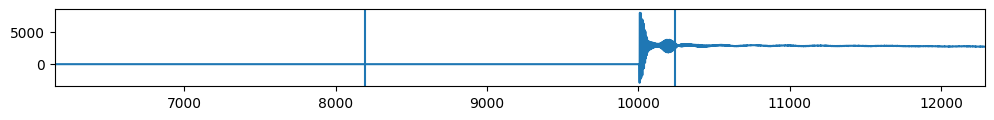

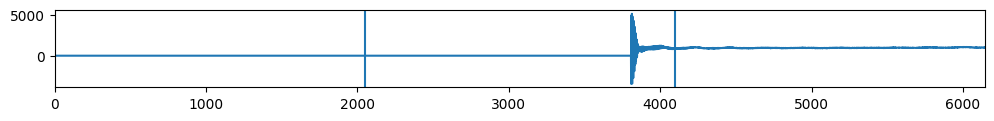

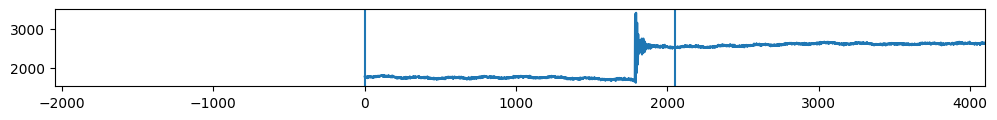

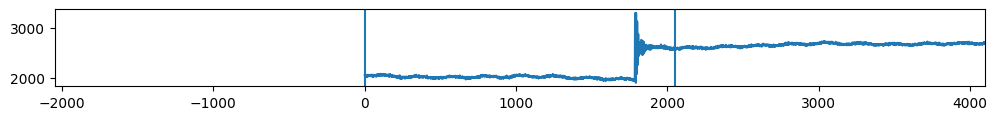

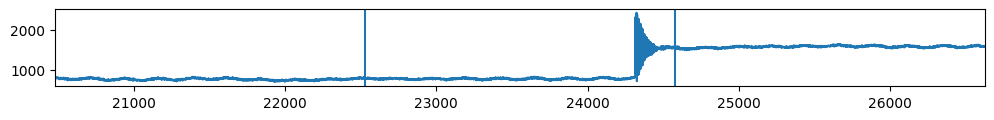

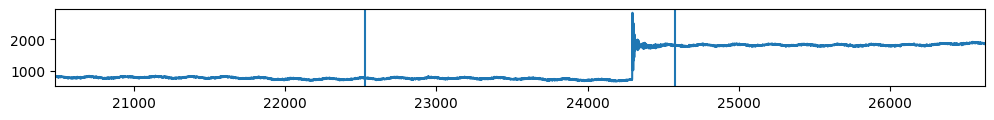

----------- 1


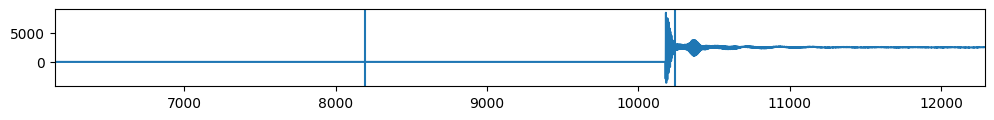

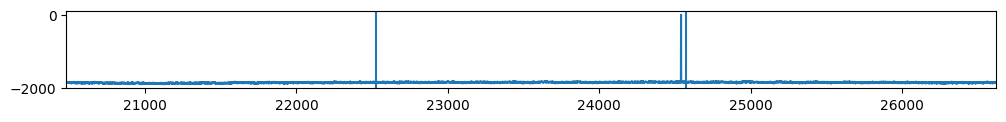

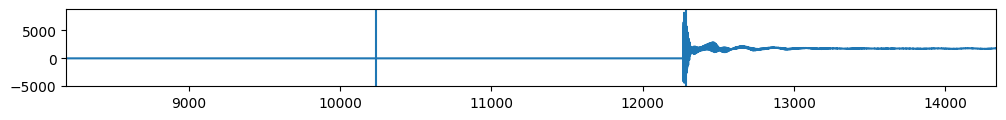

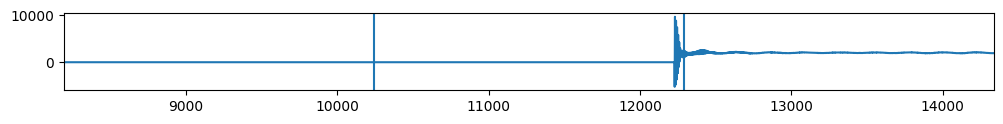

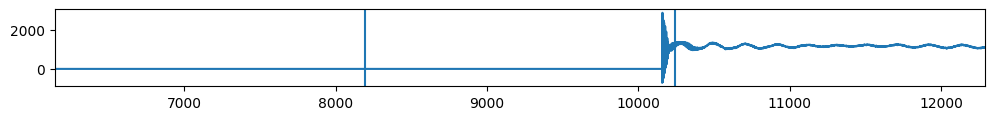

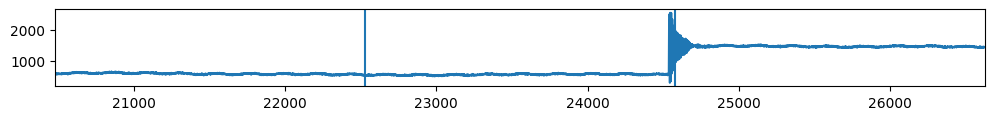

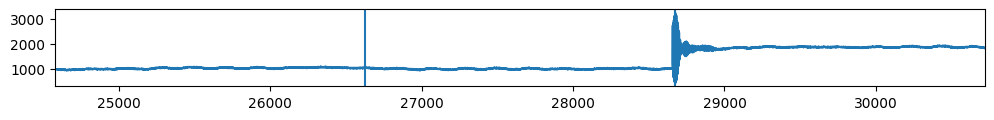

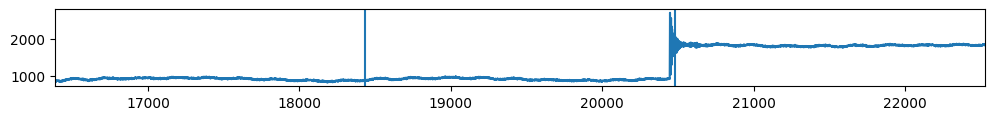

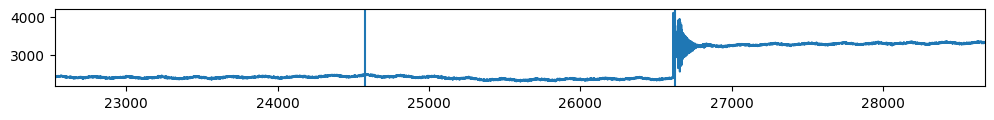

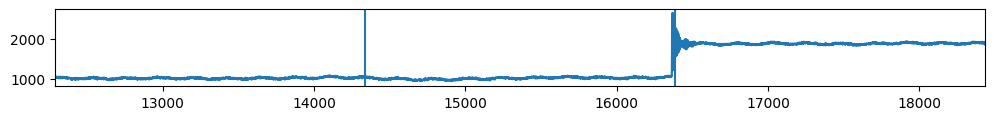

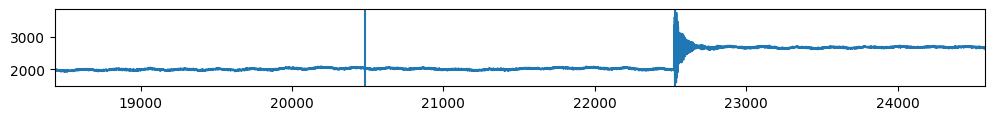

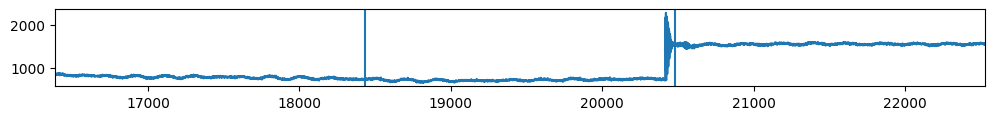

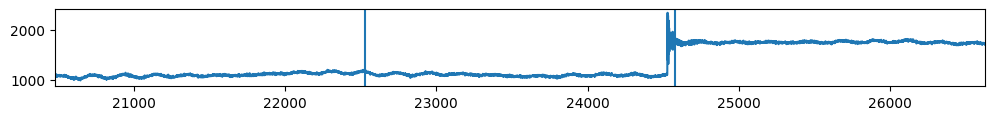

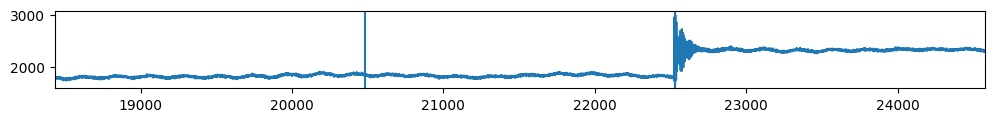

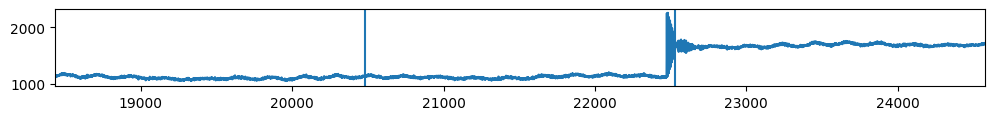

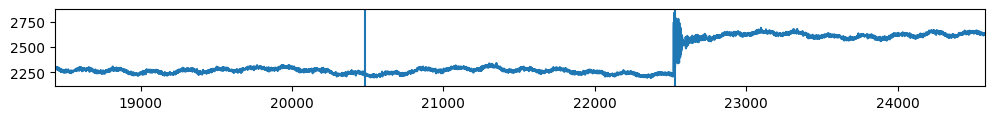

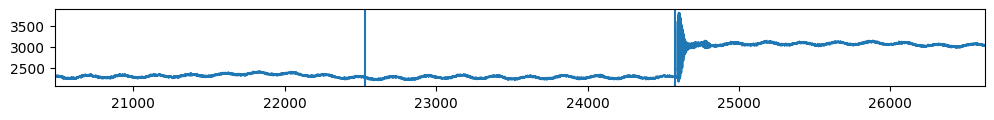

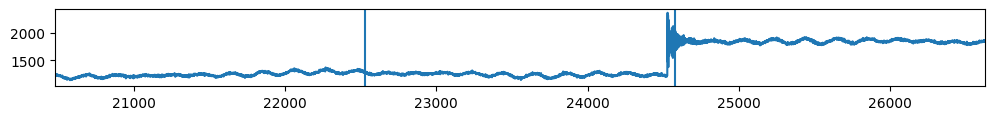

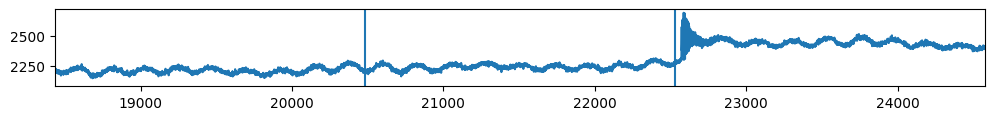

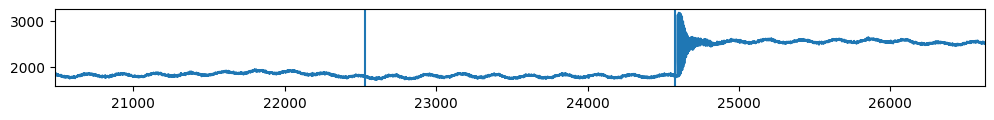

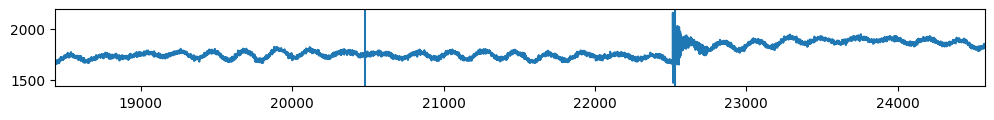

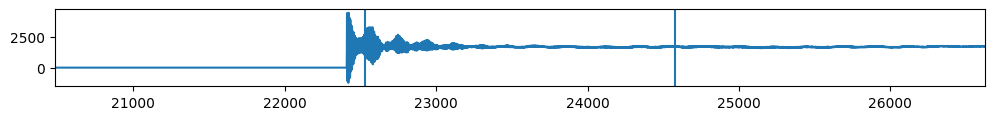

----------- 2


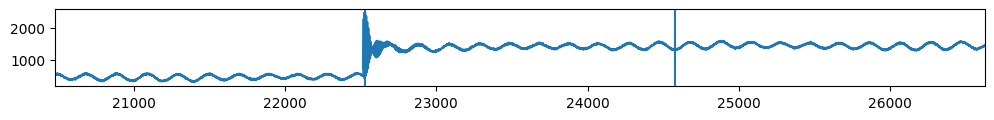

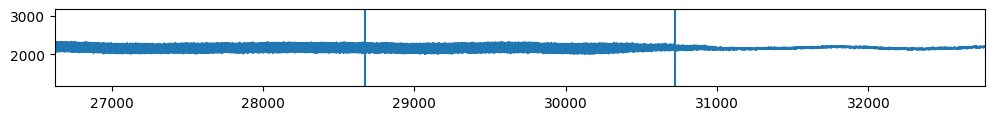

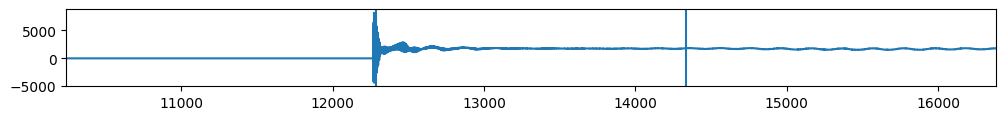

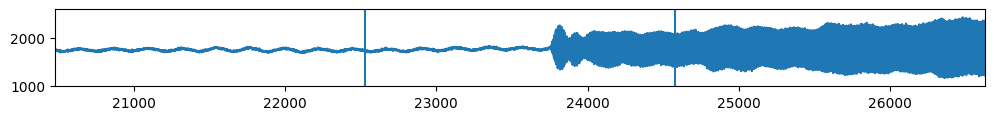

----------- 3


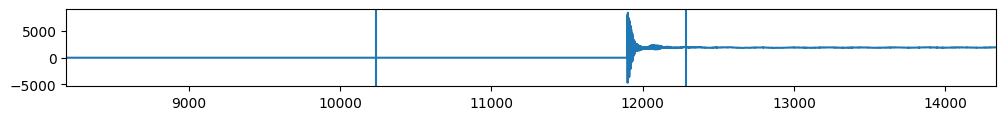

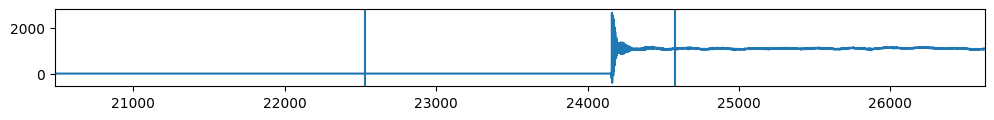

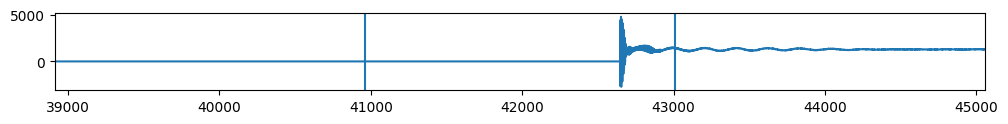

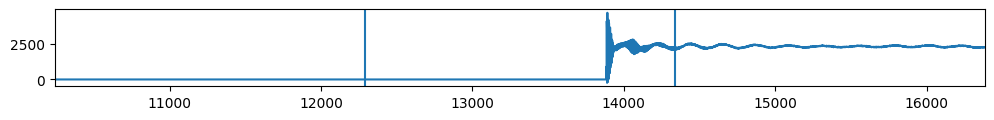

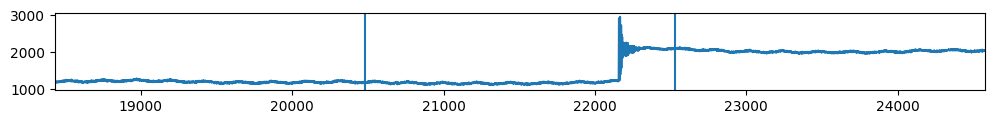

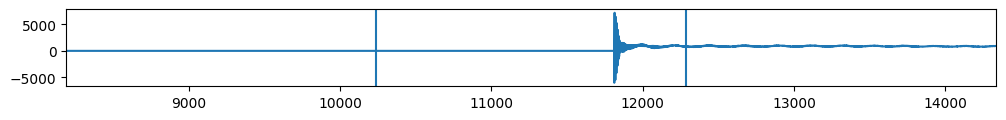

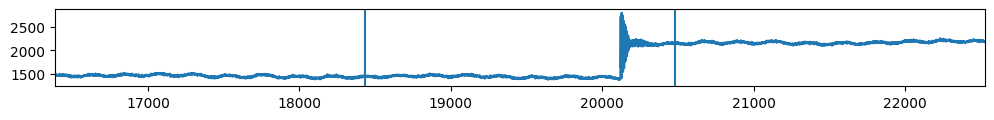

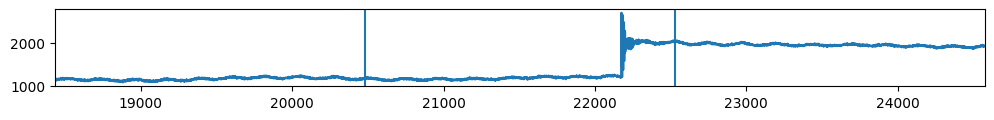

----------- 4


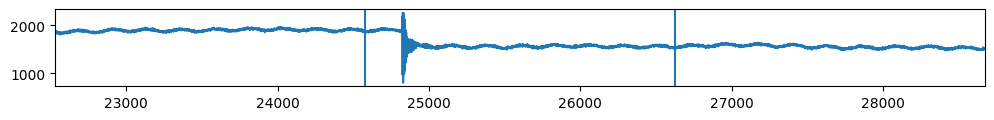

----------- 5


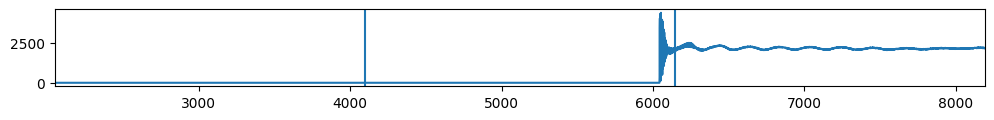

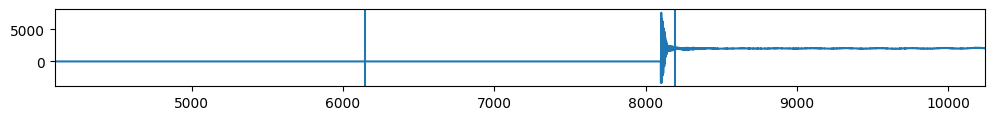

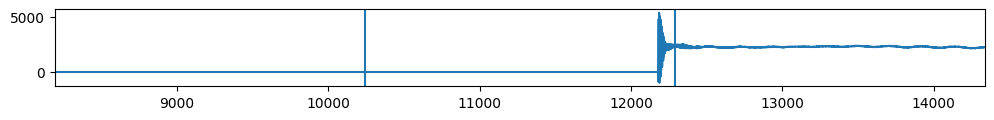

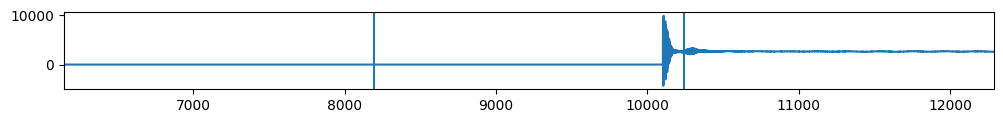

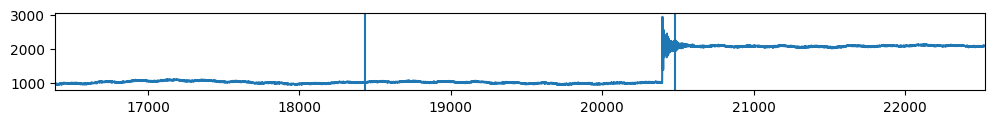

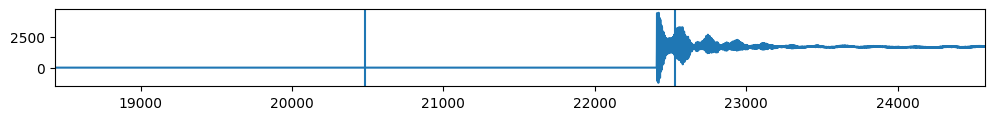

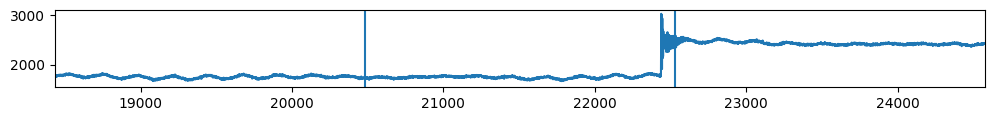

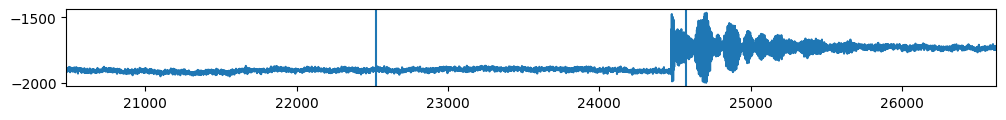

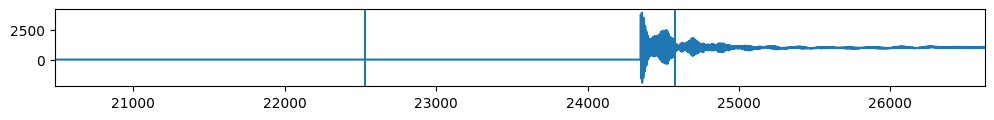

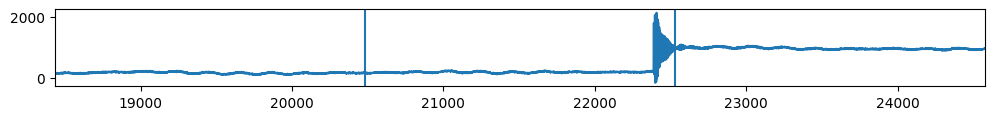

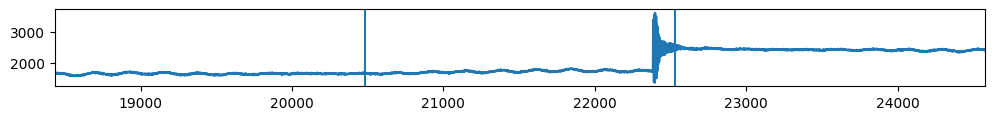

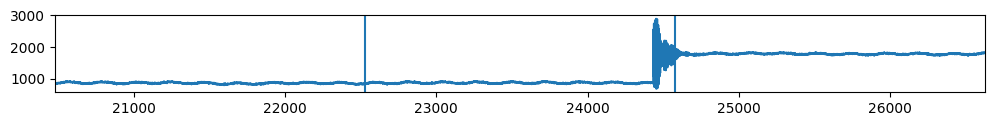

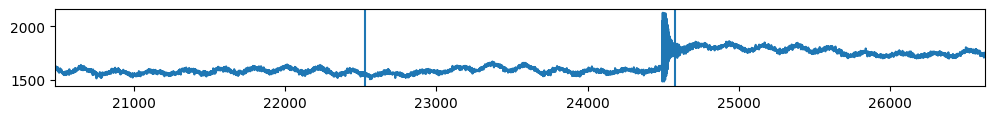

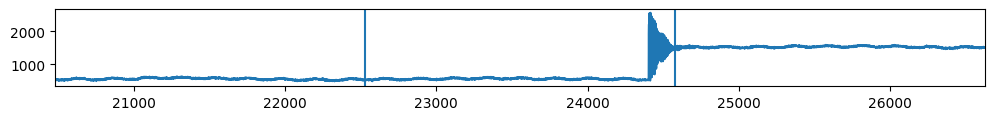

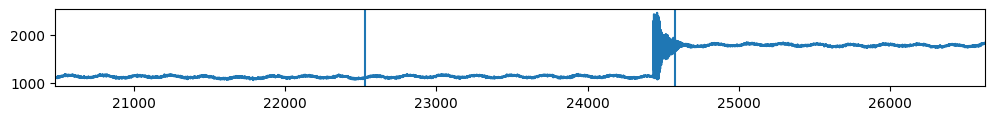

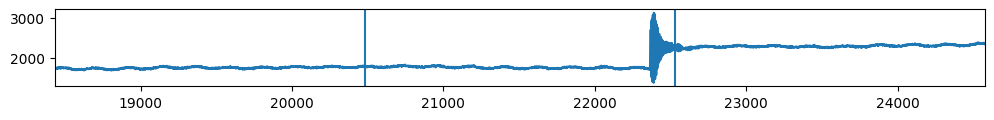

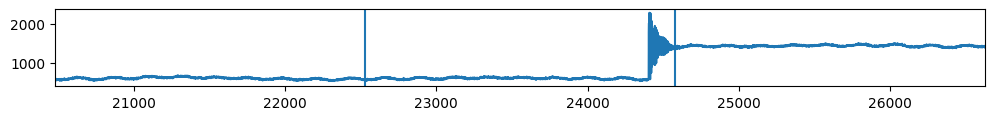

----------- 6


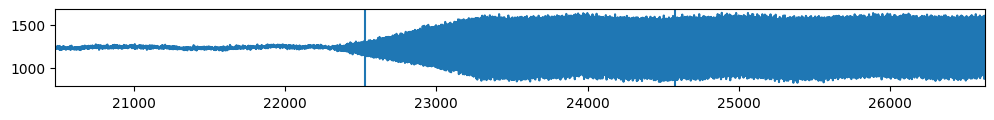

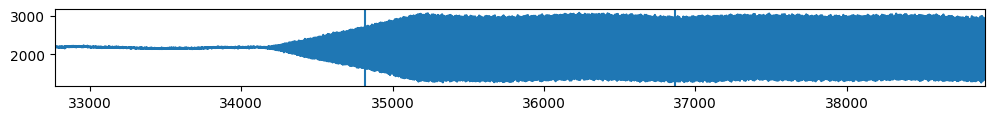

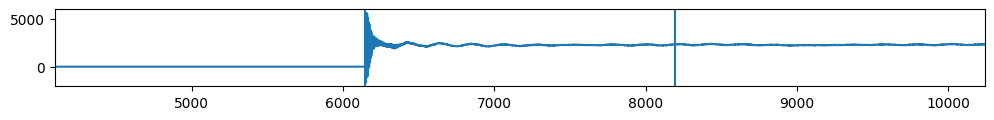

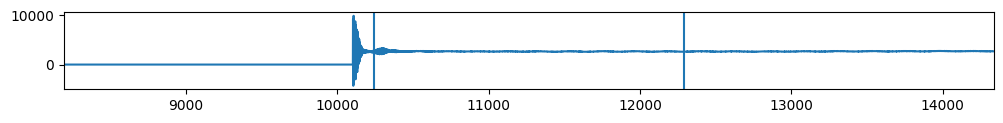

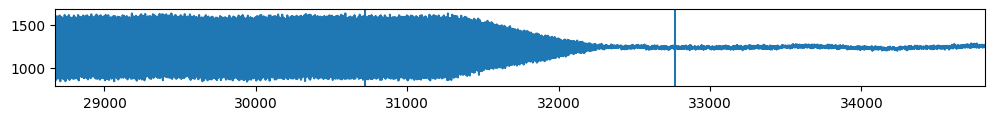

----------- 7


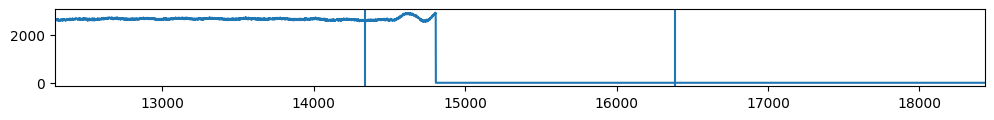

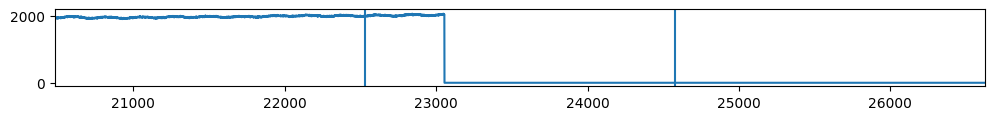

----------- 8


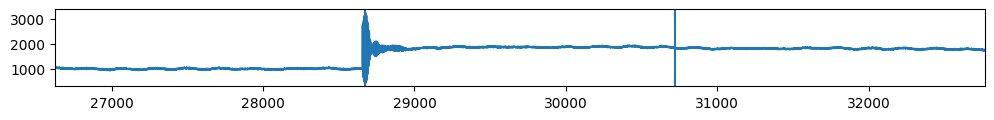

----------- 9


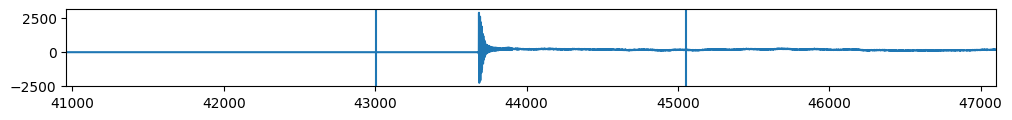

----------- 10


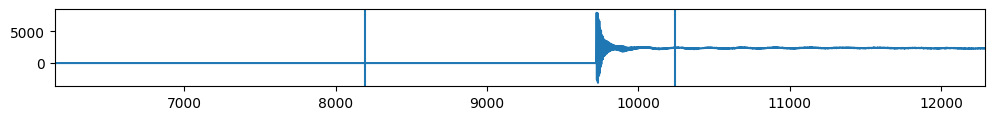

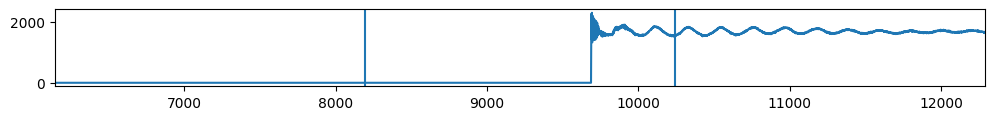

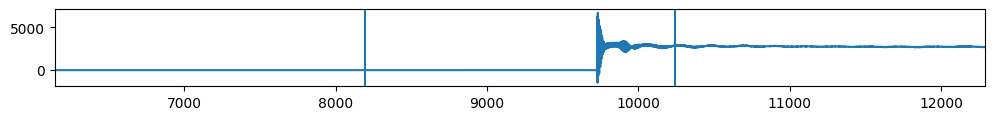

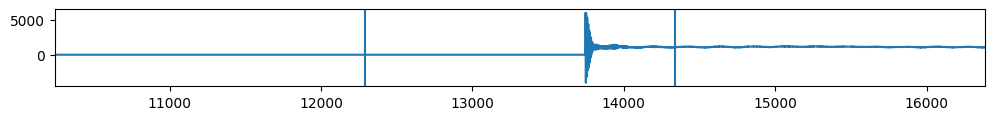

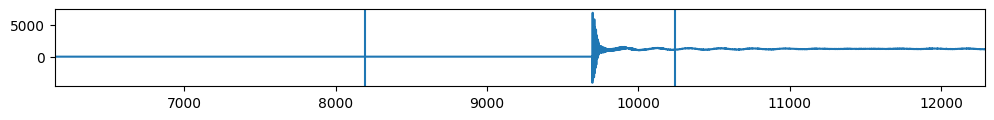

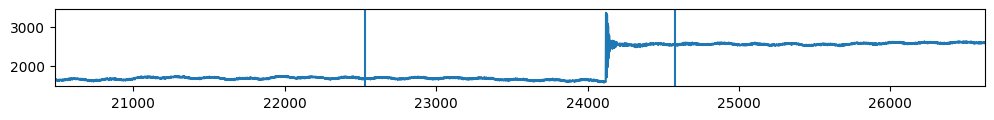

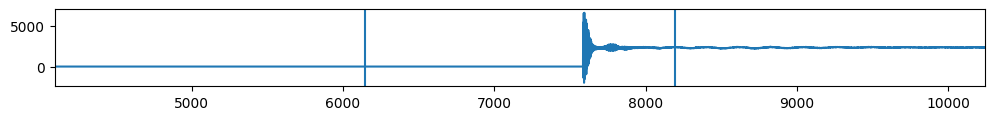

In [169]:
for cluster in np.unique(clustering.labels_):
    cluster_indices = np.where(clustering.labels_ == cluster)
    print('-----------', cluster)
    for index, row in encoding_meta_no_0.iloc[cluster_indices[:8]].iterrows():
#         print(row)
        sample_raw_data = checker.load_raw_data(row['file'], row['bunch_index'])
        fig, ax = plt.subplots(1, 1, figsize=(12, 1))
        ax.plot(sample_raw_data)
        ax.set_xlim(
            [
                (row["chunk"] - 1)
                * checker.model_metadata["generator"]["sequence_length"],
                (row["chunk"] + 2)
                * checker.model_metadata["generator"]["sequence_length"],
            ]
        )
        ax.axvline(
            row["chunk"] * checker.model_metadata["generator"]["sequence_length"]
        )
        ax.axvline(
            (row["chunk"] + 1)
            * checker.model_metadata["generator"]["sequence_length"]
        )
        plt.show()
#         break
#     break
#     print(cluster)

In [ ]:
# from sklearn.cluster import DBSCAN
# dbscan = DBSCAN(eps=4)
# clustering = dbscan.fit(encoded_2d_tsne)
# sc = plt.scatter(encoded_2d_tsne[:, 0], encoded_2d_tsne[:, 1], marker='.', s=2, c=clustering.labels_, cmap='tab10')
# plt.legend(*sc.legend_elements())
# plt.show()
# for cluster in np.unique(clustering.labels_):
#     cluster_indices = np.where(clustering.labels_ == cluster)[0]
#     print("cluster", cluster)
#     fig, axes = plot_clusters(cluster_indices)
#     plt.show()
#     plot_avg_encoding(cluster_indices)
#     plt.show()